- カテゴリのマッチングをとる
- VyOSで試す

In [2]:
import numpy as np
import pandas as pd
import json
import gensim
import collections
import matplotlib.pyplot as plt
import pprint
import itertools
import seaborn as sns
import networkx as nx
from IPython.display import display_svg
import tqdm
%matplotlib inline

In [3]:
with open("./lt.json", "r") as f:
    raw_lt = json.load(f)

In [4]:
lt_per_cat = {}
for ltid, value in raw_lt.items():
    if value['cat'] not in lt_per_cat:
        lt_per_cat[value['cat']] = [value['lt']]
    else:
        lt_per_cat[value['cat']].append(value['lt'])

In [5]:
def remove_symbols(value):
    return value.replace("'",'').replace('>','').replace('<','').replace('=','').replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace('**', '').replace(':', '').replace(',', '').replace("_", " ")

def string_to_corpus(lt, max_len=None):
    words = [remove_symbols(t) for t in lt.split()]
    split_words = []
    for w in words:
        if len(w.split()) > 1: # さらに分割できる場合
            split_words.extend(w.split())
        else:
            split_words.append(w)
    split_words = [t.lower() for t in split_words if t != '']
    if max_len != None:
        split_words = split_words[:max_len] # 前方のみ残す

    return split_words

In [6]:
all_corpus = dict()
for cat, lts in lt_per_cat.items():
    corpus = []
    for lt in lts:
        words = [remove_symbols(t) for t in lt.split()]
        split_words = []
        for w in words:
            if len(w.split()) > 1: # さらに分割できる場合
                split_words.extend(w.split())
            else:
                split_words.append(w)
        split_words = [t.lower() for t in split_words if t != '']
        corpus.extend(split_words)
    all_corpus[cat] = corpus

In [7]:
df = dict()
for cat, words in all_corpus.items():
    for word in set(words):
        if word not in df:
            df[word] = 1
        else:
            df[word] += 1

In [8]:
tfidfs = {}
for cat, words in all_corpus.items():
    all_word_freq = len(words)
    tfidf_per_word = {}
    
    for word, cnt in collections.Counter(words).items():
        tf = cnt/all_word_freq
        tfidf = tf/np.log(len(all_corpus.keys())/df[word])
        tfidf_per_word[word] = tfidf
    
    tfidfs[cat] = tfidf_per_word

In [9]:
for cat, tfidfs_per_word in tfidfs.items():
    print(cat)
    pprint.pprint(sorted(tfidfs_per_word.items(), key=lambda x:x[1])[-10::][::-1])
    print()

system(cron)
[('cmd', 0.06515396958853382),
 ('/usr/sbin/cron', 0.062051399608127465),
 ('root', 0.021081836661046363),
 ('-l', 0.015512849902031866),
 ('/usr/sbin/check-support', 0.015512849902031866),
 ('-a', 0.015512849902031866),
 ('adjkerntz', 0.015512849902031866),
 ('newsyslog', 0.015512849902031866),
 ('/etc/crontab', 0.007756424951015933),
 ('reload', 0.007756424951015933)]

network(lacp)
[('for', 0.053881120848471666),
 ('not', 0.049232804344377865),
 ('state', 0.04481276120079805),
 ('lacp', 0.04084605853077733),
 ('ifl', 0.0343498819259277),
 ('info', 0.0343498819259277),
 ('found', 0.025762411444445774),
 ('current', 0.01932180858333433),
 ('is', 0.014077243536330235),
 ('cleared', 0.014008650243425203)]

service(ntp)
[('xntpd', 0.049547102414368445),
 ('time', 0.040412833429517556),
 ('to', 0.03999419579271391),
 ('on', 0.023888655698014946),
 ('kernel', 0.01967311419394041),
 ('sync', 0.01311540946262694),
 ('from', 0.01135114340161109),
 ('reset', 0.010241300495545778),

In [8]:
all_words = list(set([word for cat, words in all_corpus.items() for word in words]))
word_dict = {w:i for i, w in enumerate(all_words)}
inv_word_dict = {v:k for k,v in word_dict.items()}

corpus = []
for cat, lts in lt_per_cat.items():
    for lt in lts:
        words = [remove_symbols(t) for t in lt.split()]
        split_words = []
        for w in words:
            if len(w.split()) > 1: # さらに分割できる場合
                split_words.extend(w.split())
            else:
                split_words.append(w)
        split_words = [t.lower() for t in split_words if t != '']
        
        split_words = split_words[:7] # 前方のみ残す
        
        lt_word_id_cnt = collections.Counter([word_dict[w] for w in split_words])
        
        corpus.append([(tid, cnt) for tid, cnt in lt_word_id_cnt.items()])

In [9]:
# 単語のカウント
word_cnt = {}
for wid, cnt in sorted(collections.Counter([c[0] for s in corpus for c in s]).items(), key= lambda x: x[1])[::-1]:
    print(inv_word_dict[wid], cnt)
    word_cnt[inv_word_dict[wid]] = cnt

ui 543
user 537
mgd 505
cfg 470
audit 466
rpd 374
set 324
other 257
event 198
index 174
broadcast 162
delete 136
up 110
multicast 104
/kernel 92
mpls 85
lsp 83
to 80
evt 62
from 61
init 60
updown 55
login 55
bgp 53
for 51
mtu 46
chassisd 42
alarm 41
task 41
file 41
pic 41
change 41
trap 40
error 40
address 40
read 39
received 39
mcsn 39
sent 38
port 38
is 38
add 36
snmp 36
notification 36
on 36
failed 34
xntpd 34
pointtopoint 32
cmd 31
class 30
pid 29
down 28
deactivate 28
status 28
bandwidth 27
- 27
message 27
neighbor 26
signal 26
state 26
link 25
cleared 25
junoscript 24
of 24
connection 24
info 24
alarmd 23
craftd 23
generated 23
luchip 23
peer 23
switch 22
reinitializing 22
used 22
slot 22
activate 21
pci 21
not 21
color 20
pfe 20
recv 19
master 19
terminate 19
bulkget 18
chas 18
pfeman 18
system 18
config 18
sshd 18
libjsnmp 17
as 17
no 17
time 17
re 16
secret 16
active 16
rsp 16
interface 16
realm 15
ospf 15
snmpd 15
lu 15
fpc 15
with 15
major 15
by 15
failure 15
rsvp 14
mac 14


In [12]:
# LTレベルの共起
cor_df = pd.DataFrame(index=np.arange(len(word_dict)), columns=np.arange(len(word_dict)), dtype=int)
cor_df = cor_df.fillna(0)

for s in corpus:
    for a,b in itertools.combinations(s, 2):
        ida = int(a[0])
        idb = int(b[0])
        cor_df[ida][idb] += 1
        cor_df[idb][ida] += 1

cor_list = []
for a,b in itertools.combinations(np.arange(len(word_dict)), 2):
    if cor_df[a][b] != 0 :
        cor_list.append([(a, b) , cor_df[a][b]])
        
for i in tqdm.tqdm(sorted(cor_list, key=lambda x:x[1], reverse=True)):
    a,b = i[0]
    print(inv_word_dict[a], inv_word_dict[b], i[1])
    print("\t simpson:", i[1]/min(word_cnt[inv_word_dict[a]], word_cnt[inv_word_dict[b]]))
    print("\t jaccard:", i[1]/(word_cnt[inv_word_dict[a]] + word_cnt[inv_word_dict[b]] - i[1]))
    print()

  4%|▍         | 318/7090 [00:00<00:02, 2878.42it/s]

user ui 521
	 simpson: 0.9702048417132216
	 jaccard: 0.9320214669051878

ui mgd 502
	 simpson: 0.994059405940594
	 jaccard: 0.9194139194139194

user mgd 485
	 simpson: 0.9603960396039604
	 jaccard: 0.8707360861759426

cfg audit 466
	 simpson: 1.0
	 jaccard: 0.9914893617021276

cfg user 466
	 simpson: 0.9914893617021276
	 jaccard: 0.8613678373382625

cfg ui 466
	 simpson: 0.9914893617021276
	 jaccard: 0.8519195612431444

audit user 466
	 simpson: 1.0
	 jaccard: 0.8677839851024208

audit ui 466
	 simpson: 1.0
	 jaccard: 0.858195211786372

cfg mgd 439
	 simpson: 0.9340425531914893
	 jaccard: 0.8190298507462687

audit mgd 439
	 simpson: 0.9420600858369099
	 jaccard: 0.825187969924812

cfg set 299
	 simpson: 0.9228395061728395
	 jaccard: 0.604040404040404

audit set 299
	 simpson: 0.9228395061728395
	 jaccard: 0.6089613034623218

set user 299
	 simpson: 0.9228395061728395
	 jaccard: 0.5320284697508897

set ui 299
	 simpson: 0.9228395061728395
	 jaccard: 0.5264084507042254

set mgd 276
	 sim

 11%|█         | 784/7090 [00:00<00:02, 2335.17it/s]

 5
	 simpson: 0.2777777777777778
	 jaccard: 0.16129032258064516

bulkget to 5
	 simpson: 0.2777777777777778
	 jaccard: 0.053763440860215055

bandwidth address 5
	 simpson: 0.18518518518518517
	 jaccard: 0.08064516129032258

from tcp 5
	 simpson: 0.7142857142857143
	 jaccard: 0.07936507936507936

from password 5
	 simpson: 0.7142857142857143
	 jaccard: 0.07936507936507936

pem cleared 5
	 simpson: 0.4166666666666667
	 jaccard: 0.15625

login pam 5
	 simpson: 1.0
	 jaccard: 0.09090909090909091

rpd loopback 5
	 simpson: 0.625
	 jaccard: 0.013262599469496022

rpd q 5
	 simpson: 1.0
	 jaccard: 0.013368983957219251

rpd with 5
	 simpson: 0.3333333333333333
	 jaccard: 0.013020833333333334

rpd + 5
	 simpson: 0.5555555555555556
	 jaccard: 0.013227513227513227

mtu address 5
	 simpson: 0.125
	 jaccard: 0.06172839506172839

minor cleared 5
	 simpson: 0.4166666666666667
	 jaccard: 0.15625

task signal 5
	 simpson: 0.19230769230769232
	 jaccard: 0.08064516129032258

task no- 5
	 simpson: 1.0
	 ja

 19%|█▊        | 1317/7090 [00:00<00:02, 2370.79it/s]

3
	 simpson: 0.25
	 jaccard: 0.13636363636363635

reset power 3
	 simpson: 0.25
	 jaccard: 0.14285714285714285

reset pic 3
	 simpson: 0.25
	 jaccard: 0.06

error detected 3
	 simpson: 0.42857142857142855
	 jaccard: 0.06818181818181818

error jsr 3
	 simpson: 0.375
	 jaccard: 0.06666666666666667

error on 3
	 simpson: 0.08333333333333333
	 jaccard: 0.0410958904109589

error luchip 3
	 simpson: 0.13043478260869565
	 jaccard: 0.05

error errors 3
	 simpson: 0.3333333333333333
	 jaccard: 0.06521739130434782

error sdrl 3
	 simpson: 0.75
	 jaccard: 0.07317073170731707

detach chassisd 3
	 simpson: 1.0
	 jaccard: 0.07142857142857142

detach ifdev 3
	 simpson: 1.0
	 jaccard: 0.6

storm detected. 3
	 simpson: 1.0
	 jaccard: 0.42857142857142855

storm recovered. 3
	 simpson: 1.0
	 jaccard: 0.42857142857142855

decode krt 3
	 simpson: 0.75
	 jaccard: 0.25

decode mcsn 3
	 simpson: 0.75
	 jaccard: 0.075

config evt 3
	 simpson: 0.16666666666666666
	 jaccard: 0.03896103896103896

info btlp 3
	 si

 26%|██▌       | 1850/7090 [00:00<00:02, 2391.56it/s]

received complete. 2
	 simpson: 1.0
	 jaccard: 0.05128205128205128

received cos 2
	 simpson: 0.2857142857142857
	 jaccard: 0.045454545454545456

received slot 2
	 simpson: 0.09090909090909091
	 jaccard: 0.03389830508474576

received address 2
	 simpson: 0.05128205128205128
	 jaccard: 0.025974025974025976

received pfeman 2
	 simpson: 0.1111111111111111
	 jaccard: 0.03636363636363636

received resync 2
	 simpson: 0.2857142857142857
	 jaccard: 0.045454545454545456

received /kernel 2
	 simpson: 0.05128205128205128
	 jaccard: 0.015503875968992248

received as 2
	 simpson: 0.11764705882352941
	 jaccard: 0.037037037037037035

received + 2
	 simpson: 0.2222222222222222
	 jaccard: 0.043478260869565216

received table 2
	 simpson: 0.5
	 jaccard: 0.04878048780487805

received prl 2
	 simpson: 0.5
	 jaccard: 0.04878048780487805

mode absent 2
	 simpson: 0.5
	 jaccard: 0.3333333333333333

mode mqchip 2
	 simpson: 0.5
	 jaccard: 0.14285714285714285

mode dram 2
	 simpson: 1.0
	 jaccard: 0.5

mode

 34%|███▎      | 2383/7090 [00:00<00:01, 2401.00it/s]

 0.0061162079510703364

set luchip 2
	 simpson: 0.08695652173913043
	 jaccard: 0.005797101449275362

set errors 2
	 simpson: 0.2222222222222222
	 jaccard: 0.006042296072507553

set prescaler 2
	 simpson: 1.0
	 jaccard: 0.006172839506172839

normal. evt 2
	 simpson: 1.0
	 jaccard: 0.03225806451612903

normal. is 2
	 simpson: 1.0
	 jaccard: 0.05263157894736842

call pic 2
	 simpson: 0.5
	 jaccard: 0.046511627906976744

call system 2
	 simpson: 0.5
	 jaccard: 0.1

call jsr 2
	 simpson: 0.5
	 jaccard: 0.2

call /kernel 2
	 simpson: 0.5
	 jaccard: 0.02127659574468085

call periodic 2
	 simpson: 1.0
	 jaccard: 0.5

call init 2
	 simpson: 0.5
	 jaccard: 0.03225806451612903

call prl 2
	 simpson: 0.5
	 jaccard: 0.3333333333333333

call will 2
	 simpson: 0.5
	 jaccard: 0.2857142857142857

pfealiveness fpc1 2
	 simpson: 0.5
	 jaccard: 0.2

pfealiveness fpc11 2
	 simpson: 0.5
	 jaccard: 0.2

ethernet fxp0 2
	 simpson: 0.5
	 jaccard: 0.2857142857142857

ethernet craftd 2
	 simpson: 0.5
	 jaccard: 

 41%|████      | 2915/7090 [00:01<00:01, 2407.16it/s]

 0.16666666666666666
	 jaccard: 0.06451612903225806

pem fan 2
	 simpson: 0.5
	 jaccard: 0.14285714285714285

pem bad 2
	 simpson: 0.4
	 jaccard: 0.13333333333333333

pem feed 2
	 simpson: 1.0
	 jaccard: 0.16666666666666666

udp snmpd 2
	 simpson: 1.0
	 jaccard: 0.13333333333333333

udp jnx 2
	 simpson: 1.0
	 jaccard: 1.0

idmem luchip 2
	 simpson: 1.0
	 jaccard: 0.08695652173913043

enable rsp 2
	 simpson: 0.6666666666666666
	 jaccard: 0.11764705882352941

initiated pfeman 2
	 simpson: 0.6666666666666666
	 jaccard: 0.10526315789473684

initiated thread 2
	 simpson: 0.6666666666666666
	 jaccard: 0.2222222222222222

exiting dbase 2
	 simpson: 0.5
	 jaccard: 0.2857142857142857

exiting ui 2
	 simpson: 0.4
	 jaccard: 0.003663003663003663

exiting event 2
	 simpson: 0.4
	 jaccard: 0.009950248756218905

exiting mgd 2
	 simpson: 0.4
	 jaccard: 0.003937007874015748

mpfe intr 2
	 simpson: 1.0
	 jaccard: 1.0

mpfe task 2
	 simpson: 1.0
	 jaccard: 0.04878048780487805

mpfe terminate 2
	 simpson

 49%|████▊     | 3448/7090 [00:01<00:01, 2411.80it/s]

 2
	 simpson: 1.0
	 jaccard: 0.4

ps notconnect. 2
	 simpson: 0.6666666666666666
	 jaccard: 0.2857142857142857

lmem errors 2
	 simpson: 1.0
	 jaccard: 0.2222222222222222

down mib2d 2
	 simpson: 0.16666666666666666
	 jaccard: 0.05263157894736842

down media 2
	 simpson: 1.0
	 jaccard: 0.07142857142857142

down due 2
	 simpson: 0.3333333333333333
	 jaccard: 0.0625

down to 2
	 simpson: 0.07142857142857142
	 jaccard: 0.018867924528301886

administratively. mac 2
	 simpson: 0.3333333333333333
	 jaccard: 0.1111111111111111

luchip errors 2
	 simpson: 0.2222222222222222
	 jaccard: 0.06666666666666667

luchip init 2
	 simpson: 0.08695652173913043
	 jaccard: 0.024691358024691357

luchip prescaler 2
	 simpson: 1.0
	 jaccard: 0.08695652173913043

luchip jspec 2
	 simpson: 0.2222222222222222
	 jaccard: 0.06666666666666667

luchip to 2
	 simpson: 0.08695652173913043
	 jaccard: 0.019801980198019802

many occurred 2
	 simpson: 0.5
	 jaccard: 0.25

many for 2
	 simpson: 0.3333333333333333
	 jaccard

 56%|█████▌    | 3981/7090 [00:01<00:01, 2416.09it/s]


activated csu 1
	 simpson: 1.0
	 jaccard: 0.16666666666666666

activated evt 1
	 simpson: 1.0
	 jaccard: 0.016129032258064516

activated standby 1
	 simpson: 1.0
	 jaccard: 0.3333333333333333

activated system 1
	 simpson: 1.0
	 jaccard: 0.05555555555555555

activated administratively. 1
	 simpson: 1.0
	 jaccard: 0.16666666666666666

rd read 1
	 simpson: 1.0
	 jaccard: 0.02564102564102564

rd nack 1
	 simpson: 1.0
	 jaccard: 1.0

rd ap 1
	 simpson: 1.0
	 jaccard: 1.0

rd luchip 1
	 simpson: 1.0
	 jaccard: 0.043478260869565216

rd toe 1
	 simpson: 1.0
	 jaccard: 0.2

network is 1
	 simpson: 1.0
	 jaccard: 0.02631578947368421

network sendto 1
	 simpson: 1.0
	 jaccard: 0.5

network eventd 1
	 simpson: 1.0
	 jaccard: 0.3333333333333333

network down 1
	 simpson: 1.0
	 jaccard: 0.03571428571428571

packet error 1
	 simpson: 0.16666666666666666
	 jaccard: 0.022222222222222223

packet sm 1
	 simpson: 1.0
	 jaccard: 0.16666666666666666

packet md5 1
	 simpson: 1.0
	 jaccard: 0.16666666666666

 64%|██████▎   | 4513/7090 [00:01<00:01, 2418.69it/s]

	 jaccard: 0.3333333333333333

gap - 1
	 simpson: 1.0
	 jaccard: 0.037037037037037035

license conn 1
	 simpson: 1.0
	 jaccard: 0.25

license success 1
	 simpson: 1.0
	 jaccard: 1.0

license check 1
	 simpson: 1.0
	 jaccard: 0.25

license idpd 1
	 simpson: 1.0
	 jaccard: 0.25

license li 1
	 simpson: 1.0
	 jaccard: 0.25

license to 1
	 simpson: 1.0
	 jaccard: 0.0125

pim neighbor 1
	 simpson: 0.25
	 jaccard: 0.034482758620689655

pim nbrup 1
	 simpson: 0.25
	 jaccard: 0.07142857142857142

cfg phy 1
	 simpson: 0.5
	 jaccard: 0.0021231422505307855

cfg if 1
	 simpson: 0.16666666666666666
	 jaccard: 0.002105263157894737

cfg port 1
	 simpson: 0.02631578947368421
	 jaccard: 0.0019723865877712033

cfg dcd 1
	 simpson: 0.14285714285714285
	 jaccard: 0.0021008403361344537

cfg incompatible 1
	 simpson: 1.0
	 jaccard: 0.002127659574468085

cfg update 1
	 simpson: 0.1111111111111111
	 jaccard: 0.0020920502092050207

cfg cfg-duplex 1
	 simpson: 1.0
	 jaccard: 0.002127659574468085

cfg warn 1
	 s

 71%|███████   | 5046/7090 [00:02<00:00, 2421.24it/s]

	 simpson: 1.0
	 jaccard: 0.041666666666666664

set ethernet 1
	 simpson: 0.25
	 jaccard: 0.0030581039755351682

set ok 1
	 simpson: 0.09090909090909091
	 jaccard: 0.0029940119760479044

set reasonloss 1
	 simpson: 0.5
	 jaccard: 0.003076923076923077

set if 1
	 simpson: 0.16666666666666666
	 jaccard: 0.00303951367781155

set reasonfpc 1
	 simpson: 0.5
	 jaccard: 0.003076923076923077

set modem 1
	 simpson: 0.5
	 jaccard: 0.003076923076923077

set rpd 1
	 simpson: 0.0030864197530864196
	 jaccard: 0.0014347202295552368

set list 1
	 simpson: 0.3333333333333333
	 jaccard: 0.003067484662576687

set communication 1
	 simpson: 0.5
	 jaccard: 0.003076923076923077

set fxp0 1
	 simpson: 0.2
	 jaccard: 0.003048780487804878

set this 1
	 simpson: 0.2
	 jaccard: 0.003048780487804878

set dipswitch 1
	 simpson: 0.5
	 jaccard: 0.003076923076923077

set failed 1
	 simpson: 0.029411764705882353
	 jaccard: 0.0028011204481792717

set cant 1
	 simpson: 0.3333333333333333
	 jaccard: 0.003067484662576687

 79%|███████▊  | 5579/7090 [00:02<00:00, 2422.66it/s]

inetd 1
	 simpson: 1.0
	 jaccard: 0.16666666666666666

caused software 1
	 simpson: 1.0
	 jaccard: 0.16666666666666666

caused accept 1
	 simpson: 1.0
	 jaccard: 1.0

caused for 1
	 simpson: 1.0
	 jaccard: 0.0196078431372549

message ifl 1
	 simpson: 0.07692307692307693
	 jaccard: 0.02564102564102564

message sent 1
	 simpson: 0.037037037037037035
	 jaccard: 0.015625

message ifstate 1
	 simpson: 1.0
	 jaccard: 0.037037037037037035

message op 1
	 simpson: 0.08333333333333333
	 jaccard: 0.02631578947368421

message as 1
	 simpson: 0.058823529411764705
	 jaccard: 0.023255813953488372

message for 1
	 simpson: 0.037037037037037035
	 jaccard: 0.012987012987012988

message overflowed. 1
	 simpson: 1.0
	 jaccard: 0.037037037037037035

message peer 1
	 simpson: 0.043478260869565216
	 jaccard: 0.02040816326530612

message without 1
	 simpson: 1.0
	 jaccard: 0.037037037037037035

message to 1
	 simpson: 0.037037037037037035
	 jaccard: 0.009433962264150943

ipv6 can 1
	 simpson: 0.5
	 jaccard: 

 86%|████████▌ | 6112/7090 [00:02<00:00, 2422.54it/s]



login after 1
	 simpson: 0.25
	 jaccard: 0.017241379310344827

login log. 1
	 simpson: 1.0
	 jaccard: 0.01818181818181818

login run# 1
	 simpson: 1.0
	 jaccard: 0.01818181818181818

login password 1
	 simpson: 0.14285714285714285
	 jaccard: 0.01639344262295082

ifl stp 1
	 simpson: 0.08333333333333333
	 jaccard: 0.041666666666666664

ifl slot 1
	 simpson: 0.07692307692307693
	 jaccard: 0.029411764705882353

ifl pfed 1
	 simpson: 0.1
	 jaccard: 0.045454545454545456

ifl vpls 1
	 simpson: 0.3333333333333333
	 jaccard: 0.06666666666666667

ifl op 1
	 simpson: 0.08333333333333333
	 jaccard: 0.041666666666666664

ifl ae6.202 1
	 simpson: 1.0
	 jaccard: 0.07692307692307693

ifl ae6.107 1
	 simpson: 1.0
	 jaccard: 0.07692307692307693

ifl adding 1
	 simpson: 0.2
	 jaccard: 0.058823529411764705

ifl on 1
	 simpson: 0.07692307692307693
	 jaccard: 0.020833333333333332

ifl failed 1
	 simpson: 0.07692307692307693
	 jaccard: 0.021739130434782608

ifl mib2d 1
	 simpson: 0.08333333333333333
	 jac

 94%|█████████▎| 6644/7090 [00:02<00:00, 2425.45it/s]


	 jaccard: 0.3333333333333333

license-check failed 1
	 simpson: 0.3333333333333333
	 jaccard: 0.027777777777777776

license-check replicate 1
	 simpson: 1.0
	 jaccard: 0.3333333333333333

license-check to 1
	 simpson: 0.3333333333333333
	 jaccard: 0.012195121951219513

medium fans 1
	 simpson: 1.0
	 jaccard: 0.5

medium and 1
	 simpson: 1.0
	 jaccard: 0.14285714285714285

reason no 1
	 simpson: 0.2
	 jaccard: 0.047619047619047616

reason level2 1
	 simpson: 1.0
	 jaccard: 0.2

reason watchdog 1
	 simpson: 0.3333333333333333
	 jaccard: 0.14285714285714285

address device 1
	 simpson: 0.16666666666666666
	 jaccard: 0.022222222222222223

address bind 1
	 simpson: 1.0
	 jaccard: 0.025

address capacity. 1
	 simpson: 1.0
	 jaccard: 0.025

address server 1
	 simpson: 0.16666666666666666
	 jaccard: 0.022222222222222223

address ia 1
	 simpson: 1.0
	 jaccard: 0.025

address ichip 1
	 simpson: 1.0
	 jaccard: 0.025

address not 1
	 simpson: 0.047619047619047616
	 jaccard: 0.016666666666666666


100%|██████████| 7090/7090 [00:02<00:00, 2439.24it/s]


	 simpson: 0.5
	 jaccard: 0.08333333333333333

log auth 1
	 simpson: 0.125
	 jaccard: 0.0625

log mib2d 1
	 simpson: 0.125
	 jaccard: 0.05263157894736842

log idpd 1
	 simpson: 0.25
	 jaccard: 0.09090909090909091

log snmpd 1
	 simpson: 0.125
	 jaccard: 0.045454545454545456

log kmd 1
	 simpson: 0.5
	 jaccard: 0.1111111111111111

occurred receiving 1
	 simpson: 1.0
	 jaccard: 0.25

occurred sending 1
	 simpson: 0.25
	 jaccard: 0.1111111111111111

init file 1
	 simpson: 0.024390243902439025
	 jaccard: 0.01

init not 1
	 simpson: 0.047619047619047616
	 jaccard: 0.0125

init sysif 1
	 simpson: 1.0
	 jaccard: 0.016666666666666666

init pll 1
	 simpson: 0.3333333333333333
	 jaccard: 0.016129032258064516

init sntpsync 1
	 simpson: 1.0
	 jaccard: 0.016666666666666666

init management 1
	 simpson: 0.3333333333333333
	 jaccard: 0.016129032258064516

init exit 1
	 simpson: 0.2
	 jaccard: 0.015625

init watchdog 1
	 simpson: 0.3333333333333333
	 jaccard: 0.016129032258064516

init software-forw

In [16]:
G = nx.DiGraph()
nx.set_node_attributes

for i in sorted(cor_list, key=lambda x:x[1], reverse=True):
    if i[1] > 9: # 共起が10回以上
        a,b = i[0]
        simpson = i[1]/min(word_cnt[inv_word_dict[a]], word_cnt[inv_word_dict[b]])
        jaccard = i[1]/(word_cnt[inv_word_dict[a]] + word_cnt[inv_word_dict[b]] - i[1])
        
        print(simpson)
        if simpson > 0.7:
            if a not in G.nodes:
                G.add_node(inv_word_dict[a])

            if b not in G.nodes:
                G.add_node(inv_word_dict[b])

            src = inv_word_dict[a] if np.argmin([word_cnt[inv_word_dict[a]], word_cnt[inv_word_dict[b]]]) == 0 else inv_word_dict[b]
            dst = inv_word_dict[a] if src == inv_word_dict[b] else inv_word_dict[b]
            G.add_edge(src, dst, weight=jaccard)

0.9702048417132216
0.994059405940594
0.9603960396039604
1.0
1.0
1.0
0.9914893617021276
0.9914893617021276
0.9420600858369099
0.9340425531914893
0.9228395061728395
0.9228395061728395
0.9228395061728395
0.9228395061728395
0.8518518518518519
0.9844357976653697
0.9844357976653697
0.9844357976653697
0.9844357976653697
0.953307392996109
0.9540229885057471
0.9876543209876543
0.9876543209876543
0.8275862068965517
0.7070707070707071
0.8395061728395061
0.7720588235294118
0.7720588235294118
0.7720588235294118
0.7720588235294118
0.7720588235294118
0.75
0.9807692307692307
0.9807692307692307
0.9807692307692307
0.3735408560311284
0.8636363636363636
0.8365384615384616
1.0
1.0
1.0
0.6454545454545455
0.6454545454545455
0.6454545454545455
1.0
1.0
1.0
1.0
0.9565217391304348
0.9565217391304348
0.8
0.975609756097561
0.8260869565217391
0.8780487804878049
0.9722222222222222
0.9722222222222222
0.6363636363636364
0.9444444444444444
0.9444444444444444
0.8048780487804879
0.8048780487804879
0.8048780487804879
1.0


In [17]:
json_data = nx.node_link_data(G)
f = open("nx.json", "w")
json.dump(json_data, f, ensure_ascii=False, indent=4, sort_keys=True, separators=(',', ': '))
f.close()

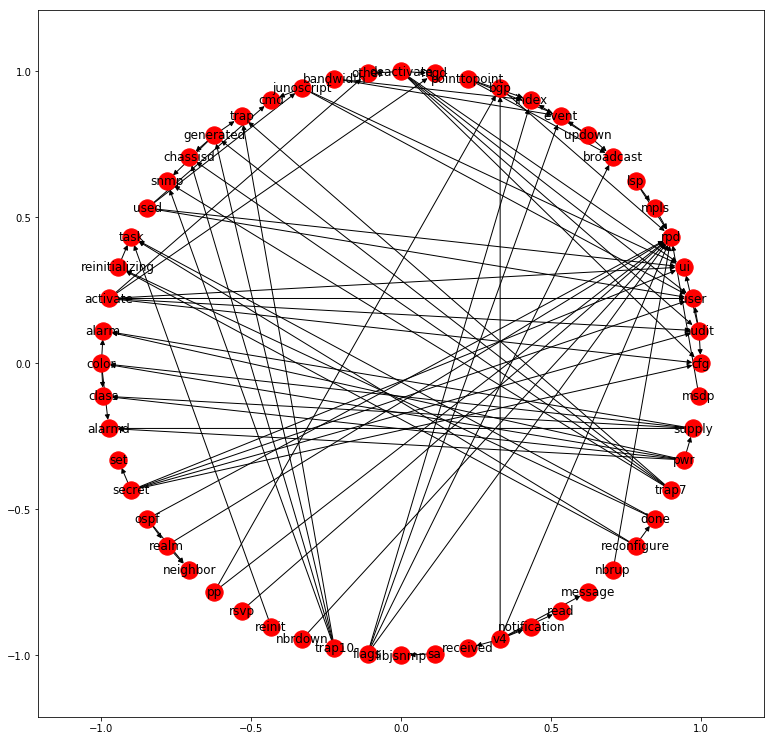

In [16]:
plt.figure(figsize=(13, 13))
nx.draw_networkx(G, pos=nx.shell_layout(G))
plt.show()

## LDA

- __getItem__での結果は，inference(collect_stats=True)の結果をノーマライズしたものっぽい

In [10]:
for cat, lts in lt_per_cat.items():
    print(cat)

system(cron)
network(lacp)
service(ntp)
monitor(syslog)
network(mtu)
mgmt(login)
system(ui)
mgmt(command)
mgmt(ssh)
network(l2)
system(unix)
network(storm)
system(pic)
network(pfe)
system(ppe)
mgmt(pam)
mgmt(su)
egp(bgp)
network(mld)
system(fpc)
network(arp)
interface(port)
mgmt(config)
interface(agg)
monitor(snmp)
interface(if_event)
interface(vlan)
mgmt(enable)
vpn(mpls)
network(stp)
igp(ospf)
network(rsvp)
vpn(l2vc)
vpn(vpls)
network(tcp)
system(fan)
mgmt(ftp)
network(sfp)
system(power)
system(system_conf)
network(socket)
system(tnp)
system(alarm)
system(gres)
network(pim)
egp(msdp)
interface(interface)
system(others)
system(config_apply)
mgmt(config_process)
network(routing)
mgmt(ui_error)
system(None)
system(cos)
system(ppm)
monitor(bfd)
system(lisence)
network(icmp)
system(csu)
system(boot)
system(pci)
interface(inet6)
network(lldp)
network(mcsnoop)


In [11]:
tmp = []
eval_corpus = []
eval_corpus_ltids = []
for ltid, i in enumerate(corpus):
    if word_dict['ui'] not in [j[0] for j in i]: # uiを弾く(550番)
        tmp.append(tuple(sorted(i)))
        eval_corpus.append(i)
        eval_corpus_ltids.append(ltid)
    
print(len(tmp))
set_corpus = list(set(tmp))

1246


In [ ]:
from IPython.core.debugger import Pdb; Pdb().set_trace()
lda = gensim.models.ldamodel.LdaModel(
                                      #corpus=corpus, 
                                      corpus=set_corpus,
                                      chunksize=5,
                                      num_topics=40, 
                                      id2word=inv_word_dict, 
                                      minimum_probability=1e-8, 
                                      #gamma_threshold=1e-5,
                                      #eval_every=10,
                                      iterations=100,
#                                       alpha='auto', 
#                                       eta='auto', 
                                      decay=1.0,
                                      passes=1,
                                      per_word_topics=True)

--Return--
None
> <ipython-input-12-34fd474ebe5a>(1)<module>()
----> 1 from IPython.core.debugger import Pdb; Pdb().set_trace()
      2 lda = gensim.models.ldamodel.LdaModel(
      3                                       #corpus=corpus,
      4                                       corpus=set_corpus,
      5                                       chunksize=5,

ipdb> s
> /home/otomo/.pyenv/versions/3.6.1/lib/python3.6/site-packages/IPython/core/interactiveshell.py(2913)run_code()
   2911             finally:
   2912                 # Reset our crash handler in place
-> 2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:
   2915             if result is not None:



In [19]:
results =  [np.argmax(l) for l in lda.inference(eval_corpus)[0]]

inference_results = {}
for a,b in zip(eval_corpus, results):
    if b in inference_results:
        inference_results[b].append([inv_word_dict[c[0]] for c in a])
    else:
        inference_results[b] = [[inv_word_dict[c[0]] for c in a]]

In [51]:
inf_topic_words = {}
for topic in range(lda.num_topics):
    print(topic, [inv_word_dict[i[0]] for i in lda.get_topic_terms(topic)])
    inf_topic_words[topic] = [inv_word_dict[i[0]] for i in lda.get_topic_terms(topic)]

0 ['mcsn', 'received', 'message', 'ifl', 'op', 'stp', 'input', 'ae', 'iff', 'bundle']
1 ['mac', 'channel', 'ucode', 'l2ald', 'program', 'img', 'gumem', 'mask', 'group.', '0800000000000000']
2 ['xntpd', 'ntpd', 'enabled', 'sync', 'intf', '4.2.0-a', 'precision', 'usec', 'reachable', 'servers']
3 ['config', 'destination', 'turning', 'pfealiveness', 'hostif', 'fpc11', 'fpc1', 'unsupported', 'mq', 'off']
4 ['link', 'system', 'chassism', 'sfp', 'mic', 'low', 'csu', 'fxp0', 'pcie', 'other']
5 ['/kernel', 'error', 'failed', '-', 'changed', 'status', 'jsr', 'socket', 'sdrl', 'bundle']
6 ['login', 'user', 'local', 'incorrect', 'password', 'show', 'pam', 'attempt', 'client', 'authentication']
7 ['mpls', 'change', 'lsp', 'path', 'kern', 'arp', 'me', 'mvlan', 'console', 'unplugged']
8 ['set', 'create', 'queue', 'configuration', 'dcd', 'kernel', 'cannot', 'max', 'v', 'vq']
9 ['pointtopoint', 'instance', 'rpd', 'broadcast', 'event', 'index', 'flags', 'multicast', 'edit', 'rpd1896']
10 ['license-check

### eval

- 外れたやつについて，調査

In [84]:
for a,b in lt_per_cat.items():
    print(a, len(b))

system(cron) 8
network(lacp) 6
service(ntp) 35
monitor(syslog) 4
network(mtu) 26
mgmt(login) 38
system(ui) 41
mgmt(command) 24
mgmt(ssh) 18
network(l2) 15
system(unix) 35
network(storm) 6
system(pic) 35
network(pfe) 47
system(ppe) 6
mgmt(pam) 3
mgmt(su) 4
egp(bgp) 56
network(mld) 1
system(fpc) 76
network(arp) 6
interface(port) 10
mgmt(config) 491
interface(agg) 36
monitor(snmp) 80
interface(if_event) 133
interface(vlan) 6
mgmt(enable) 2
vpn(mpls) 85
network(stp) 12
igp(ospf) 15
network(rsvp) 14
vpn(l2vc) 2
vpn(vpls) 2
network(tcp) 4
system(fan) 2
mgmt(ftp) 4
network(sfp) 9
system(power) 8
system(system_conf) 1
network(socket) 6
system(tnp) 6
system(alarm) 45
system(gres) 7
network(pim) 4
egp(msdp) 10
interface(interface) 5
system(others) 6
system(config_apply) 2
mgmt(config_process) 1
network(routing) 4
mgmt(ui_error) 5
system(None) 228
system(cos) 10
system(ppm) 3
monitor(bfd) 3
system(lisence) 4
network(icmp) 2
system(csu) 6
system(boot) 4
system(pci) 17
interface(inet6) 1
network(ll

In [87]:
inf_per_cat = {}
for cat,lts in lt_per_cat.items():
    print(cat)
    inf_per_cat[cat] = []
    for lt in lts:
#         print(lt)
        c = list(collections.Counter([word_dict[w] for w in string_to_corpus(lt, max_len=7)]).items())
        topic_dist, word_topic, word_topic_dist = lda[c]
        inf_topic = np.argmax(np.array([t[1] for t in topic_dist]))
        inf_per_cat[cat].append(inf_topic)
        print("\t", inf_topic, ",", lt)
#         print()

system(cron)
	 38 , /usr/sbin/cron[**]: (root) CMD (newsyslog)
	 38 , /usr/sbin/cron[**]: (**) CMD (adjkerntz -a)
	 38 , /usr/sbin/cron[**]: (**) CMD (/usr/sbin/check-support -l)
	 38 , ** /usr/sbin/cron[**]: (**) CMD (newsyslog)
	 38 , ** /usr/sbin/cron[**]: (**) CMD (adjkerntz -a)
	 38 , ** /usr/sbin/cron[**]: (**) CMD (/usr/sbin/check-support -l)
	 38 , /usr/sbin/cron[**]: (root) CMD ( /usr/libexec/atrun)
	 38 , /usr/sbin/cron[**]: (*system*) RELOAD (/etc/crontab)
network(lacp)
	 25 , mib2d[**]: lacp info not found for ifl:**
	 25 , mib2d[**]: cleared lacp info not found for ifl:**
	 25 , ifinfo: lacp info not found for ifl:**
	 25 , ifinfo: cleared lacp info not found for ifl:**
	 25 , /kernel: KERN_LACP_INTF_STATE_CHANGE: lacp_update_state_userspace: new state is ** cifd **
	 25 , lacpd[**]: LACPD_TIMEOUT: **: lacp current while timer expired current Receive State: CURRENT
service(ntp)
	 2 , xntpd[**]: NTP Server Unreachable
	 2 , xntpd[**]: kernel time sync enabled **
	 2 , xntpd

	 38 , file[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command 'load-configuration rollback="**" '
	 38 , file[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command 'load-configuration format="xml" action="**" '
	 38 , mgd[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command 'request-package-validate operation=validate package-name=/var/tmp/mchassis-install.tgz **'
	 38 , mgd[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command 'request-package-validate package-name=/var/tmp/mchassis-install.tgz **'
	 38 , mgd[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command 'request-package-add operation=update no-validate package-name=/var/tmp/mchassis-install.tgz **'
mgmt(ssh)
	 32 , sshd[**]: Accepted password for ** from ** port ** **
	 32 , sshd[**]: Received disconnect from **: **: disconnected by user
	 6 , sshd: User '**' authenticated successfully but no local login-id configured.
	 32 , sshd[*

	 22 , rpd[**]: bgp_pp_recv:**: NOTIFICATION sent to **+** (proto): code ** (Cease) subcode ** (Connection Rejected)
	 22 , rpd[**]: bgp_read_v4_message:**: NOTIFICATION received from ** (** AS **): code ** (Cease) subcode ** (** **)
	 22 , rpd[**]: bgp_read_v4_message:**: NOTIFICATION received from ** (** AS **): code ** (Cease) subcode ** (Other Configuration Change)
	 22 , rpd[**]: bgp_read_v4_message:**: NOTIFICATION received from ** (** AS **): code ** (Cease) subcode ** (invalid)
	 22 , rpd[**]: bgp_recv: read from peer ** (** AS **) failed: Connection reset by peer
	 22 , rpd[**]: bgp_recv: peer ** (** AS **): received unexpected EOF
	 22 , rpd[**]: bgp_pp_recv:**: NOTIFICATION sent to ** (** AS **): code ** (Cease) subcode ** (Connection collision resolution), Reason: dropping ** (** AS **), connection collision prefers **+** (proto)
	 22 , rpd[**]: bgp_pp_recv: dropping ** (** AS **), connection collision prefers **+** (proto)
	 22 , rpd[**]: bgp_recv: peer **+** (proto): rece

	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' activate: [routing-options] "**
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [logical-systems ** interfaces ** unit **]
	 8 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [logical-systems ** interfaces ** unit ** vlan-id] <unconfigured> -> "**"
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [logical-systems ** interfaces ** unit ** family **]
	 8 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [logical-systems ** interfaces ** unit ** family ** mtu] <unconfigured> -> "**"
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [logical-systems ** interfaces ** unit ** family ** address **]
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [logical-systems ** routing-instances ** interface **]
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' deactivate: [protocols pim **]
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' deactivate: [protocols bgp group ** neighbor **]
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' deactivate: [protocols bgp group ** neighbo

	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [logical-systems ** routing-instances ** protocols rip group ** export **]
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [logical-systems ** routing-instances ** protocols rip group ** neighbor **]
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [protocols rip group ** neighbor **]
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [logical-systems ** routing-instances ** protocols rip group kek neighbor **]
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' deactivate: [interfaces **]
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' deactivate: [class-of-service interfaces **]
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' activate: [interfaces **]
	 8 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [policy-options as-path-group ** as-path **] "**+$ -> "**+**"
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [policy-options policy-statement ** term ** from as-path-group] "**
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [policy-opti

	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' deactivate: [firewall family ** filter ** term ** from **]
	 24 , mgd[**]: UI_CFG_AUDIT_NEW: User '**' rename: [firewall family ** filter ** term **] to "**"
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' activate: [firewall family ** filter ** term ** from **]
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [vlans **]
	 8 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [vlans ** description] <unconfigured> -> "for **"
	 8 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [vlans ** vlan-id] <unconfigured> -> "**"
	 4 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [interfaces ** unit ** family ** vlan members **]
	 8 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [interfaces ** unit ** family ** port-mode] <unconfigured> -> "**"
	 8 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [interfaces ** ether-options] <unconfigured> -> "**"
	 23 , cfmd[**]: task_reconfigure reinitializing done
	 23 , mcsn[**]: TASK_TASK_REINIT: Reinitializing
	 23 , eswd[**]: task_reco

	 22 , [**]: EVT ** ** ** MAC ** **:** Port(**) detached from Channel Group(**) - ** Aggregation bit is FALSE.
	 1 , [**]: EVT ** ** E3 MAC 20120014 0800:000000000000 Port(**) detached from Channel Group(2) - LACPDU timeout.
	 22 , [**]: EVT ** ** ** MAC ** **:** Channel Group(**) disabled administratively.
	 22 , [**]: EVT ** ** ** MAC ** **:** Channel Group(**) enabled administratively.
	 7 , chassism[**]: mvlan_handle_iffm: Rcvd iff msg, op **, af **, ifl_index **, if_name **, member_role **
monitor(snmp)
	 28 , mib2d[**]: SNMP_TRAP_LINK_DOWN: ifIndex **, ifAdminStatus **(**), ifOperStatus **(**), ifName **
	 28 , mib2d[**]: SNMP_TRAP_LINK_UP: ifIndex **, ifAdminStatus **(**), ifOperStatus **(**), ifName **
	 31 , rpd[**]: EVENT <SNMP Index> ** index ** <Up Broadcast Multicast> address #** **
	 31 , **: rpd[**]: EVENT <SNMP Index> ** index ** <Up Broadcast PointToPoint Multicast>
	 28 , snmpd[**]: SNMPD_TRAP_QUEUED: Adding trap to ** to ** queue, ** traps in queue
	 28 , snmpd[**]: 

	 31 , mcsn[**]: EVENT <Delete> index ** <Broadcast Multicast>
	 31 , **: rpd[**]: EVENT <Delete> index ** <Broadcast Multicast>
	 31 , **: rpd[**]: EVENT <UpDown MTU> index ** <Broadcast Multicast>
	 31 , mcsn[**]: EVENT <UpDown MTU> index ** <Broadcast Multicast>
	 31 , rpd[**]: EVENT <Delete> index ** <Broadcast Multicast>
	 31 , rpd[**]: EVENT <UpDown MTU> index ** <Broadcast Multicast>
	 31 , rpd[**]: EVENT <UpDown> ** index ** <Broadcast PointToPoint Multicast>
	 31 , rpd[**]: EVENT <Flags> ** index ** <Broadcast PointToPoint Multicast>
	 31 , rpd[**]: EVENT Delete ** index ** <Broadcast PointToPoint Multicast>
	 31 , rpd[**]: EVENT <Add> ** index ** <Broadcast PointToPoint Multicast>
	 31 , rpd[**]: EVENT <Instance> ** index ** <Broadcast PointToPoint Multicast>
	 31 , rpd[**]: EVENT Delete UpDown ** index ** ** -> ** <Broadcast PointToPoint Multicast Localup>
	 31 , rpd[1896]: EVENT Delete UpDown ** index ** <Broadcast PointToPoint Multicast Localup>
	 31 , rpd[**]: EVENT <Dele

	 11 , rpd[**]: RPD_OSPF_NBRDOWN: OSPF neighbor ** (realm ** ** area **) state changed from ** to ** due to 1WayRcvd (event reason: neighbor is in one-way mode)
	 11 , **:rpd[**]: RPD_OSPF_NBRDOWN: OSPF neighbor ** (realm ** ** area **) state changed from ** to ** due to 1WayRcvd (event reason: neighbor is in one-way mode)
network(rsvp)
	 11 , **:rpd[**]: RPD_RSVP_NBRDOWN: RSVP neighbor ** down on interface **, triggered by IGP neighbor down event
	 11 , **:rpd[**]: RPD_RSVP_NBRUP: RSVP neighbor ** up on interface **
	 11 , **:rpd[**]: RPD_RSVP_BACKUP_DOWN: Backup for protecting LSP ** down, using bypass Bypass->**, reason: Deleting protected LSP
	 11 , **:rpd[**]: RPD_RSVP_BYPASS_DOWN: RSVP bypass Bypass->**>** for protecting interface ** went down, reason: RSVP session down
	 11 , **:rpd[**]: RPD_RSVP_BYPASS_DOWN: RSVP bypass Bypass->** for protecting interface ** went down, reason: RSVP session down
	 11 , **:rpd[**]: RPD_RSVP_BACKUP_DOWN: Backup for protecting LSP ** down, using by

	 21 , L2ALM master RE connection made
	 35 , MPC: Reset reason (**): Power on
	 16 , cmtfpc_create_asic_pio_handles entered, hostname (**)
	 30 , Creating trinity I2C dev for ** ** li=** i2=**
	 12 , Version ** by builder on ** ** UTC
	 17 , On-board NVRAM contains diagnostic information.
	 20 , SNTPD: Initial time of day set.
	 36 , QX ** is absent.
	 16 , CMT: cmtfpc_asic_init_pfe ** init (mah=**) called
	 12 , Calling **
	 14 , Aser: succesfully register Aser jspec
	 14 , fpga_jspec_register, **, fpga ver ** not match jspec ver **
	 8 , Cannot locate jspec model for 'SG', **: using best match: **
	 24 , Forbes0, all FIFO disabled.
	 24 , Forbes1, all FIFO disabled.
	 25 , Found the 1st BCM5389 Ethernet switch
	 25 , Found the 2nd BCM5389 Ethernet switch
	 17 , [cospic_mt_init] cosfpc_vectors initialized
	 18 , CLKSYNC: failed to connect to Master
	 6 , /kernel: Local package initialization:
	 5 , /kernel: **
	 5 , /kernel: kern.securelevel:
	 5 , /kernel: ->
	 6 , /kernel: starting

	 4 , mic_ifd_attach: Calling ** for link ** MIC(**)
system(cos)
	 15 , /kernel: GENCFG: op ** (CoS) failed; err ** (Invalid)
	 15 , cosd[**]: cosd_gencfg_classifier_def: clk_type ** clk_name edge_classifier_ieee-802.1 cl_id ** cl_is_default 0cl_sent ** cl_dirty **
	 15 , cosd[**]: COSD_GENCFG_WRITE_FAILED: GENCFG write failed for Rewrite to IFL ** Reason: File exists
	 36 , cosman_fpc_init: FC based rewrite is ON for fpc
	 36 , cos_module_init: FC based rewrite is ON for pfe
	 15 , cosd[**]: COSD_GENCFG_WRITE_FAILED: GENCFG write failed for Classifier to IFL ** Reason: File exists
	 15 , cosd[**]: COSD_CLASS_8021P_UNSUPPORTED: ieee-802.1 classifier is not valid on interface **
	 15 , COS(cos_classifier_pre_unbind_action:**): cos_ifl with index ** not found
	 15 , /kernel: GENCFG: op ** (CoS) failed; err ** (Unknown)
	 15 , ** COS(cos_classifier_pre_unbind_action:**): cos_ifl with index ** not found
system(ppm)
	 32 , PPMAN disconnected; Remote side closed
	 18 , PPMAN: Established con

In [78]:
inf_per_cat = {}
for cat,lts in lt_per_cat.items():
    print(cat)
    inf_per_cat[cat] = []
    for lt in lts:
        print(lt)
        c = list(collections.Counter([word_dict[w] for w in string_to_corpus(lt, max_len=7)]).items())
        topic_dist, word_topic, word_topic_dist = lda[c]
        inf_topic = np.argmax(np.array([t[1] for t in topic_dist]))
        inf_per_cat[cat].append(inf_topic)
        print("\t", inf_topic)
        print("\t", inf_topic_words[inf_topic])
        print("\t"+"-"*10)
        for w in word_topic_dist:
            print("\t", inv_word_dict[w[0]], w[1])
        print()

system(cron)
/usr/sbin/cron[**]: (root) CMD (newsyslog)
	 38
	 ['/usr/sbin/cron', 'cmd', 'root', 'newsyslog', '/usr/sbin/check-support', '-a', 'reload', '*system*', '/usr/libexec/atrun', '/etc/crontab']
	----------
	 /usr/sbin/cron [(38, 1.0000001)]
	 root [(38, 1.0)]
	 cmd [(38, 1.0)]
	 newsyslog [(38, 1.0)]

/usr/sbin/cron[**]: (**) CMD (adjkerntz -a)
	 38
	 ['/usr/sbin/cron', 'cmd', 'root', 'newsyslog', '/usr/sbin/check-support', '-a', 'reload', '*system*', '/usr/libexec/atrun', '/etc/crontab']
	----------
	 /usr/sbin/cron [(38, 1.0000001)]
	 cmd [(38, 1.0)]
	 adjkerntz [(38, 1.0)]
	 -a [(38, 1.0)]

/usr/sbin/cron[**]: (**) CMD (/usr/sbin/check-support -l)
	 38
	 ['/usr/sbin/cron', 'cmd', 'root', 'newsyslog', '/usr/sbin/check-support', '-a', 'reload', '*system*', '/usr/libexec/atrun', '/etc/crontab']
	----------
	 /usr/sbin/cron [(38, 1.0000001)]
	 cmd [(38, 1.0)]
	 /usr/sbin/check-support [(38, 1.0)]
	 -l [(38, 1.0)]

** /usr/sbin/cron[**]: (**) CMD (newsyslog)
	 38
	 ['/usr/sbin/c

	 esc [(6, 0.98711413), (22, 0.012885928)]

** login: Login attempt for user ** from host **
	 6
	 ['login', 'user', 'local', 'incorrect', 'password', 'show', 'pam', 'attempt', 'client', 'authentication']
	----------
	 login [(6, 1.9975442)]
	 attempt [(6, 0.9999881)]
	 for [(37, 1.0)]
	 user [(6, 1.0000001)]
	 from [(22, 1.0)]
	 host [(16, 1.0)]

** login[**]: LOGIN_INFORMATION: User ** logged in from host ** on device **
	 6
	 ['login', 'user', 'local', 'incorrect', 'password', 'show', 'pam', 'attempt', 'client', 'authentication']
	----------
	 login [(6, 1.9980862)]
	 information [(6, 0.99994683)]
	 user [(6, 1.0)]
	 logged [(6, 0.99994683)]
	 in [(14, 1.0)]
	 from [(22, 1.0)]

[**]: EVT ** ** ** ACCESS ** **:** Login incorrect show log.
	 6
	 ['login', 'user', 'local', 'incorrect', 'password', 'show', 'pam', 'attempt', 'client', 'authentication']
	----------
	 evt [(22, 1.0)]
	 access [(22, 0.99999994)]
	 login [(6, 0.9967543)]
	 incorrect [(6, 0.99999124)]
	 show [(6, 0.9999901)]


	 38
	 ['/usr/sbin/cron', 'cmd', 'root', 'newsyslog', '/usr/sbin/check-support', '-a', 'reload', '*system*', '/usr/libexec/atrun', '/etc/crontab']
	----------
	 mgd [(24, 0.99999994)]
	 ui [(6, 0.071774505), (24, 0.22836135), (38, 0.69986415)]
	 junoscript [(6, 0.14354901), (24, 0.4567227), (38, 1.3997283)]
	 cmd [(38, 1.0)]
	 user [(6, 1.0)]
	 used [(6, 0.071774505), (24, 0.22836135), (38, 0.69986415)]

mgmt(ssh)
sshd[**]: Accepted password for ** from ** port ** **
	 32
	 ['not', 'sshd', 'delete', 'rsp', 'invalid', 'duplicate', 'disconnect', 'can', 'receive', 'disconnected']
	----------
	 sshd [(32, 0.9999998)]
	 accepted [(6, 0.19335735), (32, 0.80654705)]
	 password [(6, 1.0)]
	 for [(37, 1.0)]
	 from [(22, 1.0000001)]
	 port [(13, 1.0)]

sshd[**]: Received disconnect from **: **: disconnected by user
	 32
	 ['not', 'sshd', 'delete', 'rsp', 'invalid', 'duplicate', 'disconnect', 'can', 'receive', 'disconnected']
	----------
	 sshd [(32, 0.9999999)]
	 received [(0, 1.0)]
	 disconnect

	 13
	 ['port', 'init', 'slot', 'pic', 'signal', 'pid', 'by', 'with', 'terminate', 'status']
	----------
	 slot [(13, 2.0)]
	 pic [(13, 2.9999998)]
	 system [(4, 1.0)]
	 init [(13, 1.0)]

Slot **, PIC Slot **) SNTPD: Initial time of day set.
	 20
	 ['info', 'of', 'mib2d', 'time', 'tnp.tftpd', 'tftpd', 'initial', 'check', 'blocks', 'ntpdate']
	----------
	 slot [(13, 2.0)]
	 pic [(13, 1.0)]
	 sntpd [(20, 0.99601626)]
	 initial [(20, 0.9941138)]
	 time [(20, 0.9993099)]
	 of [(20, 1.0000001)]

Slot **, PIC Slot **) PFEMAN: sent resync request to master
	 18
	 ['sent', 'to', 'pfeman', 'master', 'the', 'active', 'pic', 'request', 'manager', 'detected']
	----------
	 slot [(13, 1.9999999)]
	 pic [(13, 0.53496605), (18, 0.46503398)]
	 pfeman [(18, 1.0)]
	 sent [(18, 1.0)]
	 resync [(18, 1.0)]
	 request [(18, 0.99999994)]

Slot **, PIC Slot **) PFEMAN: Got the resync ACK
	 18
	 ['sent', 'to', 'pfeman', 'master', 'the', 'active', 'pic', 'request', 'manager', 'detected']
	----------
	 slot [(13

	 v4 [(0, 0.21432288), (22, 0.78567713)]
	 message [(0, 1.0)]
	 notification [(0, 0.016537964), (22, 0.9834621)]
	 received [(0, 0.99999994)]

rpd[**]: bgp_recv: read from peer ** (** AS **) failed: Connection reset by peer
	 22
	 ['evt', 'from', 'rpd', 'bgp', 'read', 'snmpd', 'peer', 'notification', 'access', 'nif']
	----------
	 rpd [(22, 1.0)]
	 bgp [(22, 1.0)]
	 recv [(22, 1.0)]
	 read [(22, 1.0)]
	 from [(22, 1.0)]
	 peer [(22, 1.0)]
	 as [(22, 1.0)]

rpd[**]: bgp_recv: peer ** (** AS **): received unexpected EOF
	 22
	 ['evt', 'from', 'rpd', 'bgp', 'read', 'snmpd', 'peer', 'notification', 'access', 'nif']
	----------
	 rpd [(22, 1.0)]
	 bgp [(22, 1.0)]
	 recv [(22, 0.99999994)]
	 peer [(22, 1.0)]
	 as [(22, 1.0)]
	 received [(0, 1.0)]
	 unexpected [(22, 0.9944586)]

rpd[**]: bgp_pp_recv:**: NOTIFICATION sent to ** (** AS **): code ** (Cease) subcode ** (Connection collision resolution), Reason: dropping ** (** AS **), connection collision prefers **+** (proto)
	 22
	 ['evt', 'fro

	 33
	 ['entry', 'ok', 'mqchip', 'packet', 'tcp', 'auth', 'dropped', 'idpd', 'thread', 'li']
	----------
	 fpc11 [(3, 0.99999994)]
	 mqchip [(33, 0.9999999)]
	 fi [(3, 0.01593032), (25, 0.10618782), (33, 0.8778819)]
	 reorder [(3, 0.01593032), (25, 0.10618782), (33, 0.8778819)]
	 cell [(3, 0.01593032), (25, 0.10618782), (33, 0.8778819)]
	 timeout [(25, 1.0)]

** MQCHIP(**) PLL lock status **
	 33
	 ['entry', 'ok', 'mqchip', 'packet', 'tcp', 'auth', 'dropped', 'idpd', 'thread', 'li']
	----------
	 mqchip [(33, 1.0)]
	 pll [(33, 0.9999786)]
	 lock [(33, 0.9999786)]
	 status [(5, 1.0)]

** Starting luchip_memory_interface_init
	 13
	 ['port', 'init', 'slot', 'pic', 'signal', 'pid', 'by', 'with', 'terminate', 'status']
	----------
	 starting [(13, 0.99999994)]
	 luchip [(14, 0.99999994)]
	 memory [(13, 0.32394075), (14, 0.6361474), (37, 0.039911896)]
	 interface [(37, 1.0)]
	 init [(13, 0.9999999)]

** LUCHIP(**) DDR3 VERIFY_PASSED at retry **
	 19
	 ['address', 'chas', 'failure', 'at', 'd

	 4
	 ['link', 'system', 'chassism', 'sfp', 'mic', 'low', 'csu', 'fxp0', 'pcie', 'other']
	----------
	 mgd [(24, 0.99999994)]
	 ui [(4, 0.333824), (6, 0.1292135), (24, 0.53696257)]
	 cfg [(4, 1.0)]
	 audit [(4, 0.333824), (6, 0.1292135), (24, 0.53696257)]
	 other [(4, 1.0000001)]
	 user [(6, 0.9999999)]
	 rollback [(4, 0.333824), (6, 0.1292135), (24, 0.53696257)]

mgd[**]: UI_CFG_AUDIT_SET_SECRET: User '**' set: [system root-authentication **]
	 24
	 ['all', 'proto', 'tnp.bootpd', '-x', 'boot', 'bootpd', '/usr/libexec/ui/package', 'mgd', 'fifo', 'plane']
	----------
	 mgd [(24, 1.0000001)]
	 ui [(4, 0.1280354), (6, 0.13517883), (8, 0.13937591), (24, 0.5974099)]
	 cfg [(4, 1.0)]
	 audit [(4, 0.1280354), (6, 0.13517883), (8, 0.13937591), (24, 0.5974099)]
	 set [(8, 1.0)]
	 secret [(4, 0.1280354), (6, 0.13517883), (8, 0.13937591), (24, 0.5974099)]
	 user [(6, 1.0)]

mgd[**]: UI_CFG_AUDIT_SET_SECRET: User '**' set: [system login user ** authentication **]
	 24
	 ['all', 'proto', 'tnp.boot

	 set [(8, 2.0)]
	 user [(6, 1.0)]

mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [logical-systems ** protocols ** area ** interface ** interface-type] <unconfigured> -> "**"
	 8
	 ['set', 'create', 'queue', 'configuration', 'dcd', 'kernel', 'cannot', 'max', 'v', 'vq']
	----------
	 mgd [(24, 1.0000001)]
	 ui [(4, 0.12525414), (6, 0.1311939), (8, 0.3645698), (24, 0.3789821)]
	 cfg [(4, 1.0)]
	 audit [(4, 0.12525414), (6, 0.1311939), (8, 0.3645698), (24, 0.3789821)]
	 set [(8, 2.0)]
	 user [(6, 1.0)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [routing-options static route ** next-hop] "**
	 4
	 ['link', 'system', 'chassism', 'sfp', 'mic', 'low', 'csu', 'fxp0', 'pcie', 'other']
	----------
	 mgd [(24, 1.0000001)]
	 ui [(4, 0.35264477), (6, 0.136496), (24, 0.4077663), (32, 0.103092946)]
	 cfg [(4, 1.0)]
	 audit [(4, 0.35264477), (6, 0.136496), (24, 0.4077663), (32, 0.103092946)]
	 other [(4, 1.0)]
	 user [(6, 1.0)]
	 delete [(32, 1.0)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [pol

	 4
	 ['link', 'system', 'chassism', 'sfp', 'mic', 'low', 'csu', 'fxp0', 'pcie', 'other']
	----------
	 mgd [(24, 0.99999994)]
	 ui [(4, 0.33382818), (6, 0.12922265), (24, 0.53694916)]
	 cfg [(4, 0.99999994)]
	 audit [(4, 0.33382818), (6, 0.12922265), (24, 0.53694916)]
	 other [(4, 1.0)]
	 user [(6, 1.0)]
	 activate [(4, 0.33382818), (6, 0.12922265), (24, 0.53694916)]

mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [system ntp server **] <unconfigured> -> "**"
	 8
	 ['set', 'create', 'queue', 'configuration', 'dcd', 'kernel', 'cannot', 'max', 'v', 'vq']
	----------
	 mgd [(24, 0.99999994)]
	 ui [(4, 0.124867685), (6, 0.13076398), (8, 0.36348245), (24, 0.380886)]
	 cfg [(4, 1.0)]
	 audit [(4, 0.124867685), (6, 0.13076398), (8, 0.36348245), (24, 0.380886)]
	 set [(8, 2.0)]
	 user [(6, 1.0)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [system ntp server **] "**
	 4
	 ['link', 'system', 'chassism', 'sfp', 'mic', 'low', 'csu', 'fxp0', 'pcie', 'other']
	----------
	 mgd [(24, 0.99999994)]
	 u

	 user [(6, 1.0000001)]

file[**]: UI_CFG_AUDIT_SET: User '**' set: [juniper-config logical-systems ** routing-instances ** protocols vpls] <unconfigured> -> "**"
	 8
	 ['set', 'create', 'queue', 'configuration', 'dcd', 'kernel', 'cannot', 'max', 'v', 'vq']
	----------
	 file [(32, 1.0)]
	 ui [(4, 0.17386293), (6, 0.18286371), (8, 0.50967157), (32, 0.13360184)]
	 cfg [(4, 1.0)]
	 audit [(4, 0.17386293), (6, 0.18286371), (8, 0.50967157), (32, 0.13360184)]
	 set [(8, 1.996609)]
	 user [(6, 1.0)]

file[**]: UI_CFG_AUDIT_SET: User '**' set: [juniper-config logical-systems ** routing-instances ** protocols vpls site ** site-identifier] <unconfigured> -> "**"
	 8
	 ['set', 'create', 'queue', 'configuration', 'dcd', 'kernel', 'cannot', 'max', 'v', 'vq']
	----------
	 file [(32, 0.99999994)]
	 ui [(4, 0.17324993), (6, 0.18242382), (8, 0.50990194), (32, 0.13442433)]
	 cfg [(4, 0.99999994)]
	 audit [(4, 0.17324993), (6, 0.18242382), (8, 0.50990194), (32, 0.13442433)]
	 set [(8, 1.9965897)]
	 use

	 4
	 ['link', 'system', 'chassism', 'sfp', 'mic', 'low', 'csu', 'fxp0', 'pcie', 'other']
	----------
	 mgd [(24, 0.99999994)]
	 ui [(4, 0.35252774), (6, 0.13645932), (24, 0.4079439), (32, 0.103069)]
	 cfg [(4, 1.0)]
	 audit [(4, 0.35252774), (6, 0.13645932), (24, 0.4079439), (32, 0.103069)]
	 other [(4, 0.99999994)]
	 user [(6, 1.0)]
	 delete [(32, 0.99999994)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [routing-instances ** interface **]
	 4
	 ['link', 'system', 'chassism', 'sfp', 'mic', 'low', 'csu', 'fxp0', 'pcie', 'other']
	----------
	 mgd [(24, 1.0000001)]
	 ui [(4, 0.35257292), (6, 0.13646883), (24, 0.40788), (32, 0.103078224)]
	 cfg [(4, 1.0)]
	 audit [(4, 0.35257292), (6, 0.13646883), (24, 0.40788), (32, 0.103078224)]
	 other [(4, 1.0)]
	 user [(6, 1.0)]
	 delete [(32, 1.0)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [routing-instances **]
	 4
	 ['link', 'system', 'chassism', 'sfp', 'mic', 'low', 'csu', 'fxp0', 'pcie', 'other']
	----------
	 mgd [(24, 0.99999994)]
	

	 8
	 ['set', 'create', 'queue', 'configuration', 'dcd', 'kernel', 'cannot', 'max', 'v', 'vq']
	----------
	 mgd [(24, 0.99999994)]
	 ui [(4, 0.124845184), (6, 0.13075161), (8, 0.36343876), (24, 0.38096443)]
	 cfg [(4, 1.0)]
	 audit [(4, 0.124845184), (6, 0.13075161), (8, 0.36343876), (24, 0.38096443)]
	 set [(8, 2.0)]
	 user [(6, 1.0)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [routing-options rib ** static route ** bfd-liveness-detection **]
	 4
	 ['link', 'system', 'chassism', 'sfp', 'mic', 'low', 'csu', 'fxp0', 'pcie', 'other']
	----------
	 mgd [(24, 0.99999994)]
	 ui [(4, 0.35255483), (6, 0.13646044), (24, 0.40790883), (32, 0.10307591)]
	 cfg [(4, 1.0)]
	 audit [(4, 0.35255483), (6, 0.13646044), (24, 0.40790883), (32, 0.10307591)]
	 other [(4, 1.0)]
	 user [(6, 1.0)]
	 delete [(32, 1.0)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [routing-options static route ** bfd-liveness-detection minimum-interval]
	 4
	 ['link', 'system', 'chassism', 'sfp', 'mic', 'low', 'csu', 'f

	----------
	 bulkget [(16, 1.0)]
	 manager [(18, 0.9982859)]
	 init [(13, 0.9999999)]
	 ... [(16, 0.94421214), (18, 0.054360688)]

bulkget manager thread creating...
	 33
	 ['entry', 'ok', 'mqchip', 'packet', 'tcp', 'auth', 'dropped', 'idpd', 'thread', 'li']
	----------
	 bulkget [(16, 1.0)]
	 manager [(18, 1.0000001)]
	 thread [(33, 1.0)]
	 creating... [(16, 0.12271457), (18, 0.039973333), (33, 0.83731204)]

chassisd[**]: CHASSISD_SNMP_TRAP10: SNMP trap generated: FRU power on (jnxFruContentsIndex **, jnxFruL1Index **, jnxFruL2Index **, jnxFruL3Index **, jnxFruName PIC: @ **, jnxFruType **, jnxFruSlot **, jnxFruOfflineReason **, jnxFruLastPowerOff **, jnxFruLastPowerOn **)
	 28
	 ['trap', 'snmp', 'bfdd', 'ppe', 'generated', 'throttle', 'mode', 'hw', 'drained', 'ifindex']
	----------
	 chassisd [(21, 2.0)]
	 snmp [(28, 1.9999985)]
	 trap10 [(28, 1.0)]
	 trap [(28, 0.99999994)]
	 generated [(28, 0.99999994)]

BULKGET: connecting to serverRouter
	 16
	 ['pfe', 'bulkget', 'host', 'cmtfpc

	 31
	 ['index', 'event', 'broadcast', 'rpd', 'multicast', 'up', 'updown', 'add', 'bandwidth', 'loopback']
	----------
	 rpd [(31, 0.99999994)]
	 event [(31, 0.99999994)]
	 bandwidth [(31, 1.0)]
	 index [(31, 1.0000001)]
	 broadcast [(31, 0.99999994)]
	 multicast [(31, 1.0)]
	 address [(19, 0.99999994)]

**: rpd[**]: EVENT <Bandwidth UpDown> ** index ** <Up Broadcast Multicast> address #** **
	 31
	 ['index', 'event', 'broadcast', 'rpd', 'multicast', 'up', 'updown', 'add', 'bandwidth', 'loopback']
	----------
	 rpd [(31, 0.99999994)]
	 event [(31, 0.99999994)]
	 bandwidth [(31, 1.0)]
	 updown [(31, 1.0)]
	 index [(31, 1.0000001)]
	 up [(31, 1.0)]
	 broadcast [(31, 0.99999994)]

mcsn[**]: EVENT <Bandwidth UpDown> index ** <Up Broadcast Multicast> address #** **
	 31
	 ['index', 'event', 'broadcast', 'rpd', 'multicast', 'up', 'updown', 'add', 'bandwidth', 'loopback']
	----------
	 mcsn [(0, 1.0000001)]
	 event [(31, 1.0)]
	 bandwidth [(31, 0.99991906)]
	 updown [(31, 1.0)]
	 index [(31, 

	----------
	 rpd [(9, 0.120581105), (31, 0.87941885)]
	 event [(9, 0.09719116), (31, 0.90280885)]
	 delete [(32, 1.0)]
	 index [(9, 0.08358314), (31, 0.9164169)]
	 broadcast [(9, 0.09826509), (31, 0.9017348)]
	 pointtopoint [(9, 0.99999994)]
	 multicast [(9, 0.08123199), (31, 0.91876805)]

rpd[**]: EVENT Add ** index ** ** -> ** <Broadcast PointToPoint Multicast>
	 31
	 ['index', 'event', 'broadcast', 'rpd', 'multicast', 'up', 'updown', 'add', 'bandwidth', 'loopback']
	----------
	 rpd [(9, 0.1026767), (31, 0.89732325)]
	 event [(9, 0.082434244), (31, 0.9175658)]
	 add [(31, 1.0000001)]
	 index [(9, 0.0707305), (31, 0.9292695)]
	 - [(5, 0.99999994)]
	 broadcast [(9, 0.083360165), (31, 0.91663986)]
	 pointtopoint [(9, 1.0)]

rpd[**]: EVENT UpDown ** index ** ** -> ** <Up Broadcast PointToPoint Multicast>
	 31
	 ['index', 'event', 'broadcast', 'rpd', 'multicast', 'up', 'updown', 'add', 'bandwidth', 'loopback']
	----------
	 rpd [(31, 1.0000001)]
	 event [(31, 1.0)]
	 updown [(31, 1.0)]


	----------
	 rpd [(11, 2.0)]
	 mpls [(7, 1.999517)]
	 lsp [(7, 1.9993255)]
	 switch [(25, 0.99999994)]

**:rpd[**]: RPD_MPLS_LSP_SWITCH: MPLS LSP ** switch from primary(**) to secondary(**), Route **(flag=**) **(Label=**): lsp bandwidth ** bps
	 7
	 ['mpls', 'change', 'lsp', 'path', 'kern', 'arp', 'me', 'mvlan', 'console', 'unplugged']
	----------
	 rpd [(11, 2.0)]
	 mpls [(7, 1.999517)]
	 lsp [(7, 1.9993258)]
	 switch [(25, 0.99999994)]

**:rpd[**]: RPD_MPLS_LSP_SWITCH: MPLS LSP ** switch from primary(**) to secondary(**), Route **(flag=**) **(flag=** Label=**) **(flag=**) **(flag=** Label=**) **(flag=**) **(flag=** Label=**) **(flag=**) **(flag=** Label=**) **(flag=**) **(Label=**): lsp bandwidth ** bps
	 7
	 ['mpls', 'change', 'lsp', 'path', 'kern', 'arp', 'me', 'mvlan', 'console', 'unplugged']
	----------
	 rpd [(11, 2.0)]
	 mpls [(7, 1.999517)]
	 lsp [(7, 1.9993255)]
	 switch [(25, 0.99999994)]

**:rpd[**]: RPD_MPLS_LSP_CHANGE: MPLS LSP ** ** on primary(**) Route ** **(flag=**) *

	 34
	 ['alarm', 'craftd', 'state', 'cleared', 'alarmd', 're', 'class', 'color', 'handler', 'tc-generation']
	----------
	 alarmd [(34, 1.0)]
	 connecton [(34, 1.0000001)]
	 succeeded [(34, 1.0)]
	 after [(34, 0.99999994)]
	 retries [(34, 0.99999994)]

alarmd[**]: resending alarm state
	 34
	 ['alarm', 'craftd', 'state', 'cleared', 'alarmd', 're', 'class', 'color', 'handler', 'tc-generation']
	----------
	 alarmd [(34, 1.0)]
	 resending [(34, 1.0)]
	 alarm [(34, 1.0)]
	 state [(34, 0.99999994)]

craftd[**]: chassisd connection succeeded after ** retries
	 34
	 ['alarm', 'craftd', 'state', 'cleared', 'alarmd', 're', 'class', 'color', 'handler', 'tc-generation']
	----------
	 craftd [(21, 0.010036888), (34, 0.9899632)]
	 chassisd [(21, 1.0)]
	 connection [(21, 0.97485876), (34, 0.0251412)]
	 succeeded [(34, 0.99999994)]
	 after [(34, 1.0)]
	 retries [(34, 1.0)]

alarmd[**]: Alarm set: Pwr supply color=**, class=**, reason=PEM ** Fan Failed
	 34
	 ['alarm', 'craftd', 'state', 'cleared', '

	 route [(13, 0.99999994)]
	 update [(11, 0.99999994)]

**: rpd[**]: l2vpn_dyn_config_repo_flush:Session DB still recoverying - postpone flush op
	 3
	 ['config', 'destination', 'turning', 'pfealiveness', 'hostif', 'fpc11', 'fpc1', 'unsupported', 'mq', 'off']
	----------
	 rpd [(11, 1.0)]
	 l2vpn [(3, 0.99998206)]
	 dyn [(3, 0.99999386)]
	 config [(3, 0.99999994)]
	 repo [(3, 0.99998206)]
	 flushsession [(3, 0.99998206)]
	 db [(3, 0.99998206)]

eventd: sendto: No route to host
	 29
	 ['vlan', 'limit', 'src', 'exceeded', 'eventd', 'table', 'vpls', 'policy', 'unable', 'was']
	----------
	 eventd [(29, 1.0)]
	 sendto [(29, 0.99574244)]
	 no [(23, 1.0)]
	 route [(13, 0.99999994)]
	 to [(37, 1.0)]
	 host [(16, 1.0)]

Ignoring unsupported run-length config for sample class Sampler
	 3
	 ['config', 'destination', 'turning', 'pfealiveness', 'hostif', 'fpc11', 'fpc1', 'unsupported', 'mq', 'off']
	----------
	 ignoring [(3, 1.0)]
	 unsupported [(3, 0.99999994)]
	 run-length [(3, 1.0)]
	 config [

	 21
	 ['chassisd', 'connection', 'fpc', 'pem', 'ifdev', 'and', 'detach', 'bad', 'speed', 'ftpd']
	----------
	 chassisd [(21, 2.0)]
	 fru [(21, 1.0000001)]
	 offline [(21, 1.0)]
	 notice [(21, 0.99999994)]
	 taking [(21, 1.0000001)]
	 fpc [(21, 0.99999994)]

tnp.bootpd[**]: BOOTPD_BOOTSTRING: Boot string: boot -X ** ** npc.jbf
	 24
	 ['all', 'proto', 'tnp.bootpd', '-x', 'boot', 'bootpd', '/usr/libexec/ui/package', 'mgd', 'fifo', 'plane']
	----------
	 tnp.bootpd [(24, 1.0)]
	 bootpd [(24, 1.0)]
	 bootstring [(24, 1.0)]
	 boot [(24, 1.999998)]
	 string [(32, 1.0)]
	 -x [(24, 1.0)]

MPC: Reset reason (**): RE Initiated **, Power on
	 35
	 ['reset', 'watchdog', 'mpc', 'reason', 'will', 'initiated', 'service', 'level3', 'level2', 'sp-7/1']
	----------
	 mpc [(35, 1.0)]
	 reset [(35, 0.9999946)]
	 reason [(35, 1.0)]
	 re [(34, 1.0)]
	 initiated [(35, 0.99997765)]
	 power [(30, 1.0)]
	 on [(37, 1.0)]

hostif_show_stream_config: stream ID **, op id **, start buffer ID **, end buffer ID **
	 

	 debug [(13, 0.01977979), (19, 0.97853696)]

chas[**]: cm_pic_port_map_info: Port Map Info for **:** sent
	 13
	 ['port', 'init', 'slot', 'pic', 'signal', 'pid', 'by', 'with', 'terminate', 'status']
	----------
	 chas [(19, 1.0)]
	 cm [(13, 0.11026262), (19, 0.8878913)]
	 pic [(13, 1.0)]
	 port [(13, 1.9999999)]
	 map [(13, 0.10908177), (19, 0.8816649)]
	 info [(20, 1.0)]

chas[**]: XCVR: Freeing itable entry for xcvr index: ** port: **
	 19
	 ['address', 'chas', 'failure', 'at', 'device', 'xcvr', 'cm', 'server', 'temporarily', 'resource']
	----------
	 chas [(19, 1.0)]
	 xcvr [(19, 1.9990826)]
	 freeing [(19, 0.9989854)]
	 itable [(19, 0.99994713)]
	 entry [(33, 1.0)]
	 for [(37, 1.0)]

chas[**]: ifcm_ifd_remove_vector: ifd ** is_vcp ** peer **
	 36
	 ['is', 'ready', 'ifd', 'online', 'ps', 'vector', 'r8', 'notconnect.', 'ifcm', 'normal.']
	----------
	 chas [(19, 1.0)]
	 ifcm [(36, 0.99999976)]
	 ifd [(36, 1.9999816)]
	 remove [(36, 0.9999995)]
	 vector [(36, 0.99999994)]
	 is [(36, 

In [314]:
# l = "mgd[**]: UI_LOGOUT_EVENT: User '**' logout"
# c = list(collections.Counter([word_dict[w] for w in string_to_corpus(l, max_len=7)]).items())
# print([(inv_word_dict[b[0]],b[1]) for b in c])
# res = lda.inference([c], collect_sstats=True)

# print(res[0])
# for i in res[1]:
#     print(i[i!=0.])

[('mgd', 1), ('ui', 1), ('logout', 2), ('event', 1), ('user', 1)]
[[0.025     0.025     0.025     0.025     0.025     0.025     1.1974711
  0.025     0.025     0.025     0.025     0.025     0.025     0.025
  0.025     0.025     0.025     0.025     0.025     0.025     0.025
  0.025     0.025     0.025     1.4414153 0.025     0.025     0.025
  0.025     0.025     0.025     1.0765272 2.3845863 0.025     0.025
  0.025     0.025     0.025     0.025     0.025    ]]
[9.8379385e-37 2.0169186e-19 5.0460918e-19 3.5012971e-37 1.2407113e-36]
[1.7502066e-36 1.2689759e-35 8.9771885e-19 6.2289403e-37 2.2072722e-36]
[2.2708877e-36 1.6464924e-35 1.1647875e-18 8.0820304e-37 2.8639290e-36]
[1.5357625e-36 1.1134946e-35 7.8772586e-19 5.4657393e-37 1.9368262e-36]
[1.07995880e-36 7.83017063e-36 5.53934267e-19 3.84354555e-37
 1.36198955e-36]
[1.5198915e-26 4.6765716e-36 3.3083737e-19 2.2955585e-37 8.1344860e-37]
[9.9999988e-01 2.4314424e-18 1.7200892e-01 1.1935065e-19 4.2292812e-19]
[2.1311137e-36 1.5451500e-

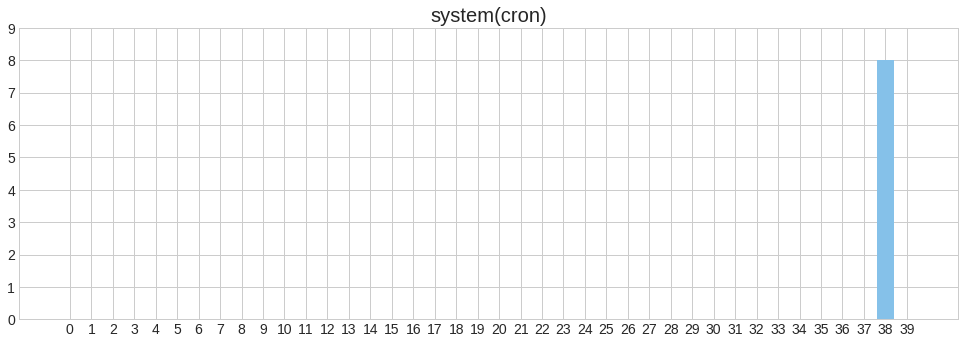

1.2489995996796797


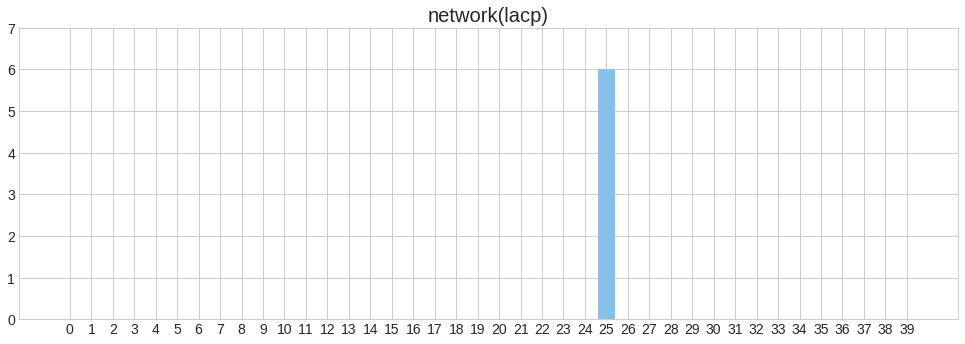

0.9367496997597597


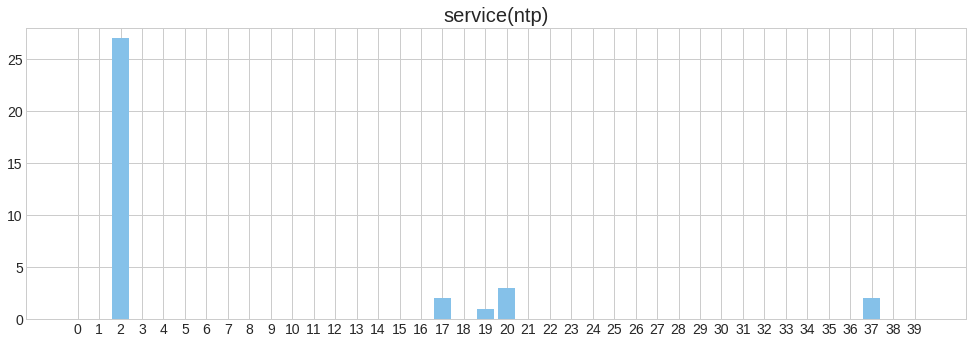

4.231946951463357


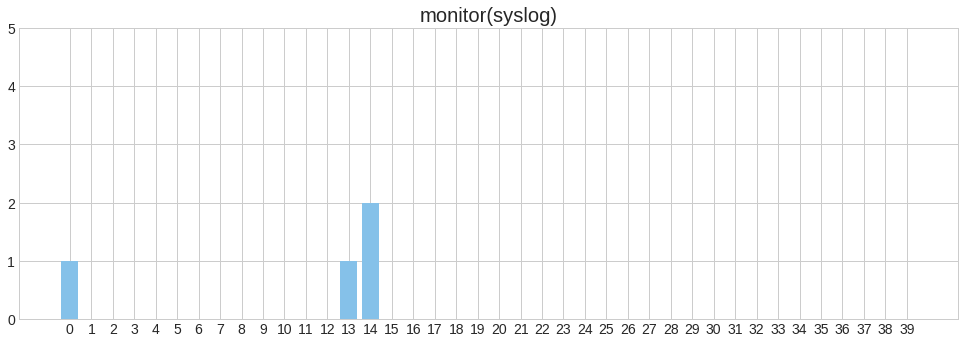

0.37416573867739406


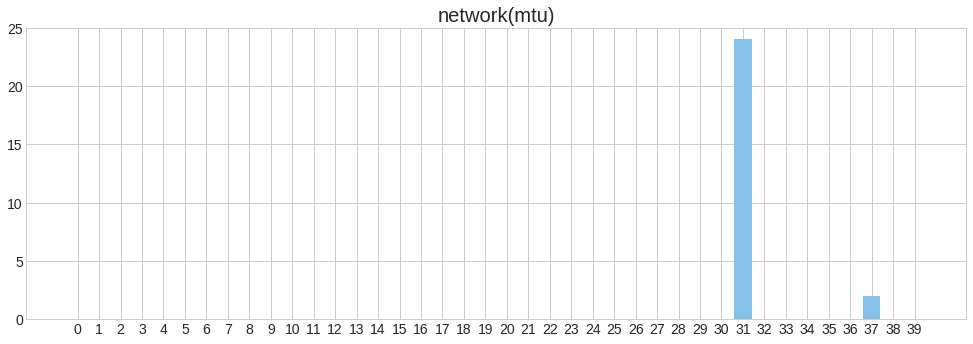

3.751999466950922


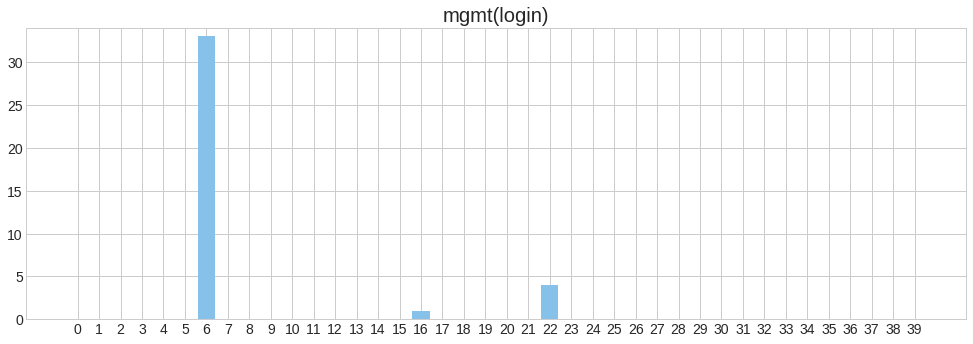

5.171798526624949


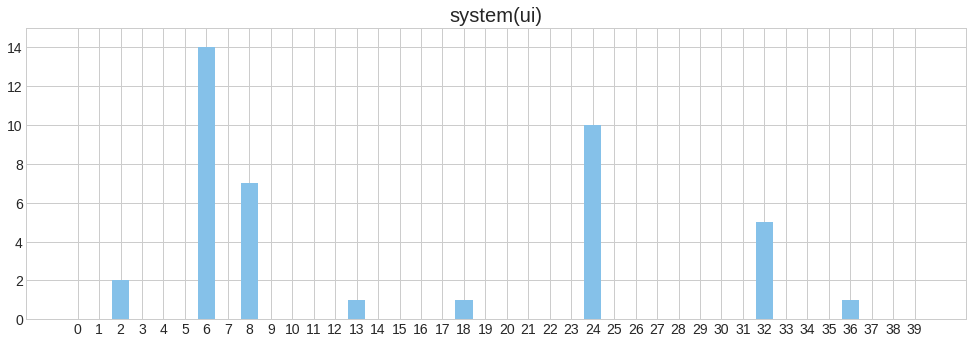

2.8938512401296648


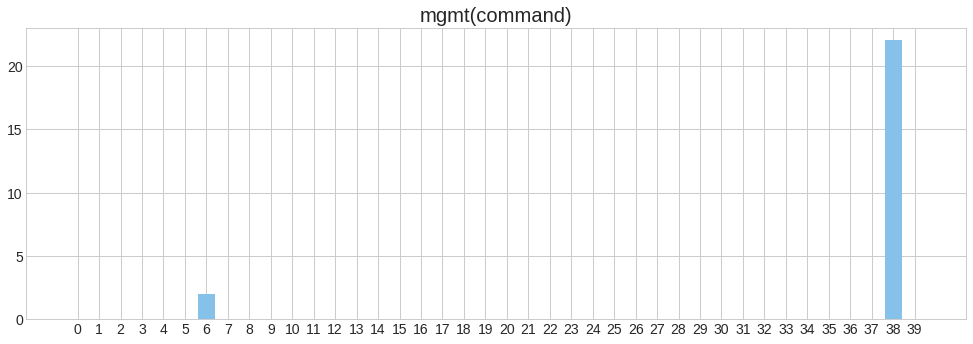

3.4409301068170506


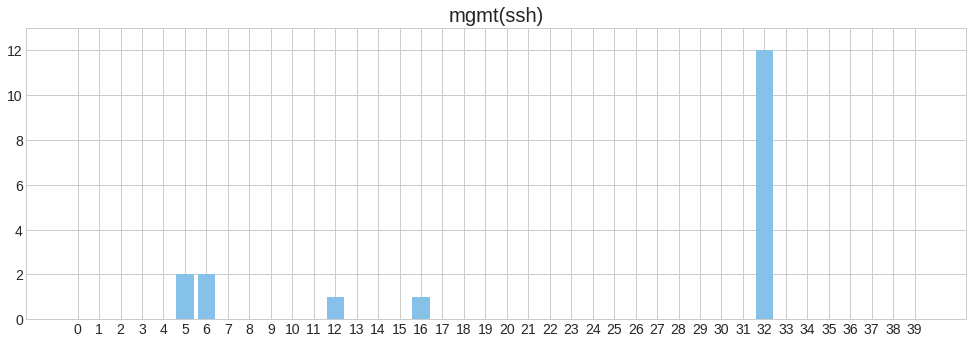

1.909842925478428


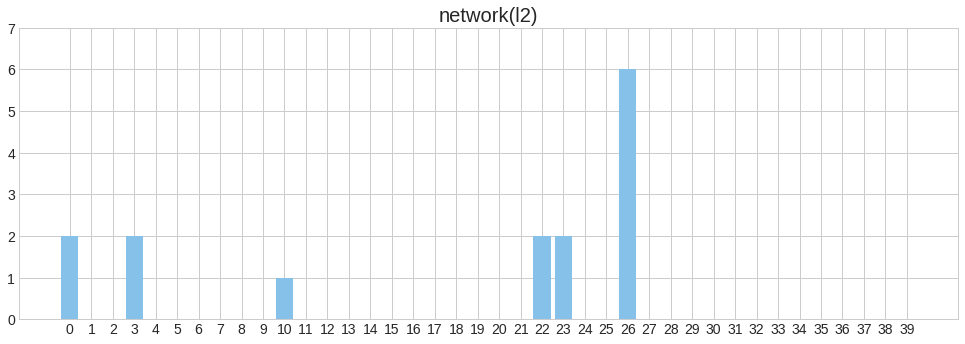

1.0882899429839459


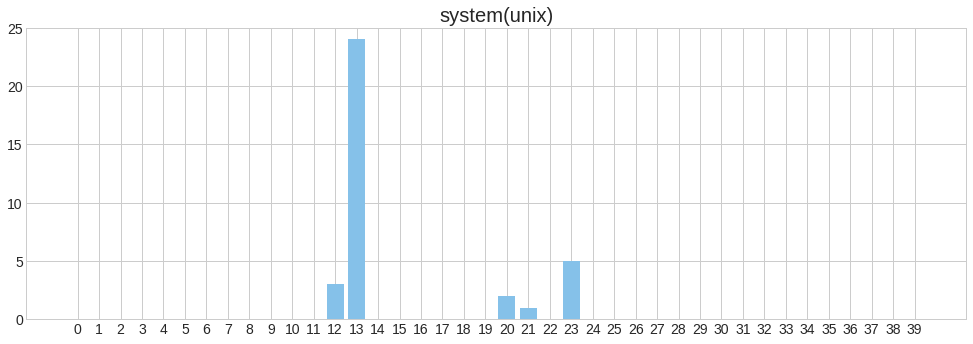

3.822221212855164


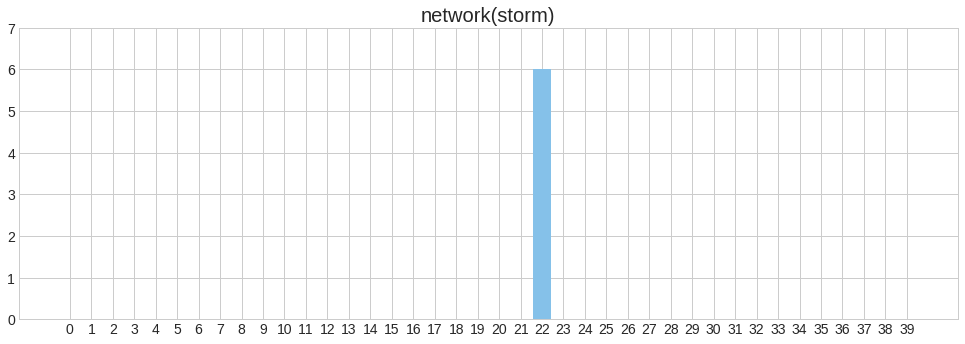

0.9367496997597597


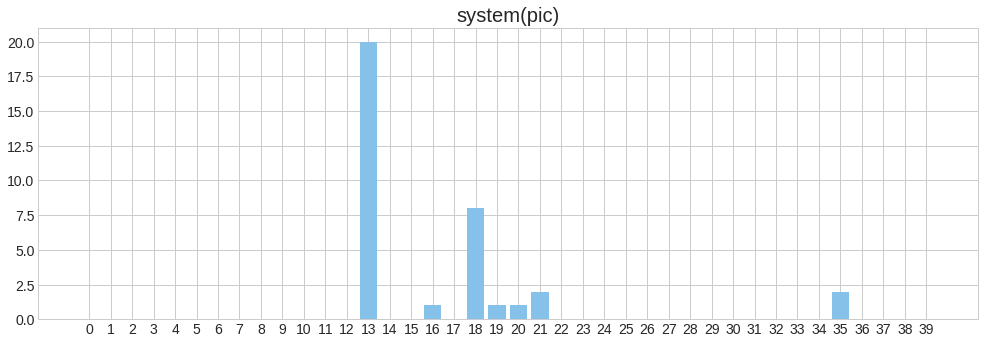

3.3330729064933458


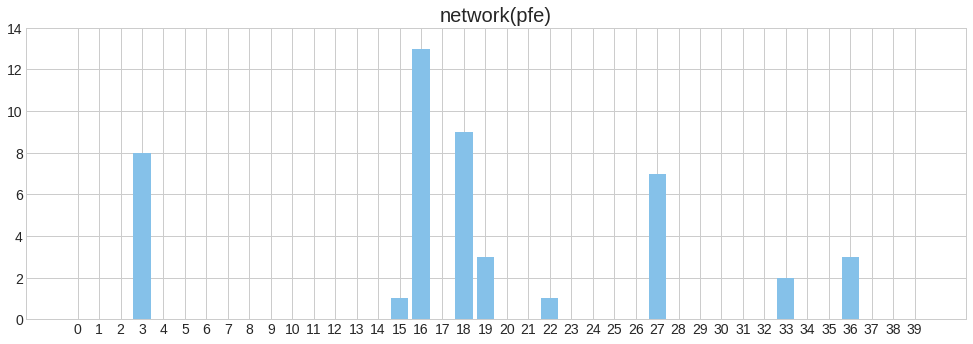

2.8799956597189516


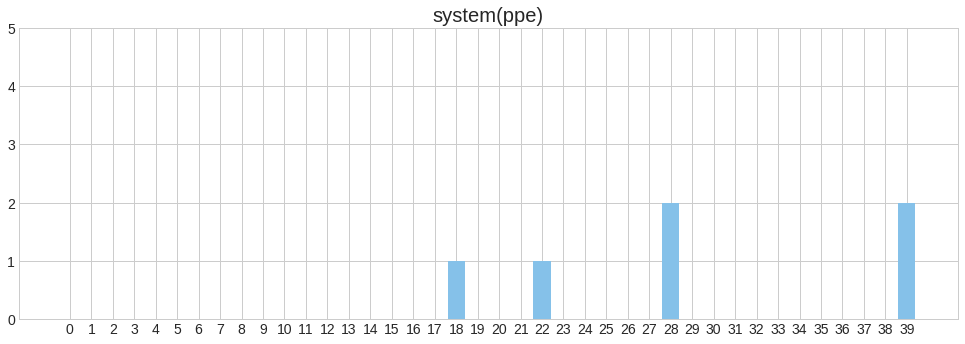

0.47696960070847283


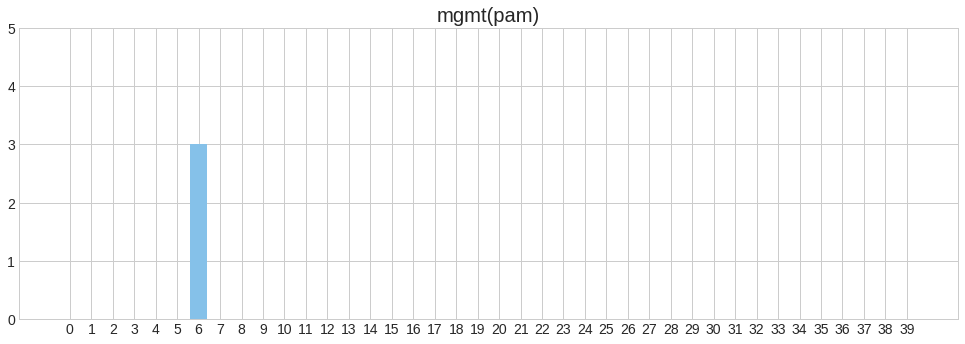

0.4683748498798799


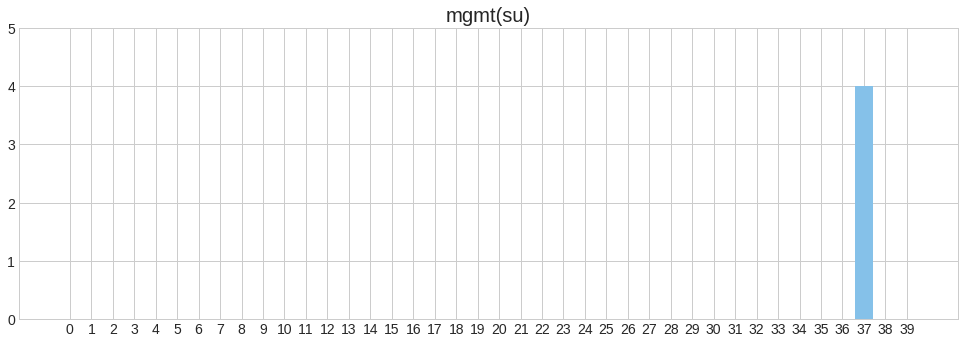

0.6244997998398398


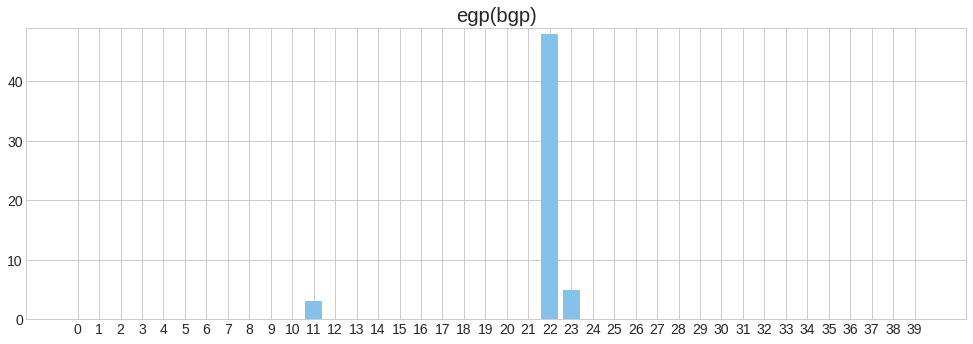

7.515982969645422


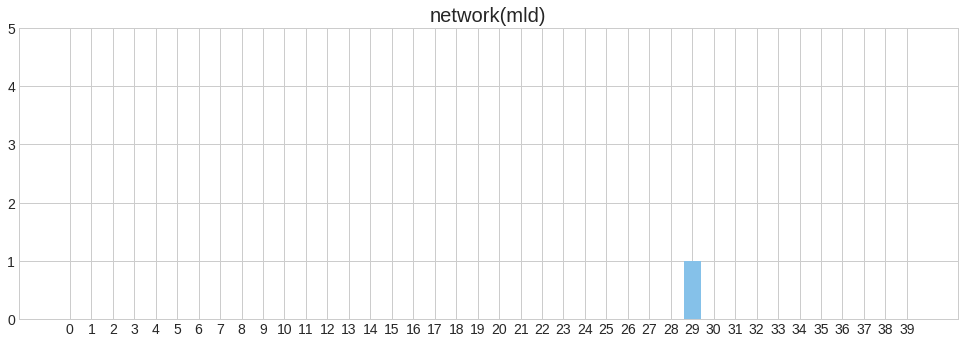

0.15612494995995996


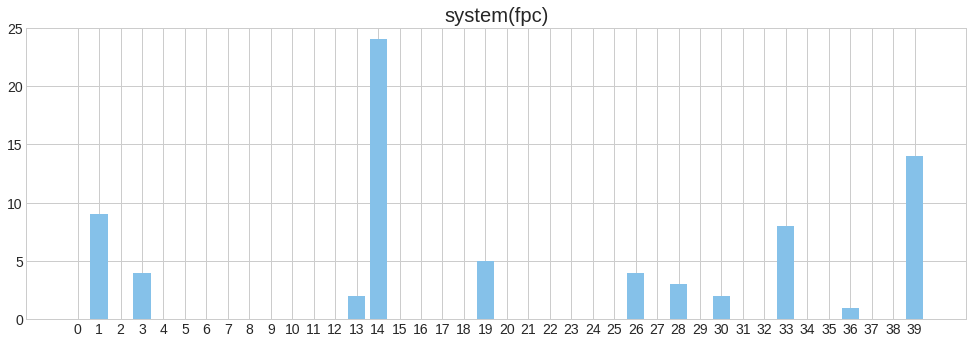

4.6032597145935625


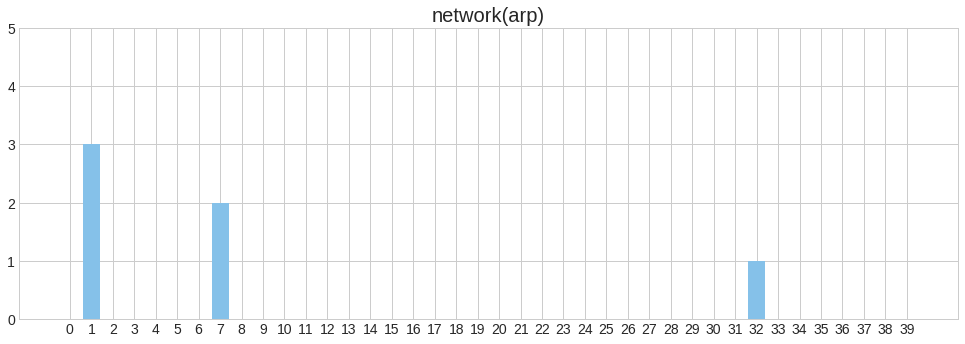

0.57227615711298


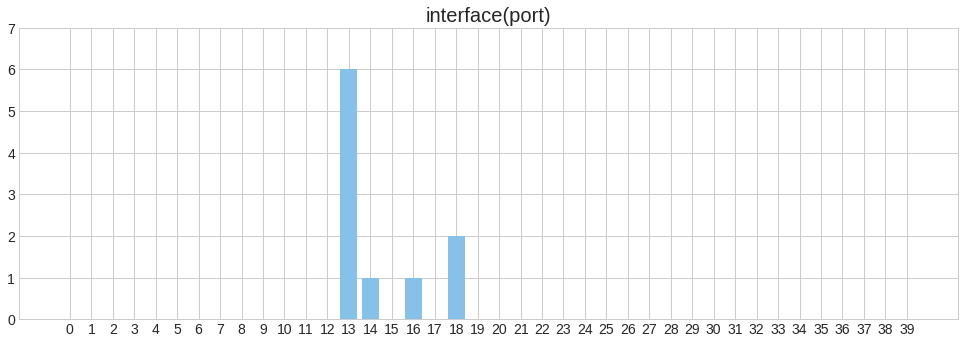

0.9937303457175896


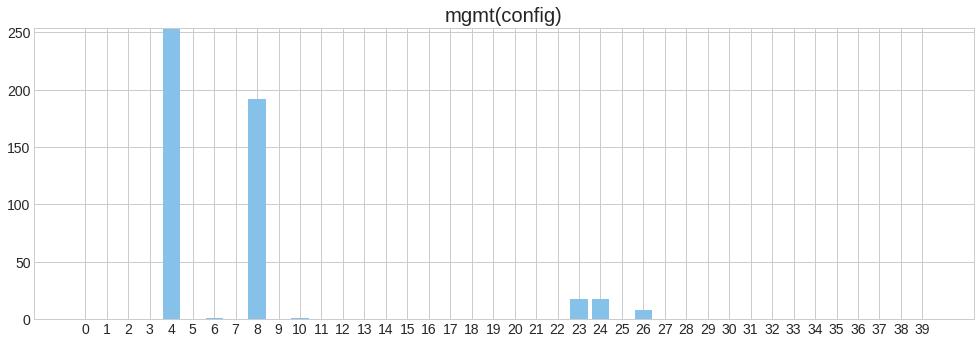

48.877391245851086


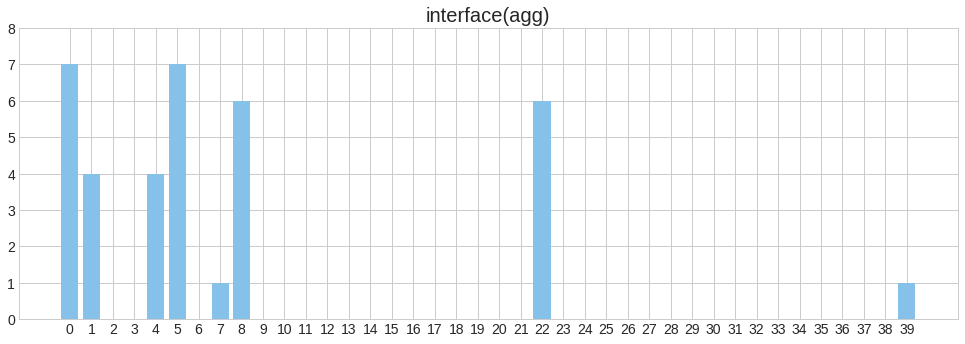

2.071231517720798


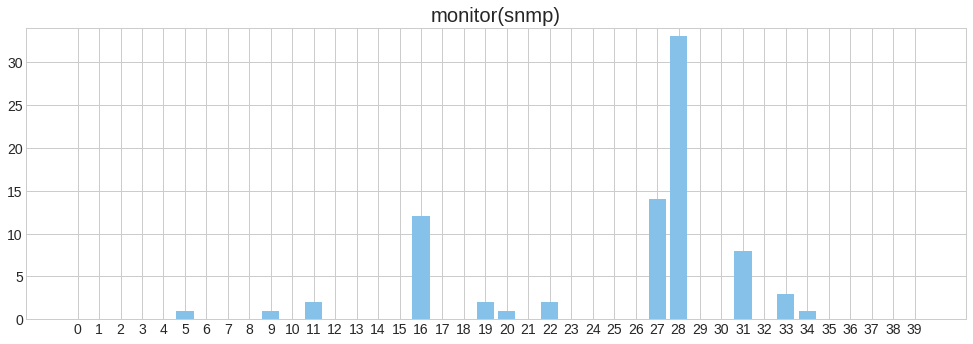

5.826662852782886


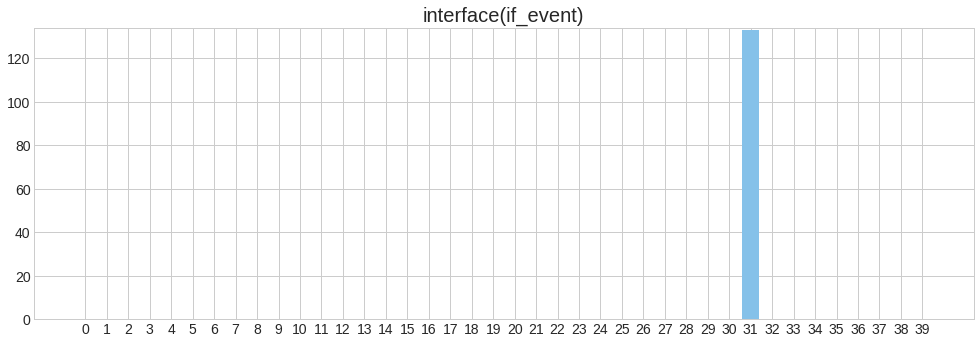

20.764618344674677


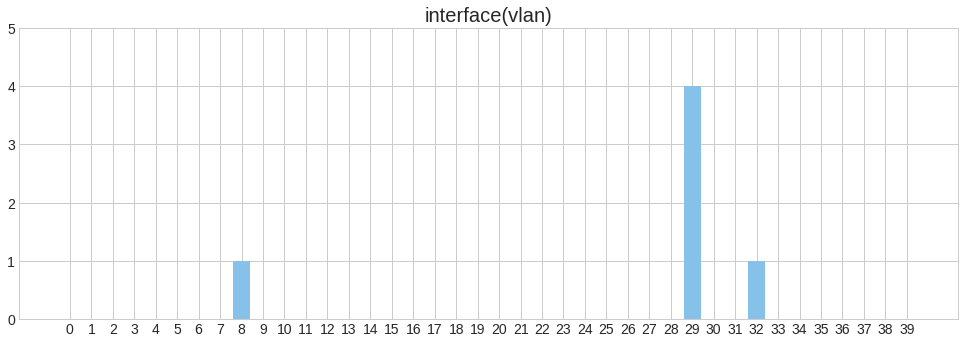

0.653834841531101


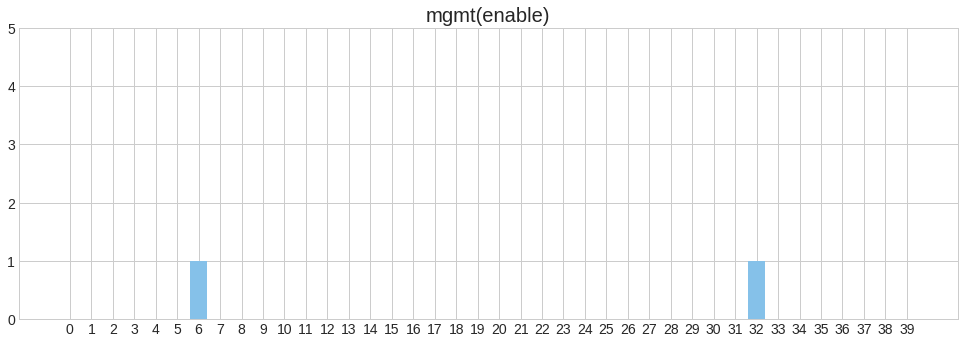

0.21794494717703367


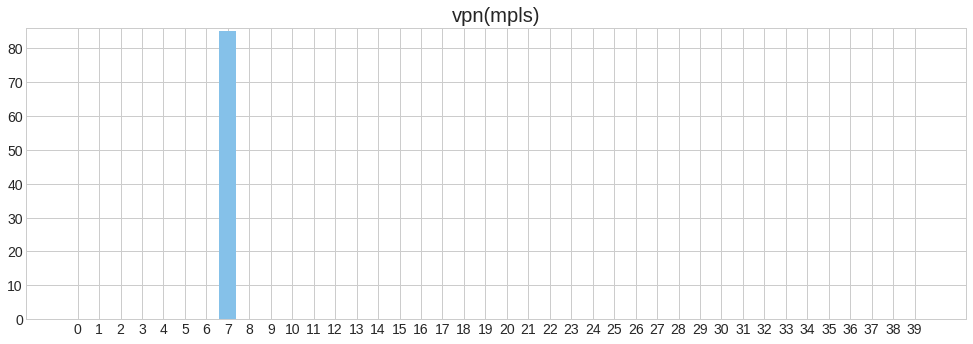

13.270620746596597


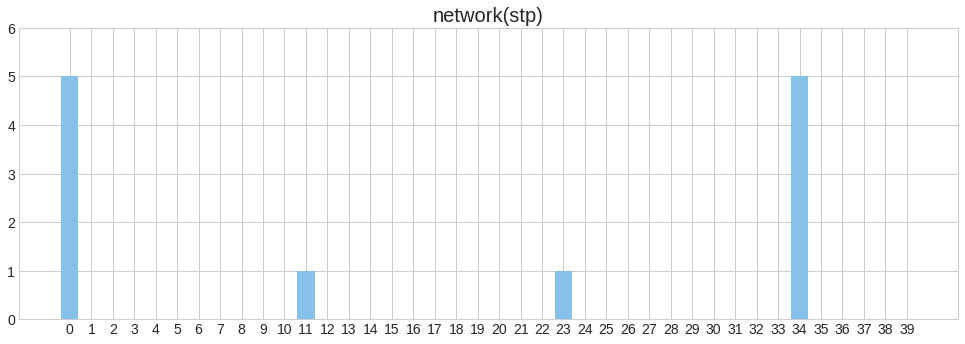

1.1


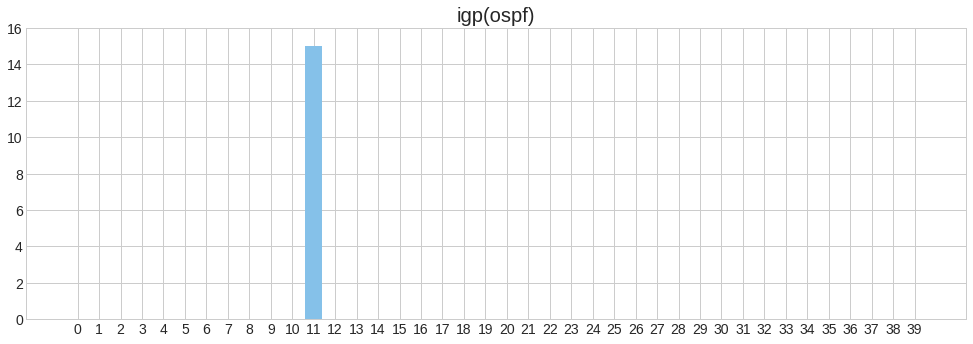

2.341874249399399


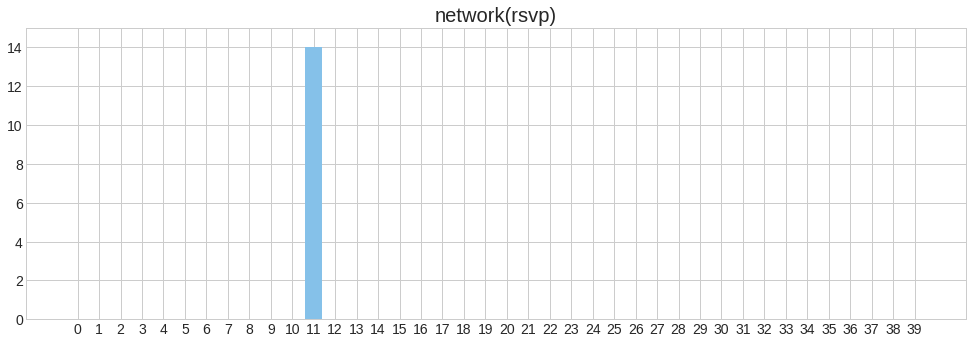

2.1857492994394394


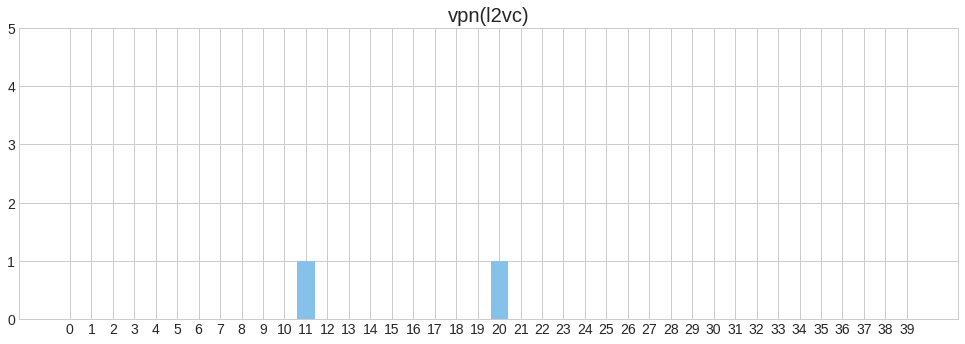

0.21794494717703364


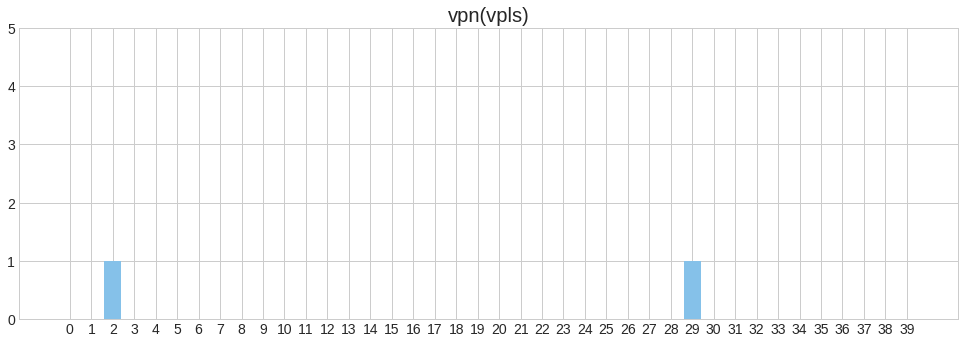

0.21794494717703364


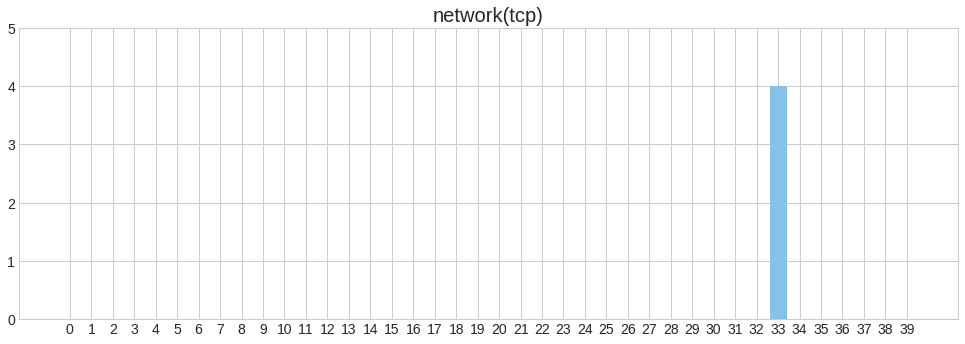

0.6244997998398398


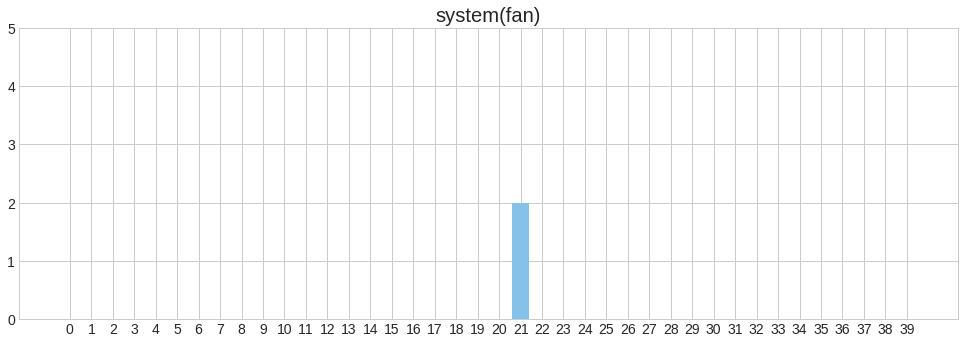

0.3122498999199199


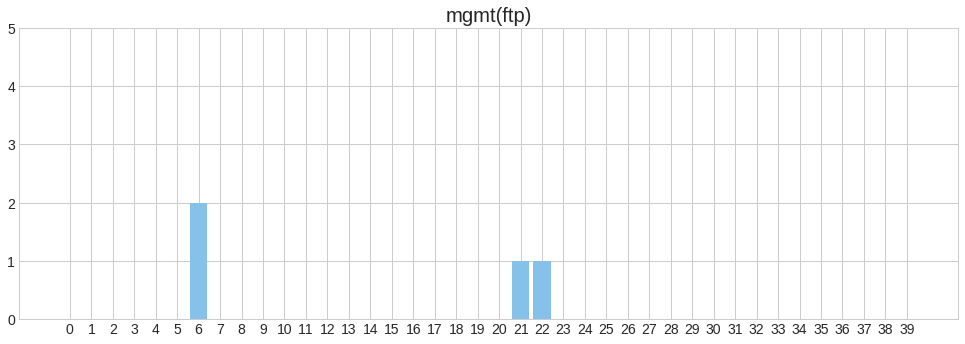

0.3741657386773941


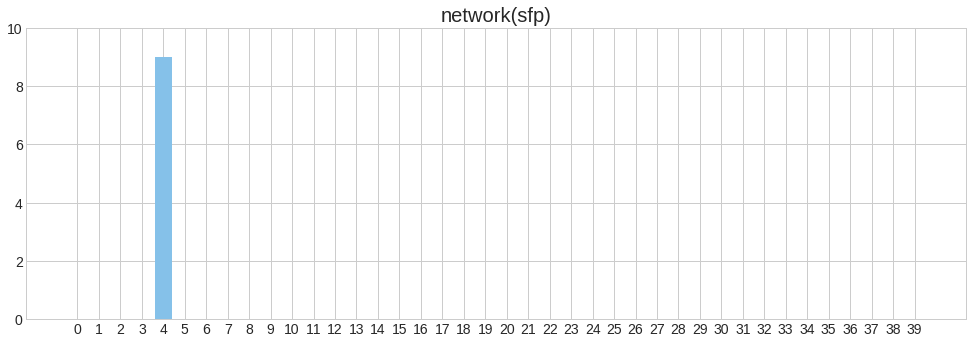

1.4051245496396394


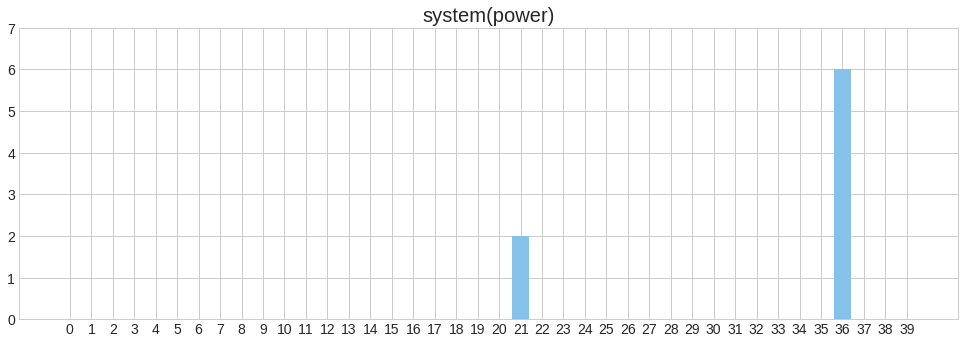

0.9797958971132711


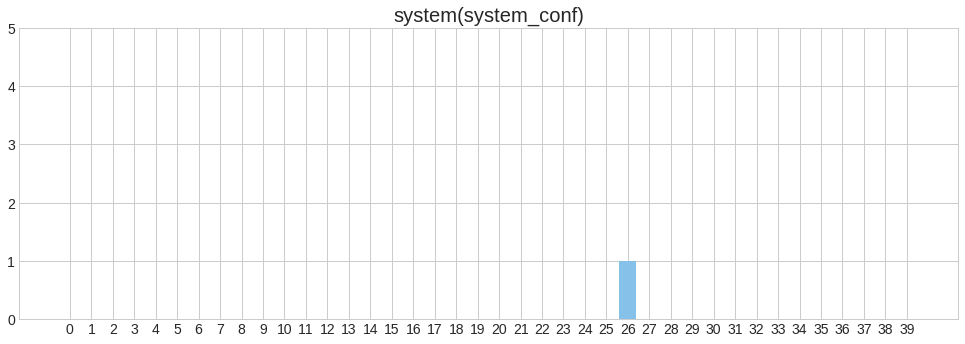

0.15612494995995996


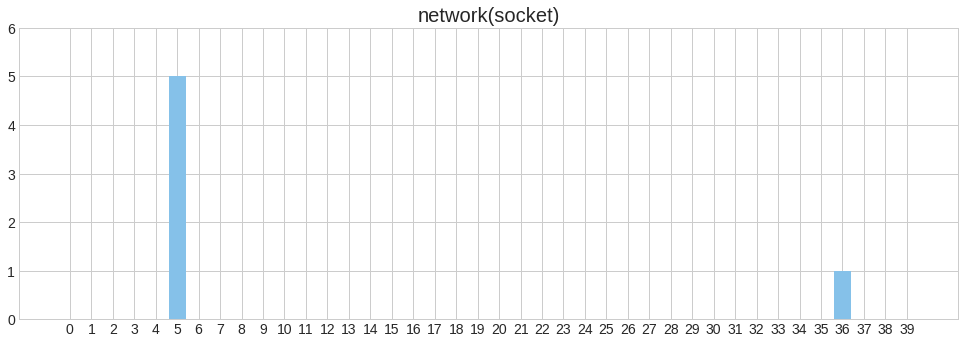

0.792148975887743


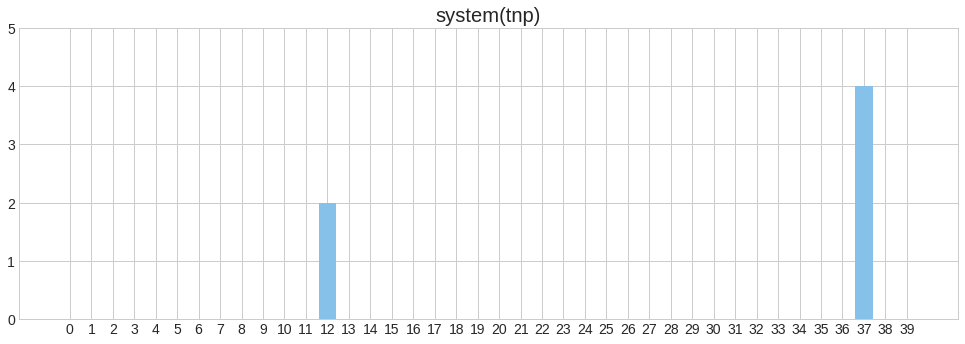

0.6910137480542627


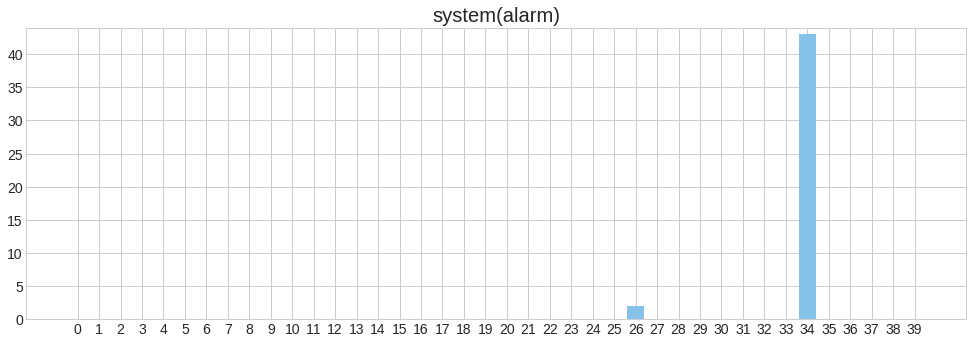

6.71262802484988


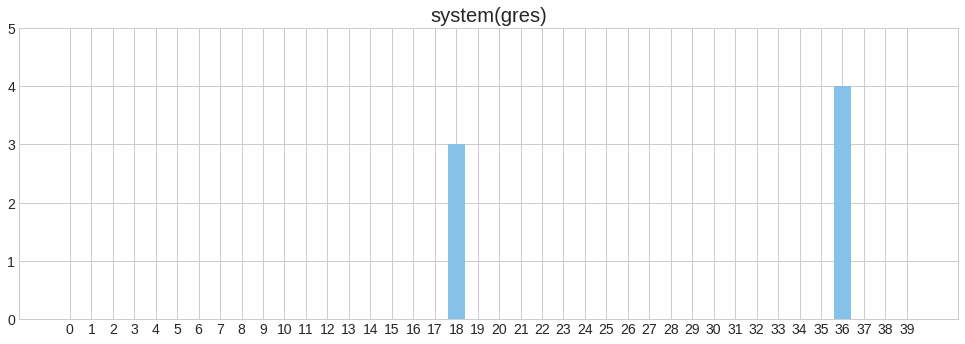

0.7709571972554637


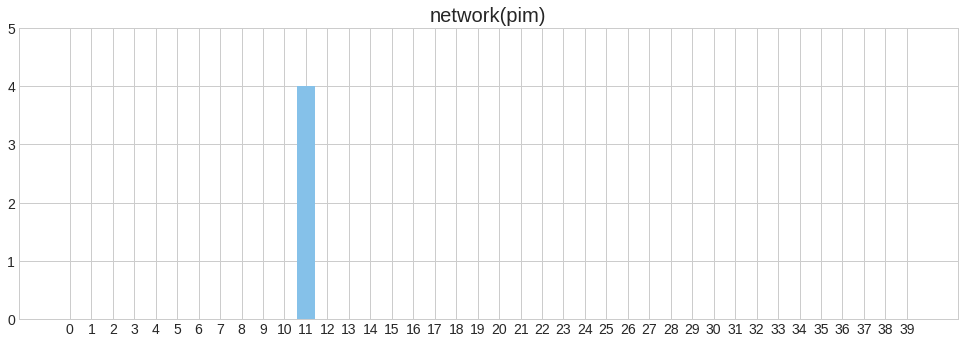

0.6244997998398398


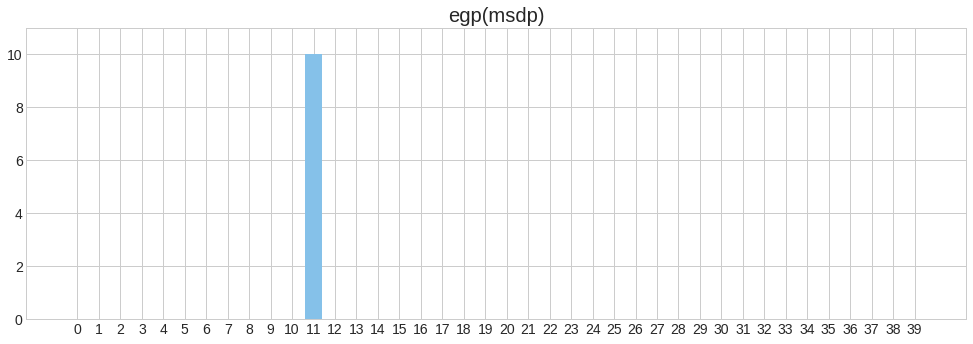

1.5612494995995996


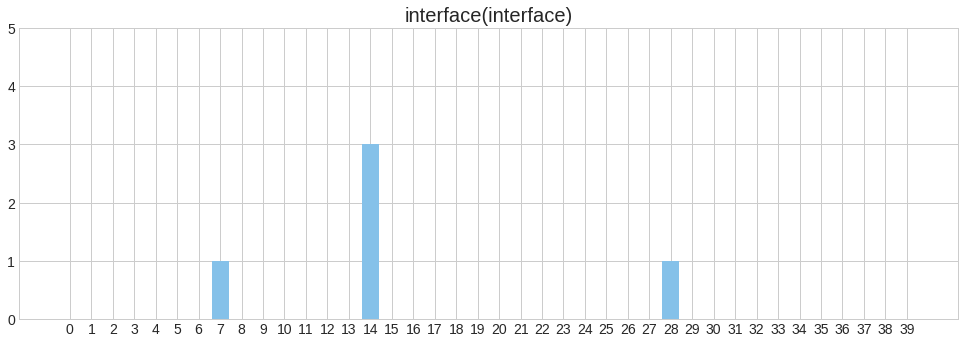

0.5092887196865841


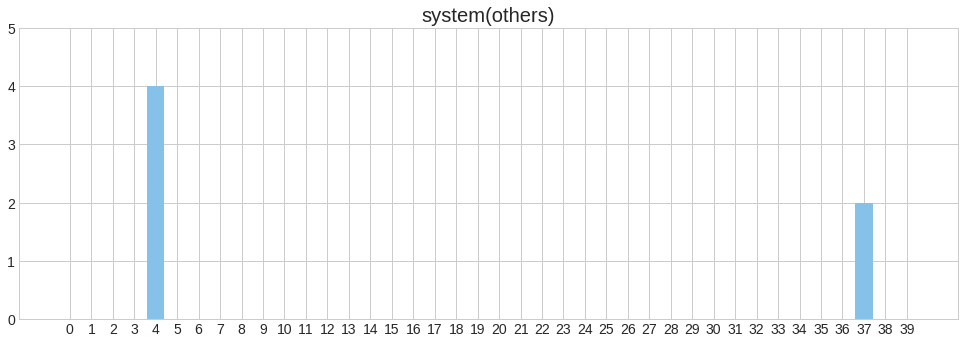

0.6910137480542627


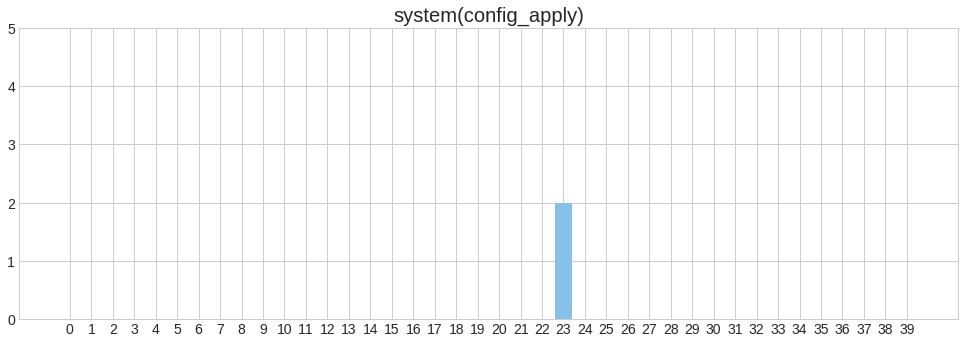

0.3122498999199199


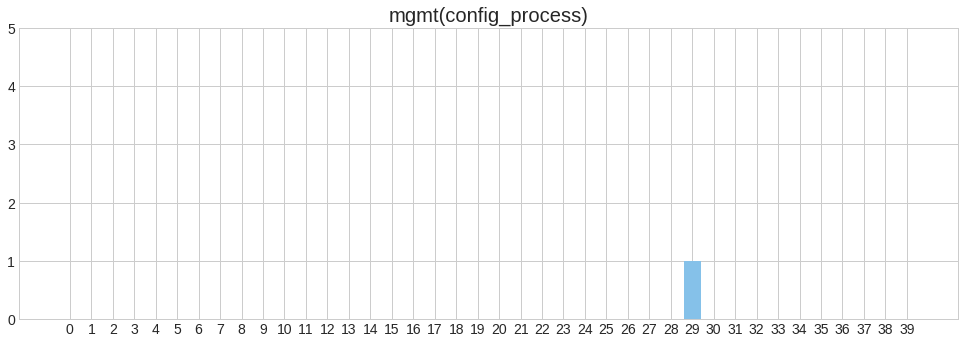

0.15612494995995996


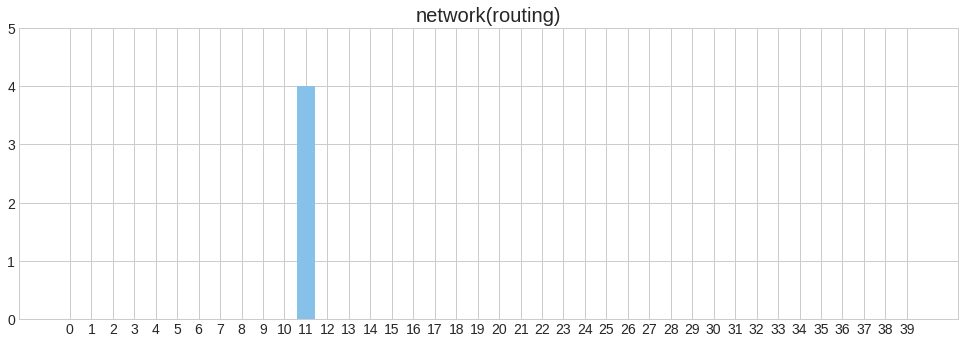

0.6244997998398398


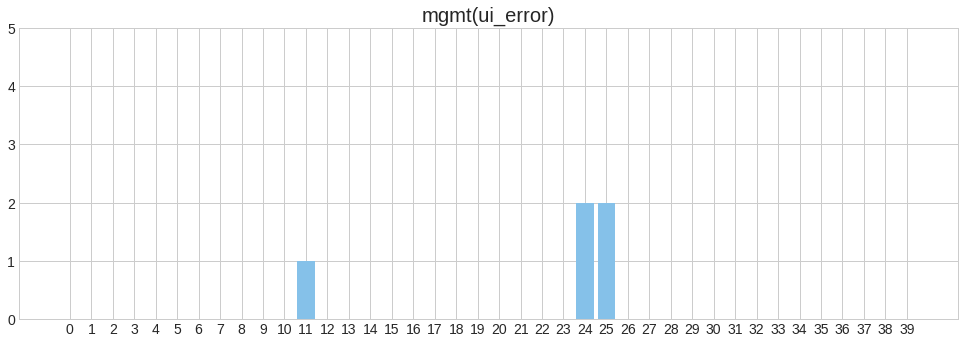

0.4575751304430782


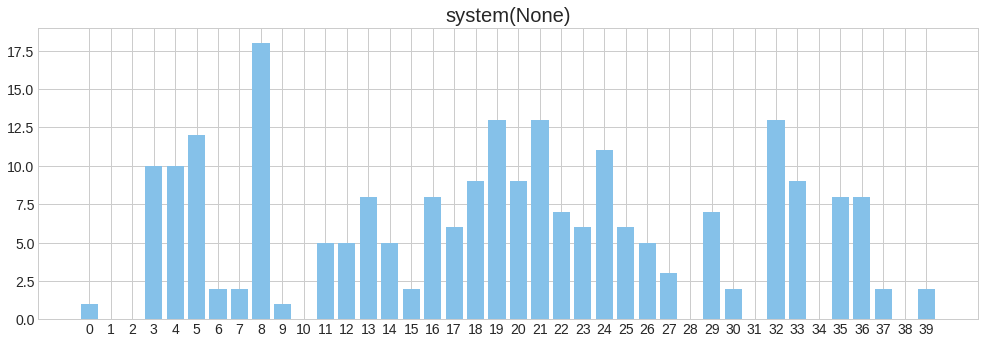

4.572745346069471


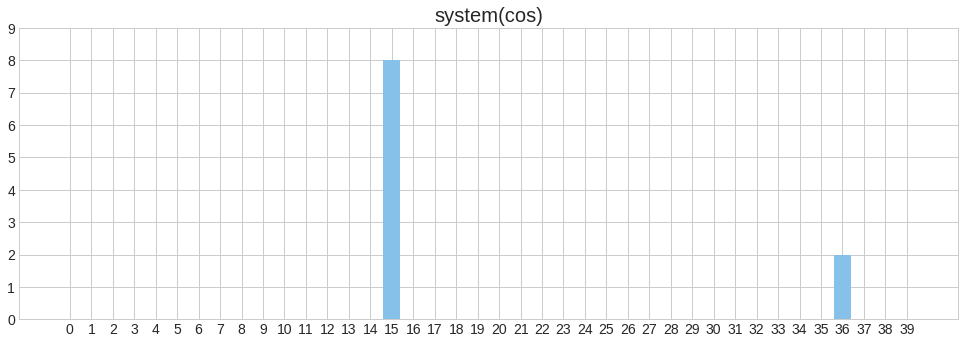

1.2796483892069728


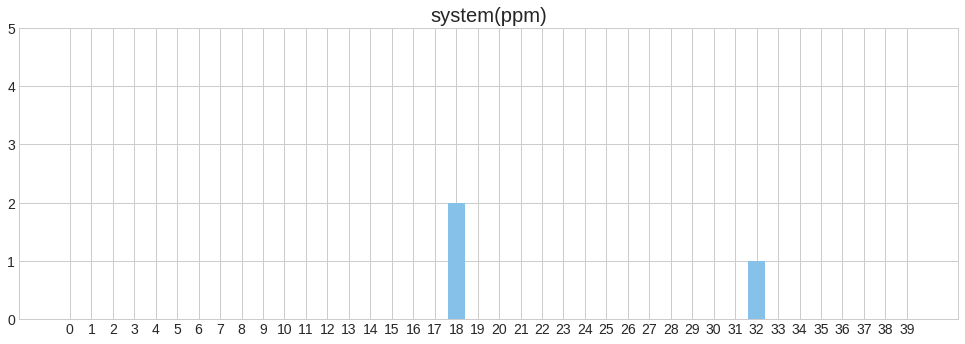

0.34550687402713137


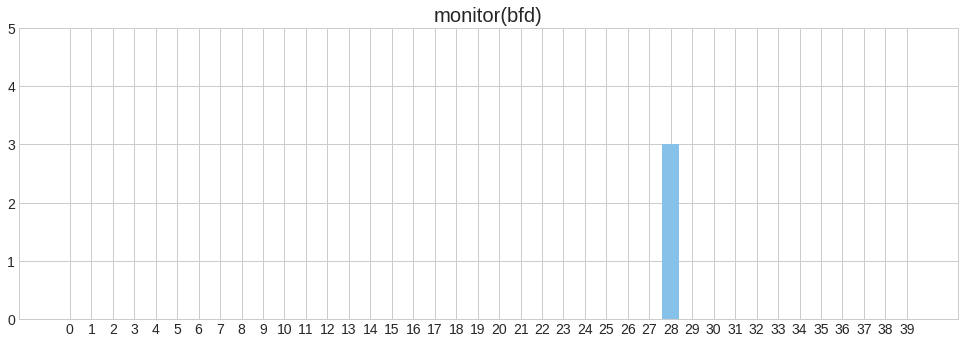

0.4683748498798799


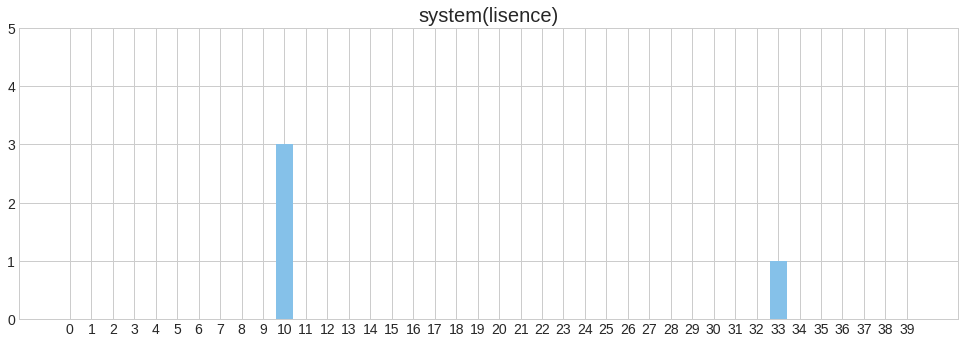

0.4898979485566356


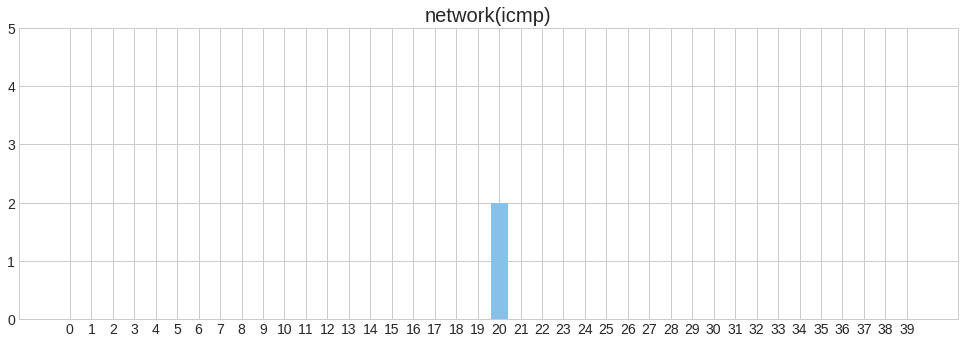

0.3122498999199199


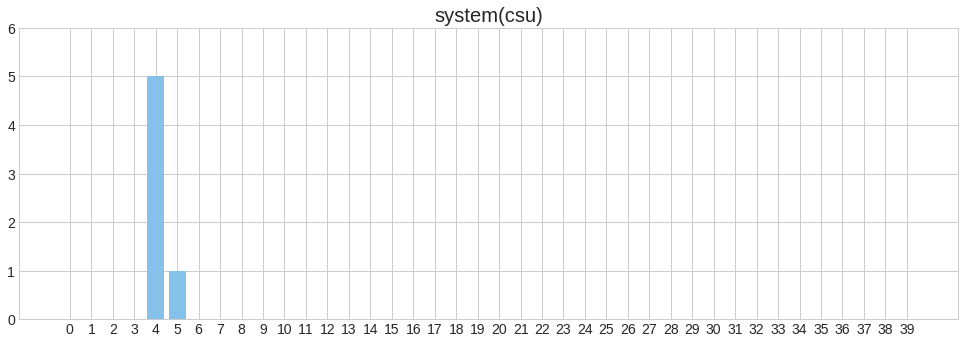

0.792148975887743


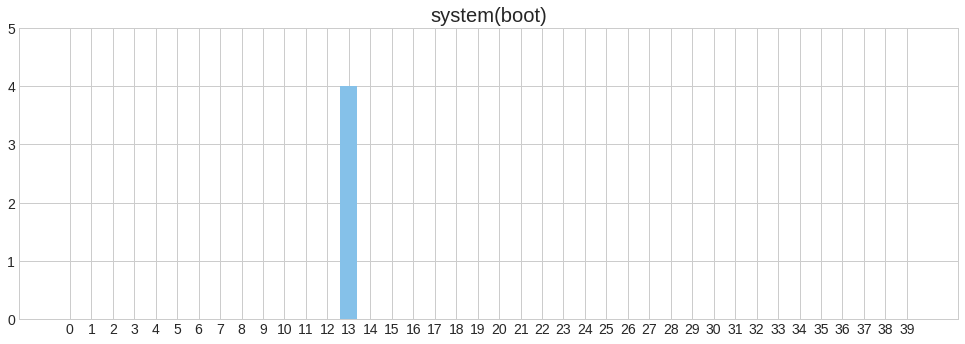

0.6244997998398398


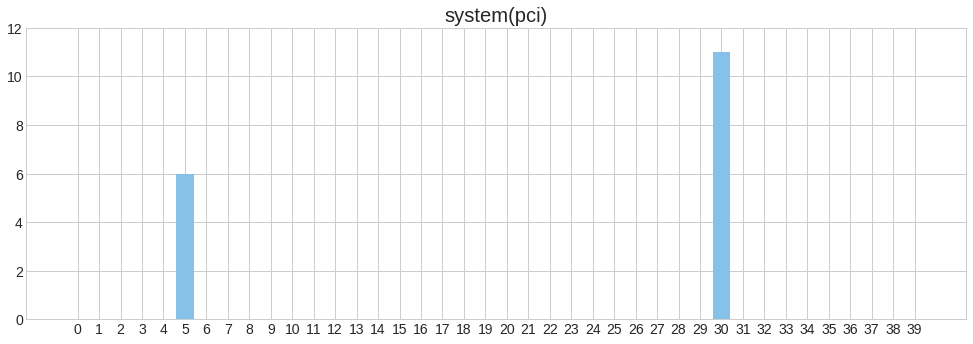

1.9350387593017355


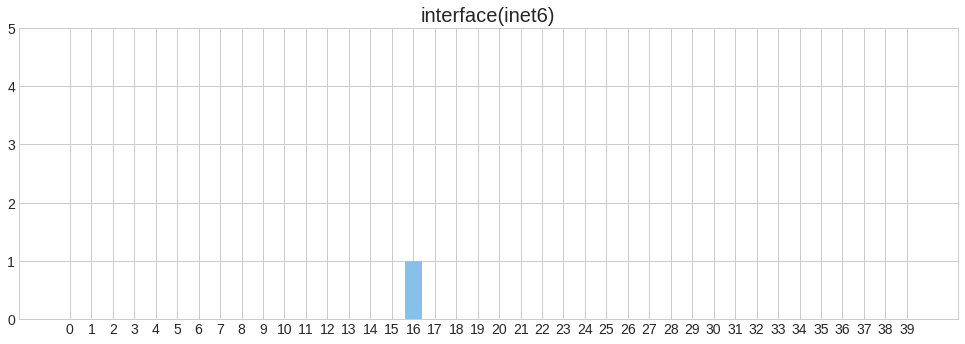

0.15612494995995996


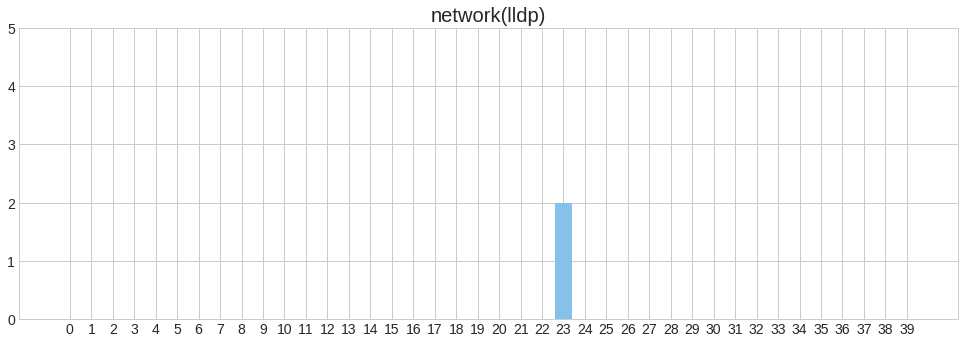

0.3122498999199199


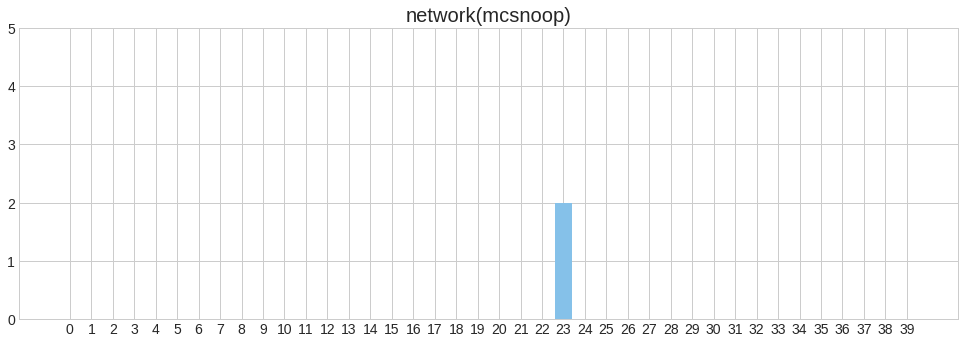

0.3122498999199199


In [354]:
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')
cvs = []

for cat, res in inf_per_cat.items():
    plt.figure(figsize=(15, 5))
    plt.title(cat)
    y = collections.Counter(res)
    y = [y[i] if i in y else 0 for i in range(40)]
    plt.bar(np.arange(40), y, color="#85C1E9")
    plt.xticks(np.arange(40))
    minY = 5 if max(y) < 5 else max(y)+1
    plt.ylim(0, minY)
    plt.show()

    print(np.array(y).std())
    cvs.append((cat, np.array(y).std()/np.array(y).mean()))

- ppe, snmp, l2, ui, pfe, fpc, agg, None

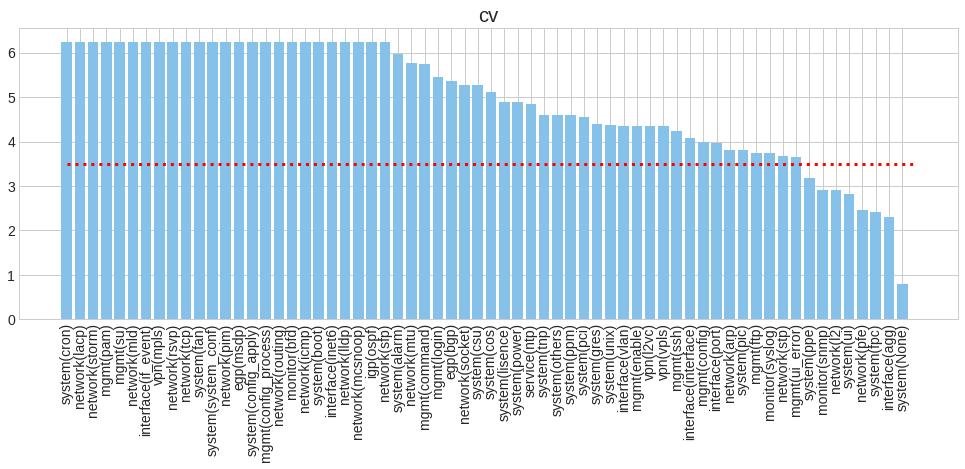

In [422]:
sorted_t = sorted(cvs, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(15, 5))
plt.title('cv')
plt.bar(np.arange(len(sorted_t)), [i[1] for i in sorted_t], color="#85C1E9")
plt.xticks(np.arange(len(sorted_t)), [i[0] for i in sorted_t],rotation=90)
plt.hlines(3.5, xmin=0, xmax=len(sorted_t), color='red',linestyles='dotted', lw=3)
plt.show()


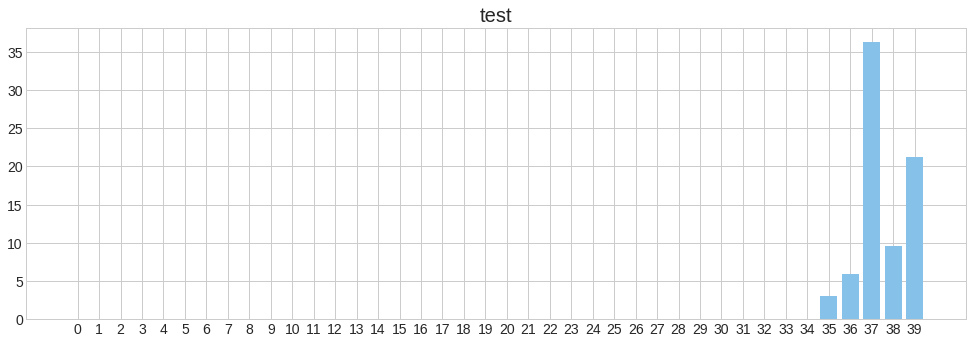

3.4871465802803425


In [443]:
t = np.random.random(40)*50
t[:35] = 0
t.std()/t.mean()

plt.figure(figsize=(15, 5))
plt.title('test')
plt.bar(np.arange(40), t, color="#85C1E9")
plt.xticks(np.arange(40))
plt.show()

print(t.std()/t.mean())

In [329]:
cat_per_inf

{0: ['monitor(syslog)',
  'network(l2)',
  'network(l2)',
  'interface(agg)',
  'interface(agg)',
  'interface(agg)',
  'interface(agg)',
  'interface(agg)',
  'interface(agg)',
  'interface(agg)',
  'network(stp)',
  'network(stp)',
  'network(stp)',
  'network(stp)',
  'network(stp)',
  'system(None)'],
 1: ['system(fpc)',
  'system(fpc)',
  'system(fpc)',
  'system(fpc)',
  'system(fpc)',
  'system(fpc)',
  'system(fpc)',
  'system(fpc)',
  'system(fpc)',
  'network(arp)',
  'network(arp)',
  'network(arp)',
  'interface(agg)',
  'interface(agg)',
  'interface(agg)',
  'interface(agg)'],
 2: ['service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  'service(ntp)',
  '

In [342]:
y = collections.Counter(res)
y = [y[i] if i in y else 0 for i in inf_per_cat.keys()]
y = np.array(y) / total_per_cat

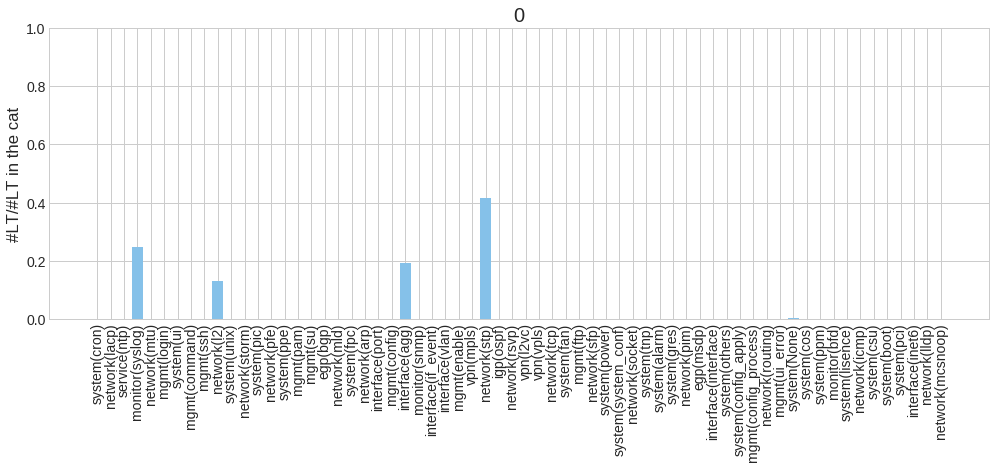

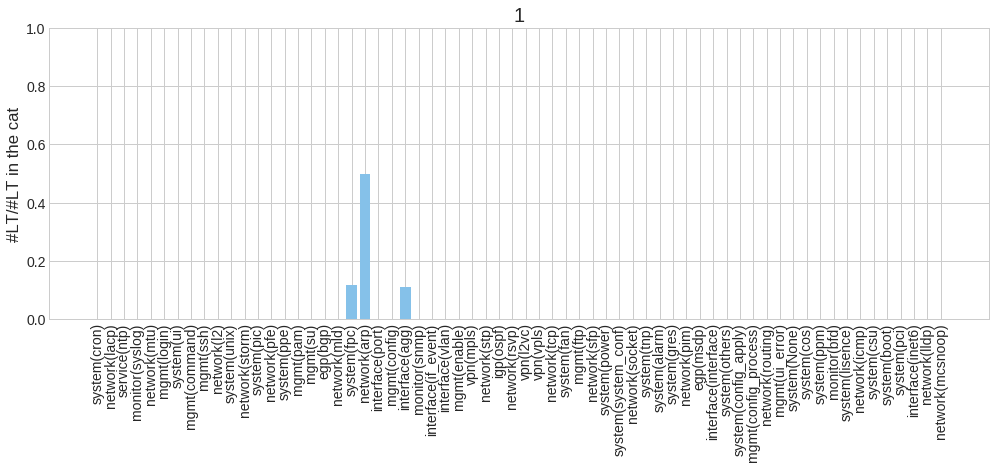

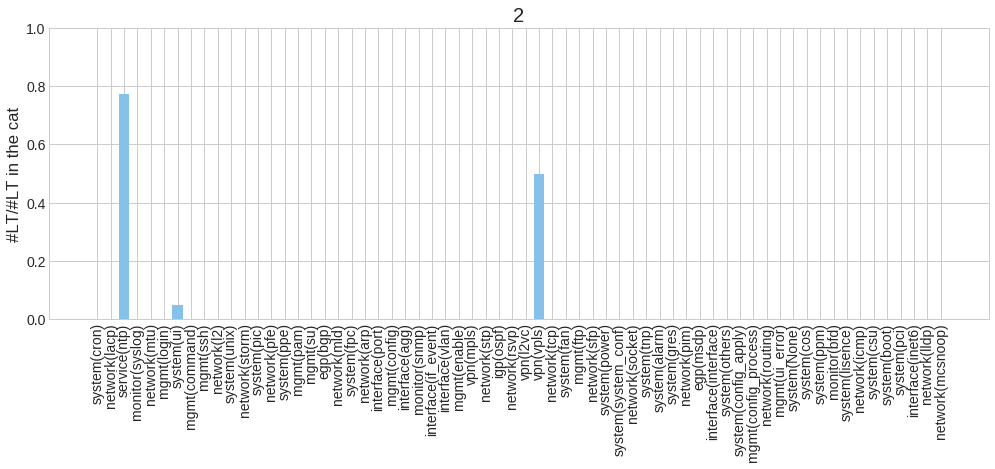

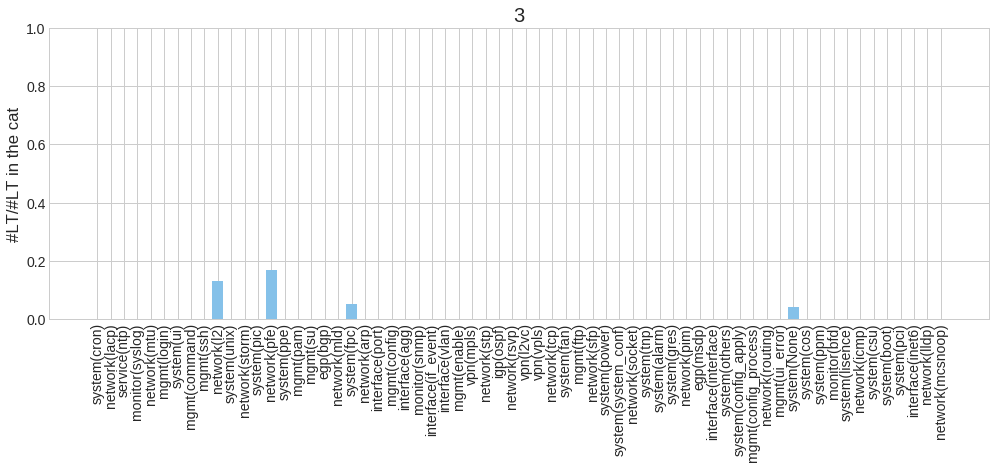

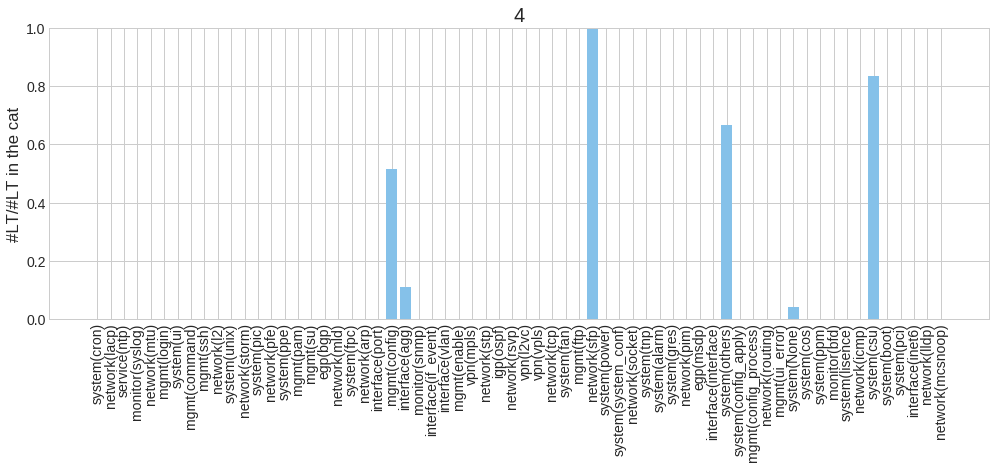

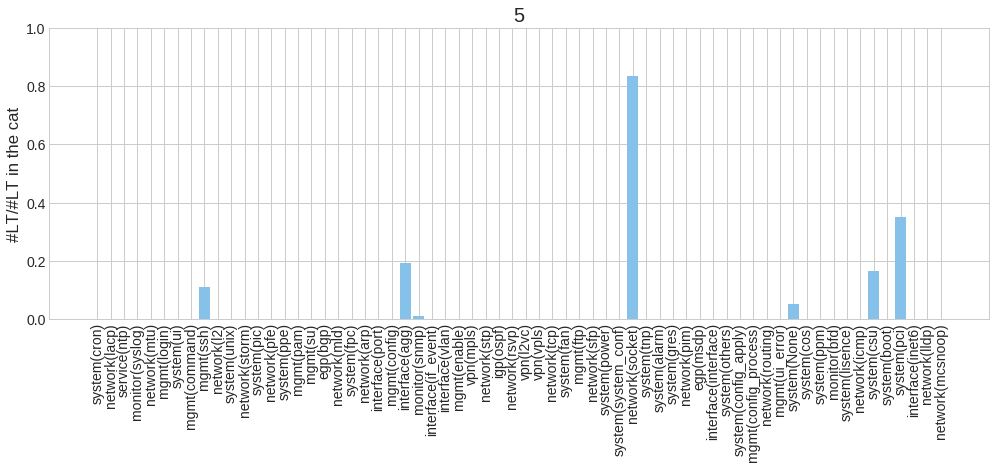

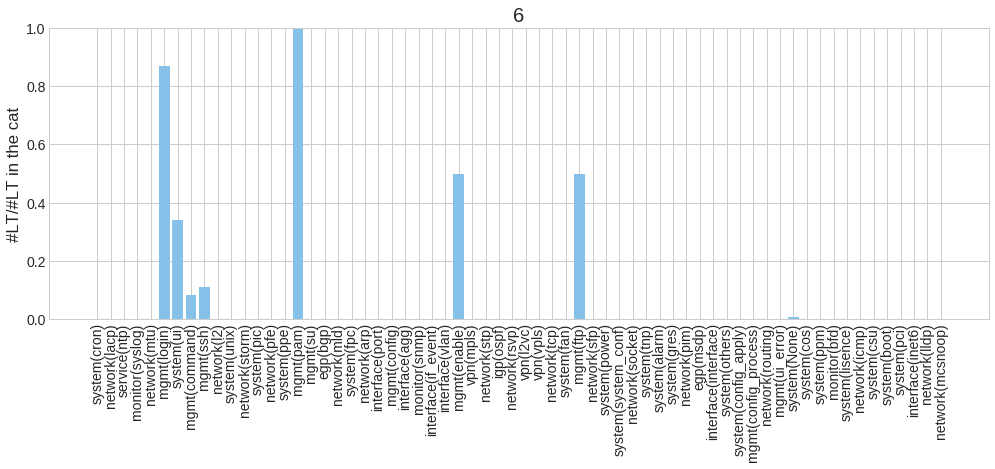

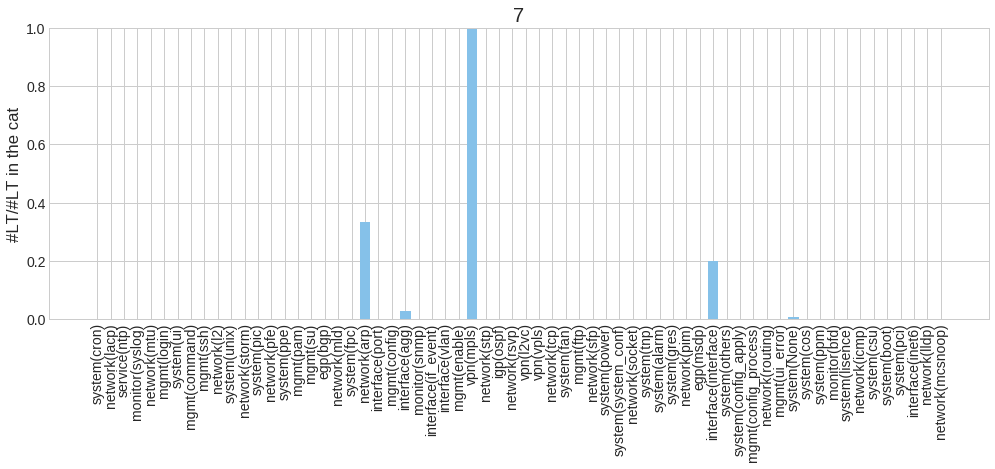

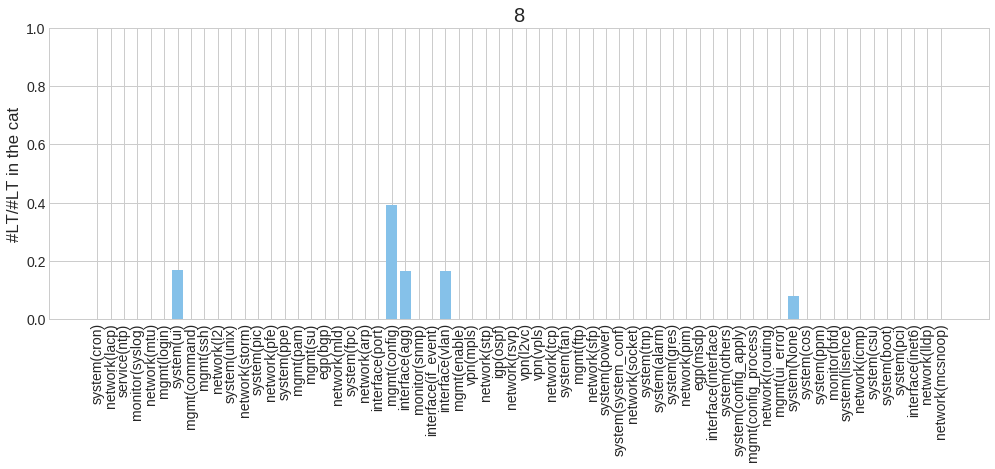

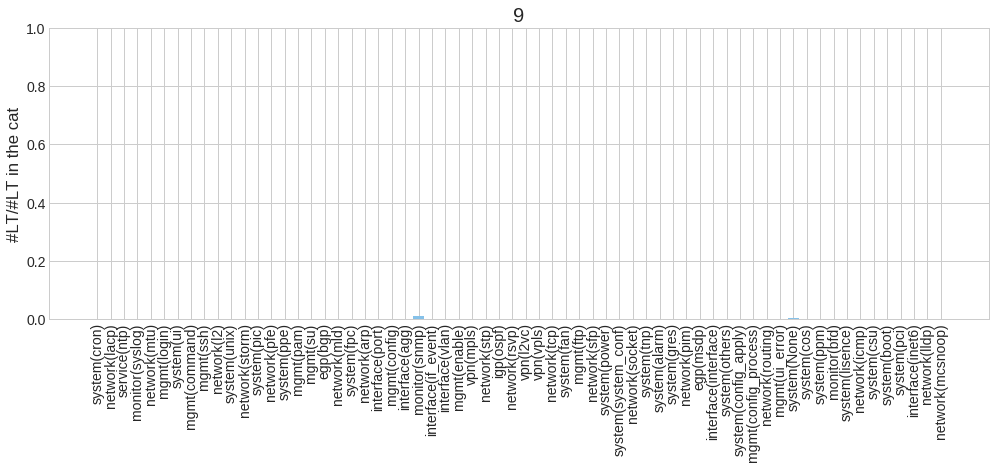

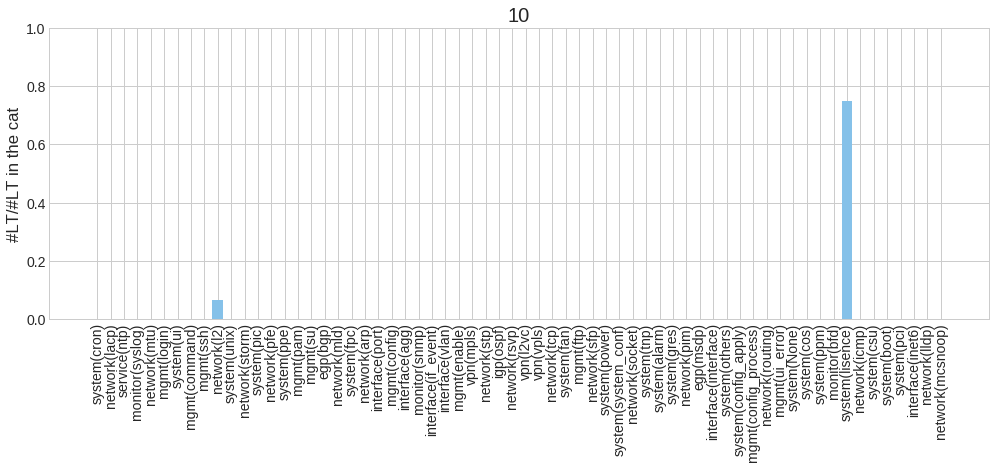

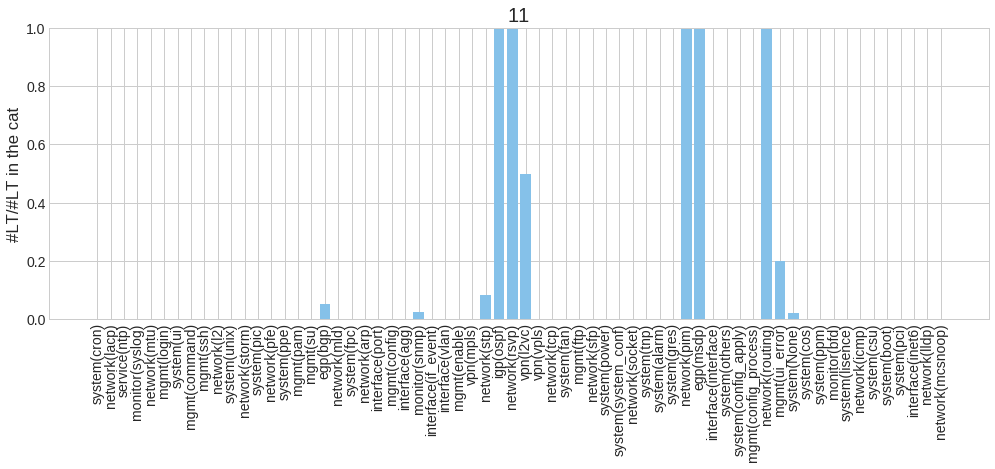

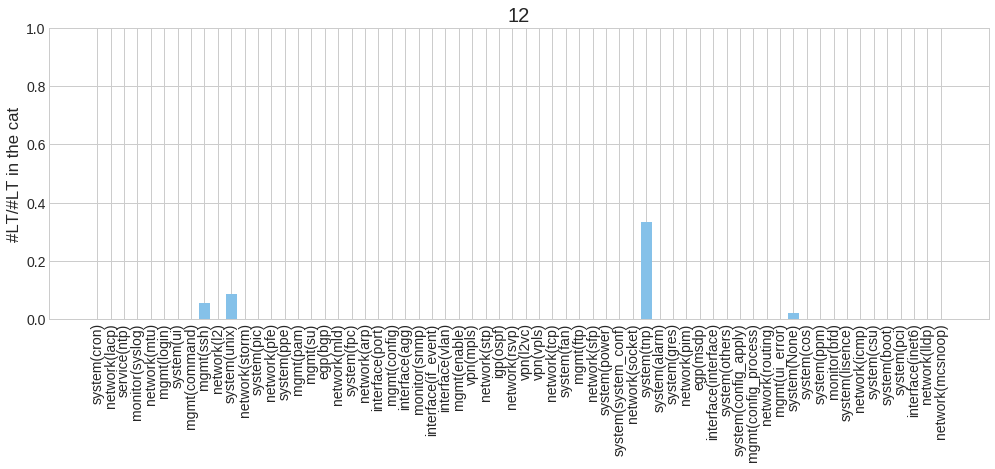

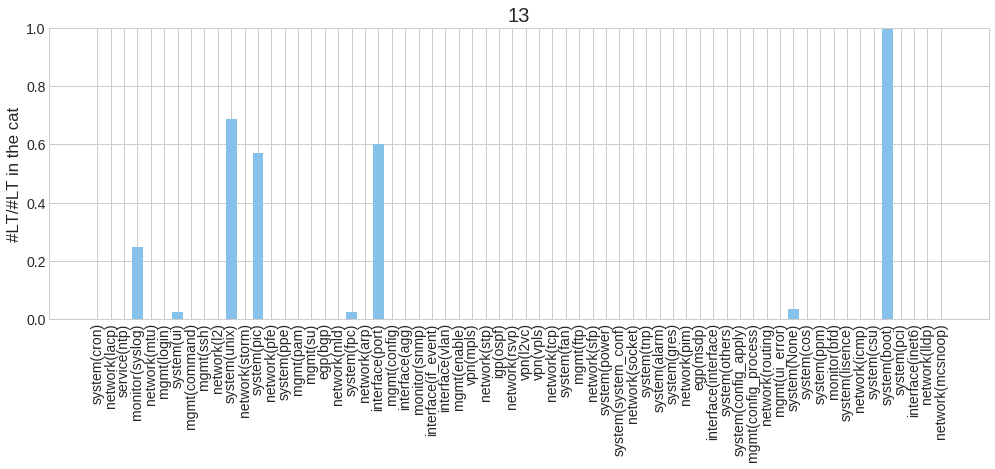

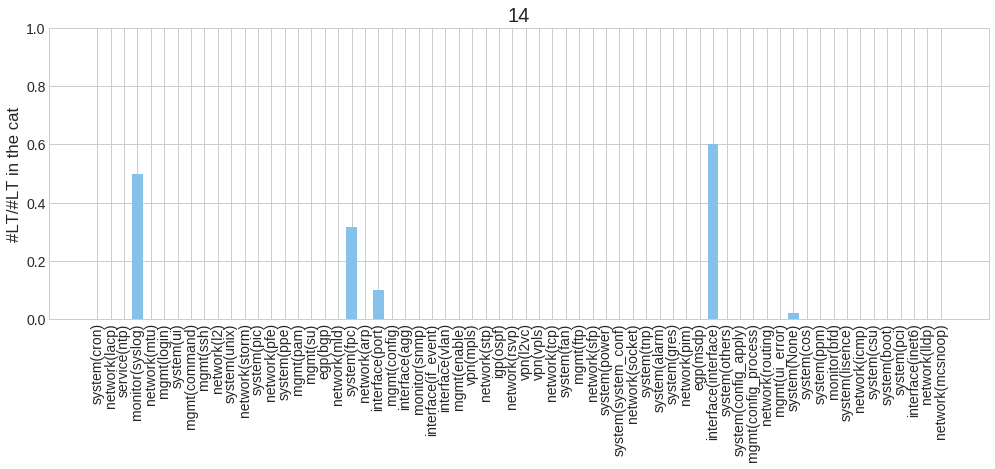

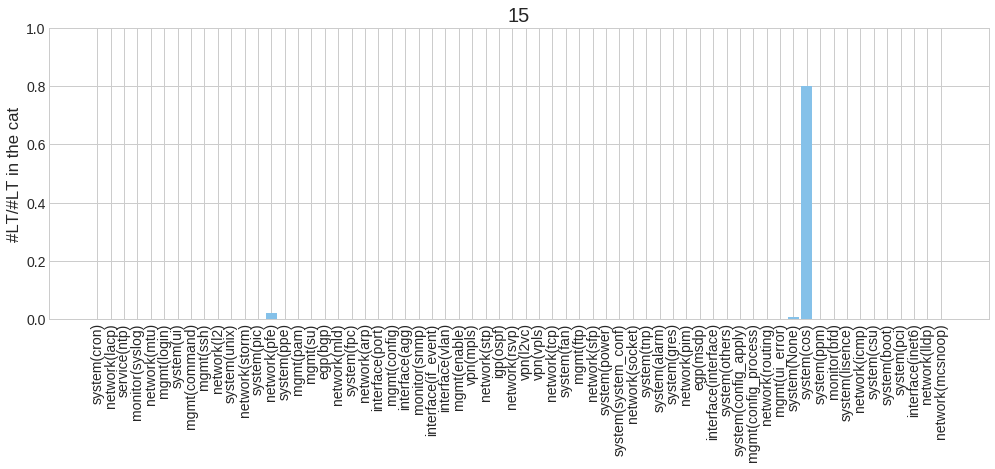

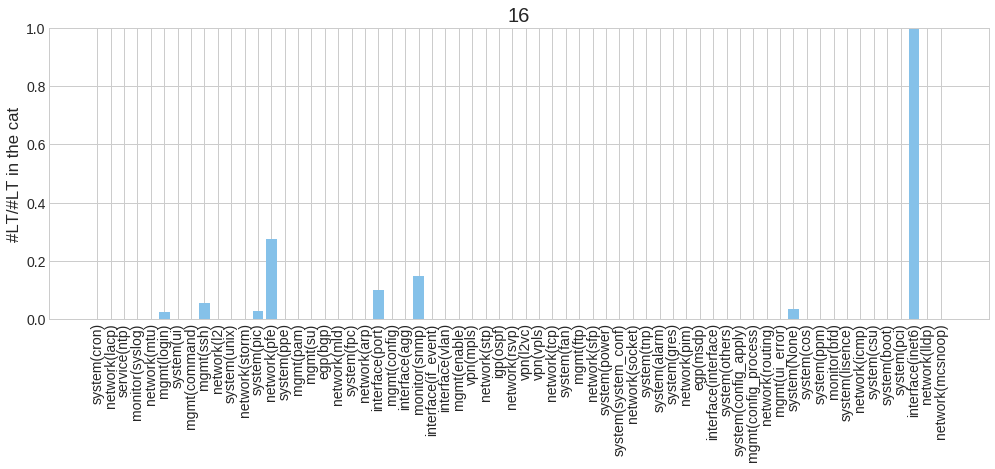

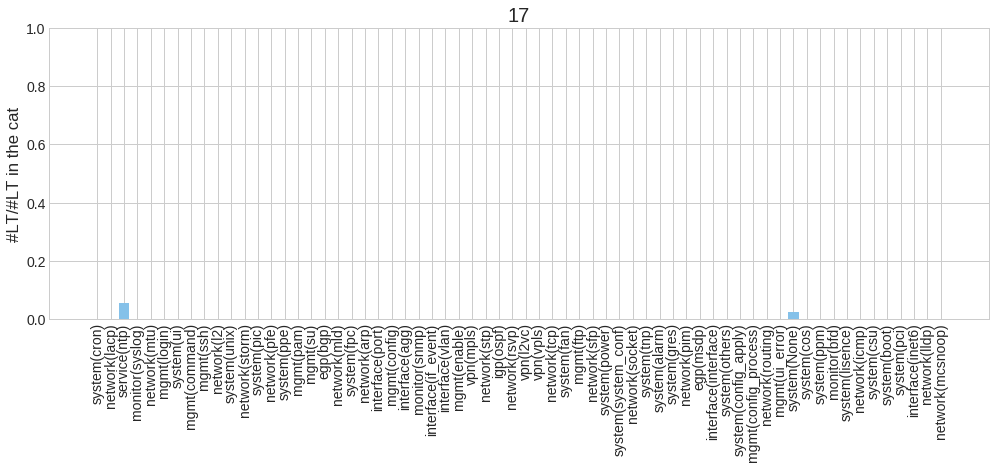

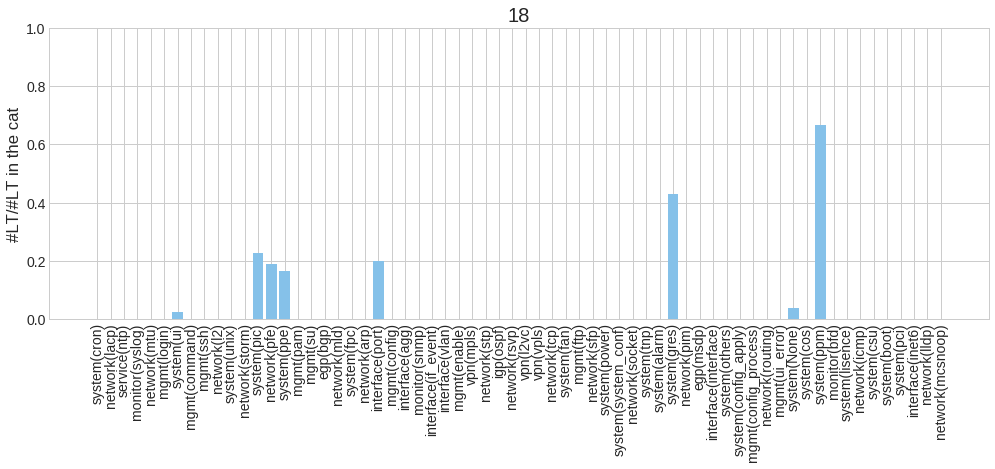

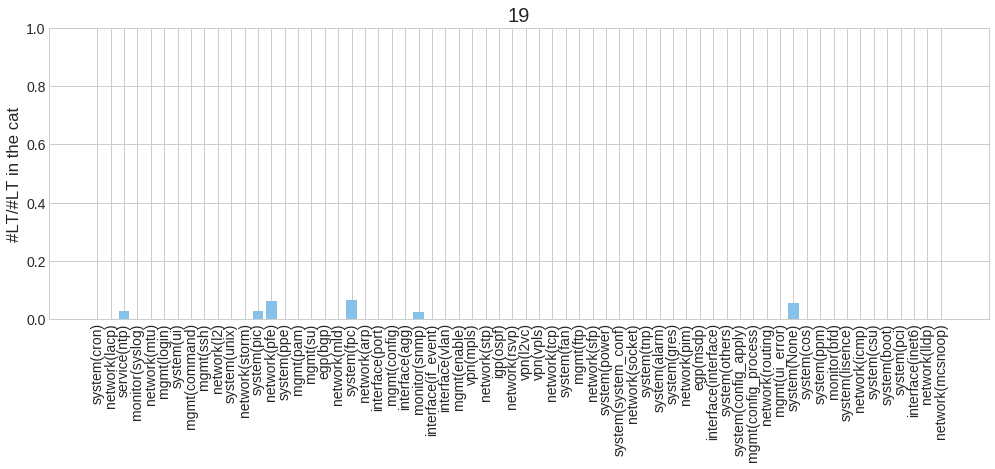

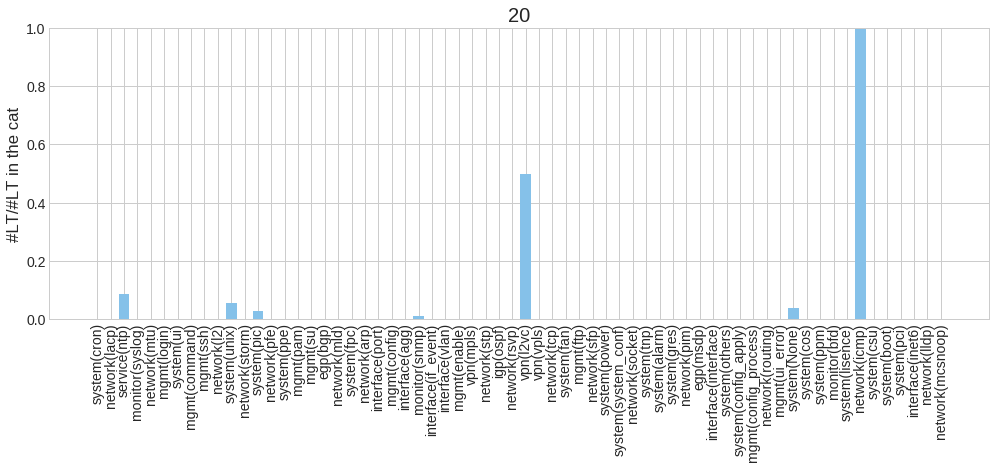

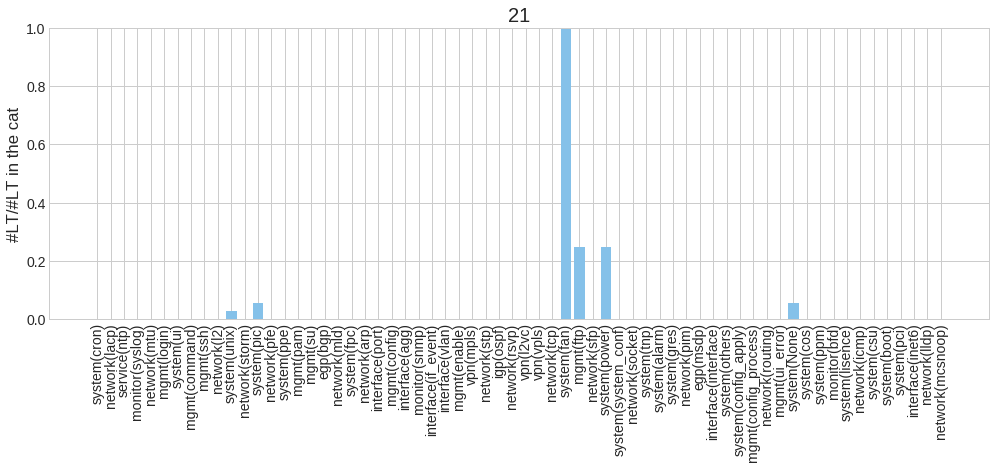

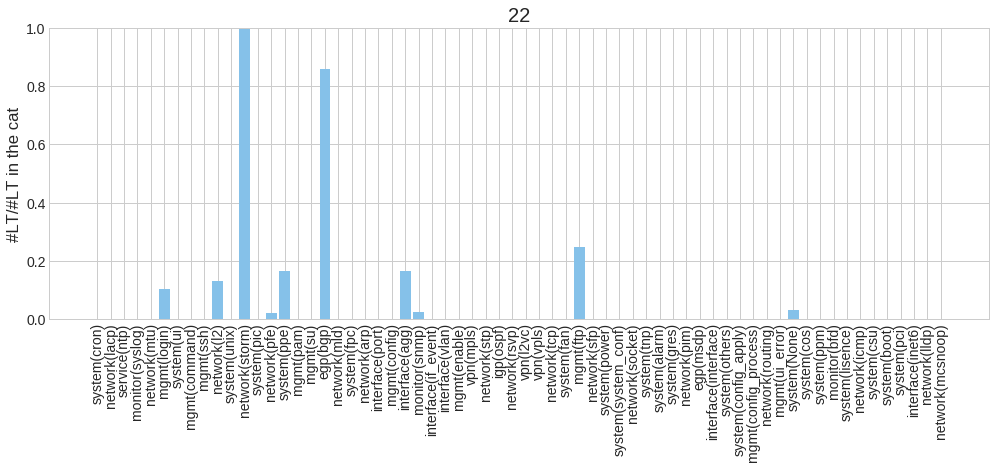

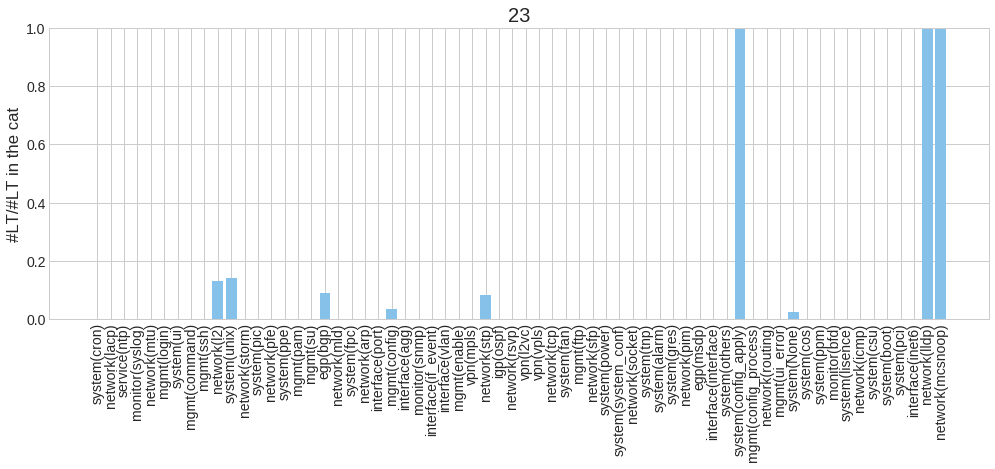

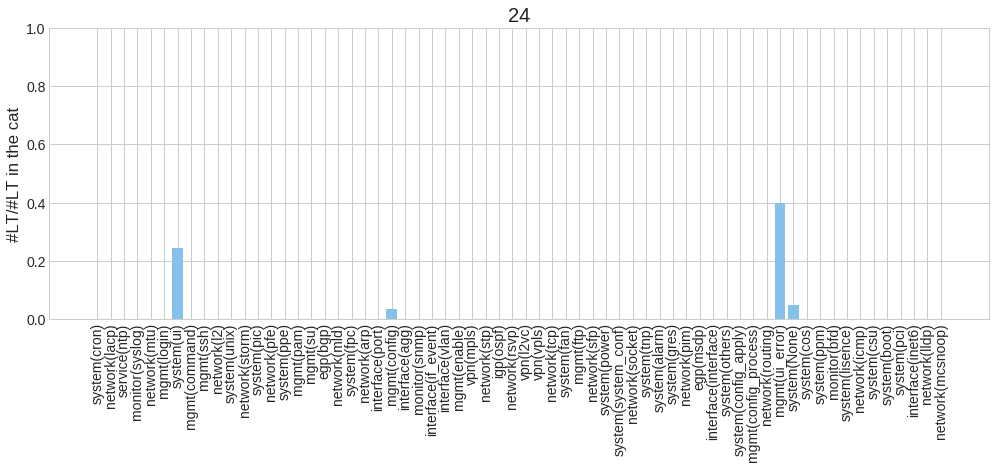

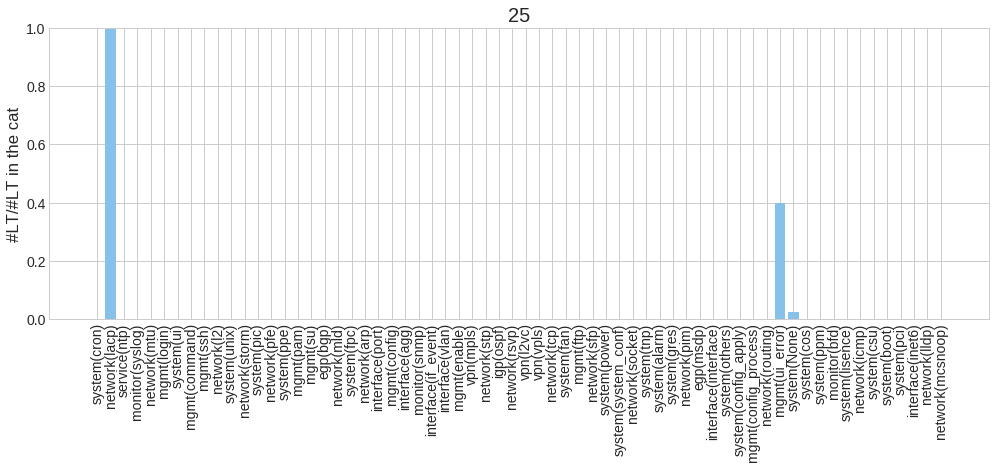

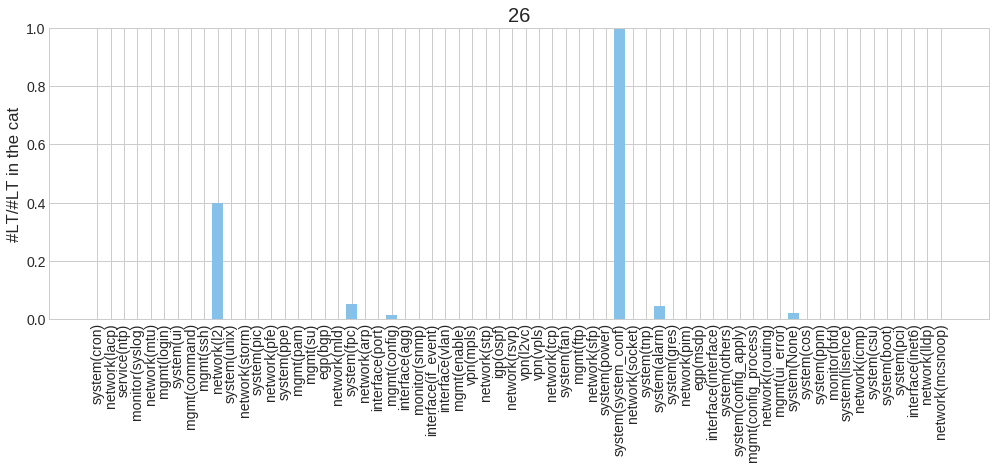

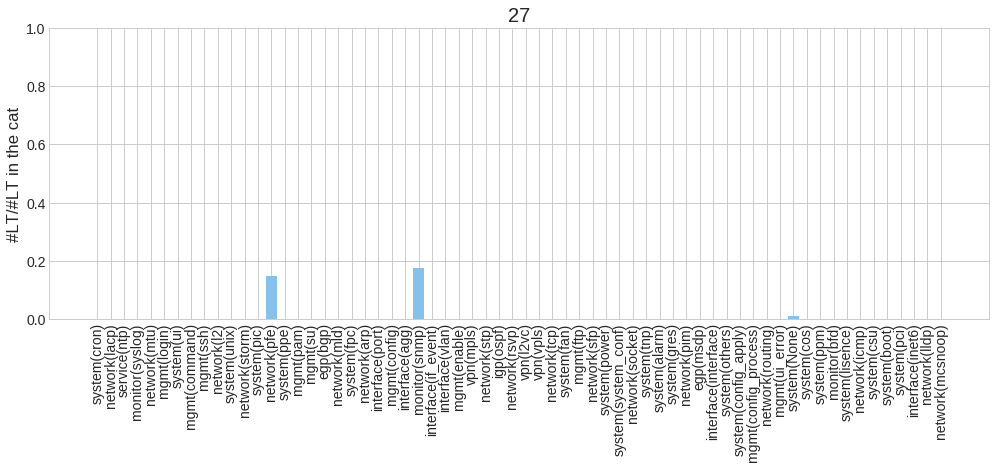

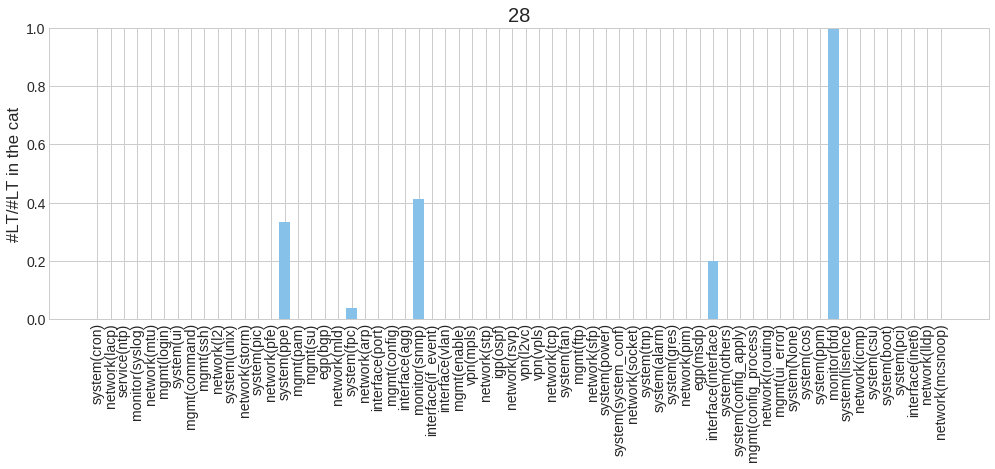

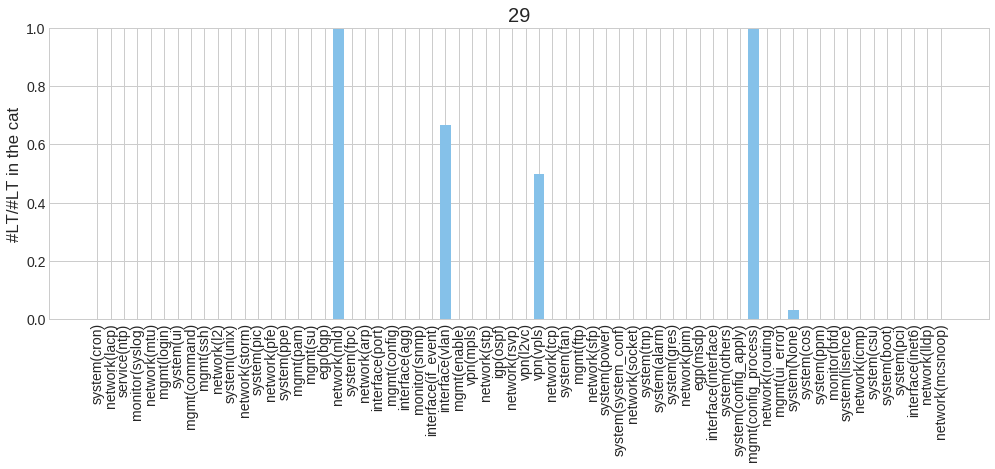

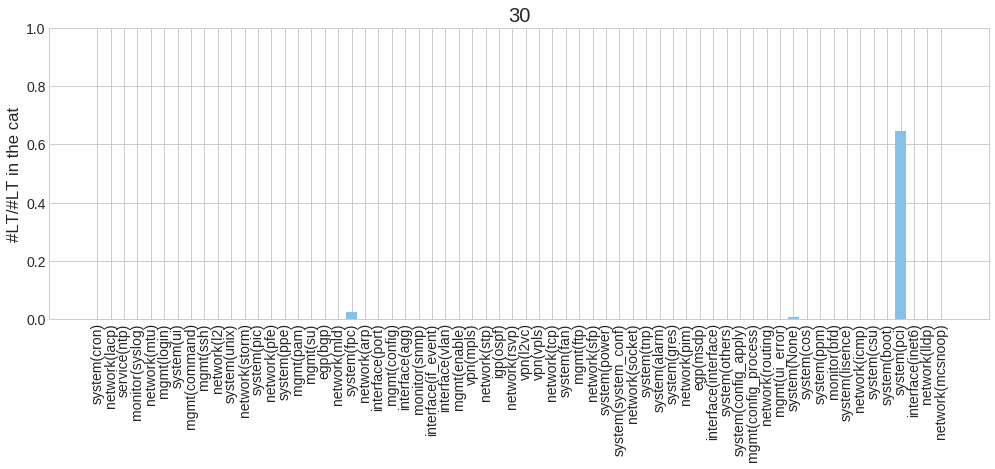

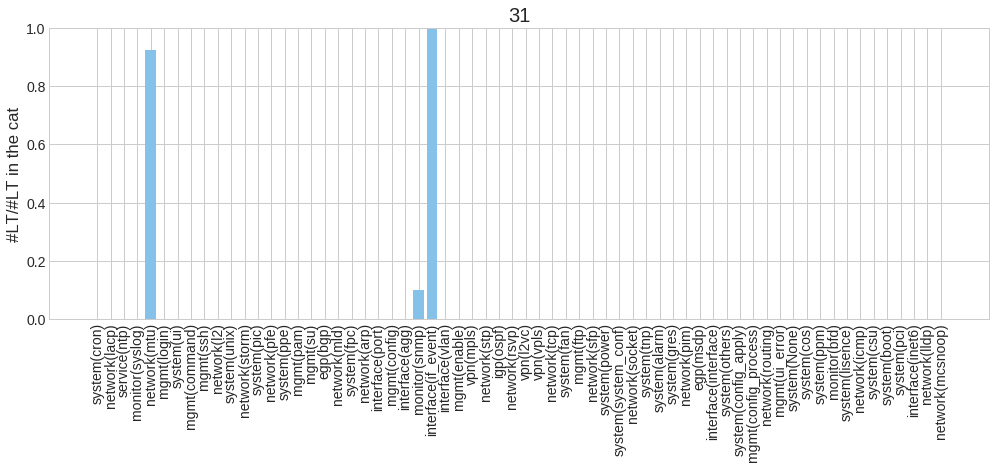

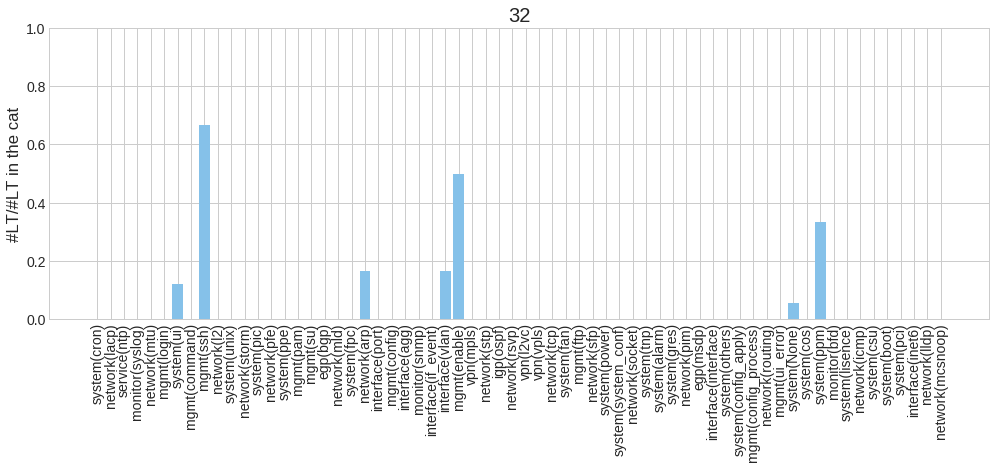

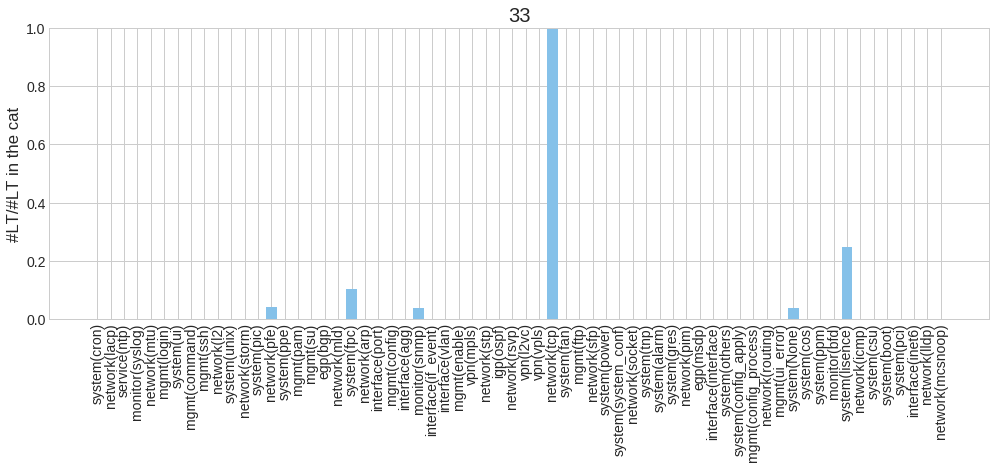

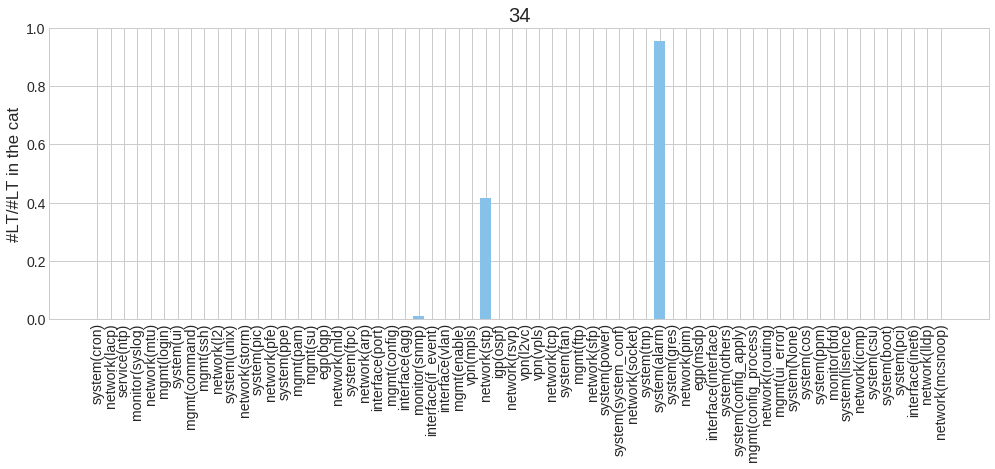

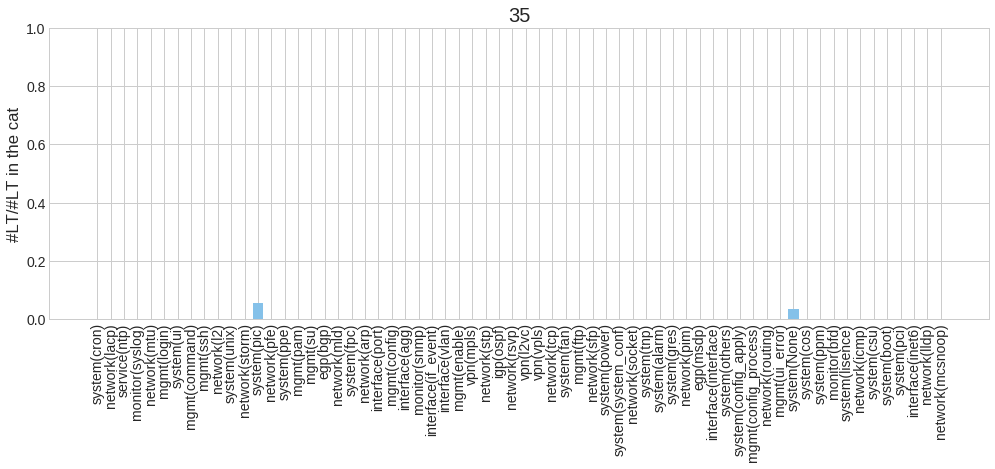

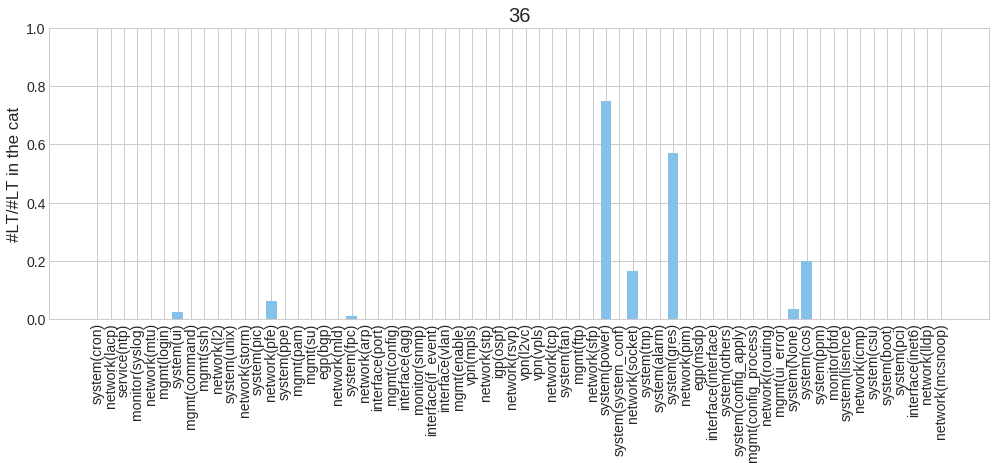

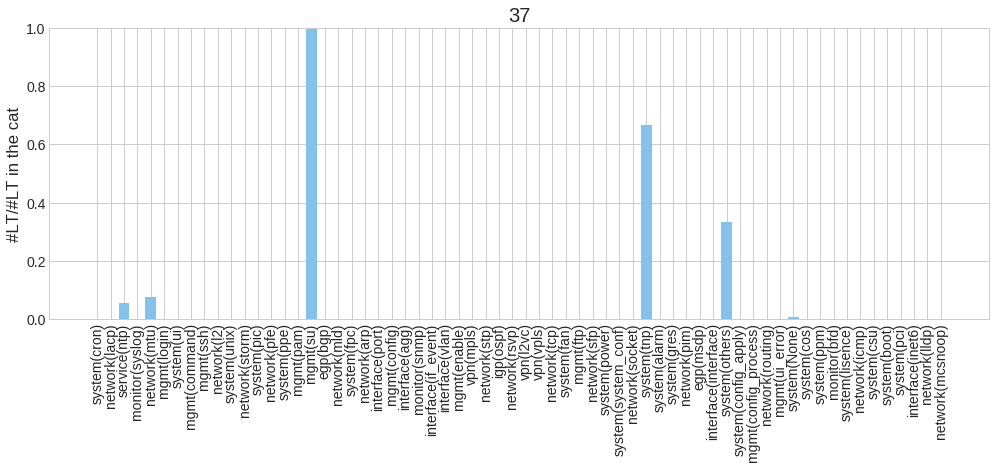

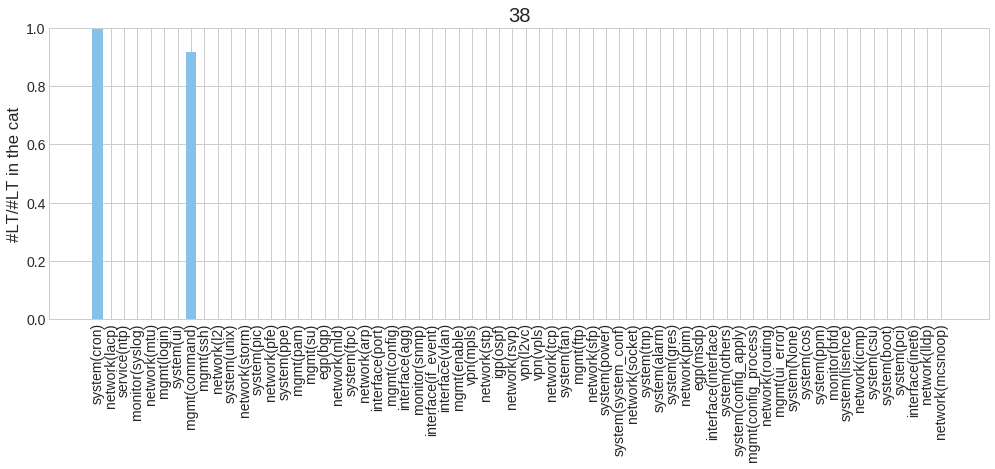

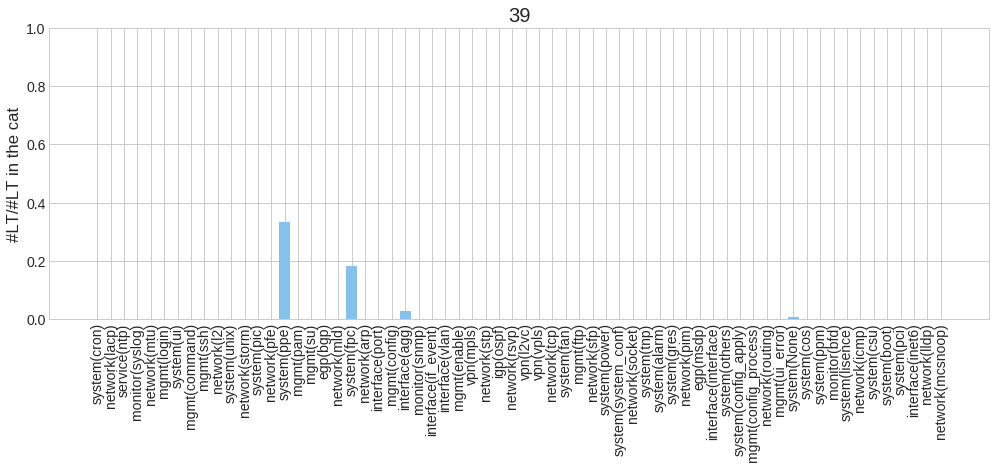

In [350]:
## 逆変換

total_per_cat = np.array([len(lt_per_cat[i]) for i in inf_per_cat.keys()])

cat_per_inf = dict()
for i in range(40):
    cat_per_inf[i] = []

for cat, res in inf_per_cat.items():
    for r in res:
        cat_per_inf[r].append(cat)
    
for cat, res in cat_per_inf.items():
    plt.figure(figsize=(15, 5))
    plt.title(cat)
    y = collections.Counter(res)
    y = [y[i] if i in y else 0 for i in inf_per_cat.keys()]
    y = np.array(y) / total_per_cat
    plt.bar(np.arange(len(inf_per_cat)), y, color="#85C1E9")
    plt.xticks(np.arange(len(inf_per_cat)), inf_per_cat.keys(), rotation=90)
    plt.ylabel("#LT/#LT in the cat")
#     minY = 5 if max(y) < 5 else max(y)+1
#     plt.ylim(0, minY)
    plt.ylim(0, 1)
    plt.show()

In [91]:
lt_per_inf_topic = {}
for i in range(40):
    lt_per_inf_topic[i] = []
    
for ltid, data in raw_lt.items():
    lt = data['lt']
        
    c = list(collections.Counter([word_dict[w] for w in string_to_corpus(lt, max_len=7)]).items())
    topic_dist, word_topic, word_topic_dist = lda[c]
    inf_topic = np.argmax(np.array([t[1] for t in topic_dist]))
    
    lt_per_inf_topic[inf_topic].append((lt, string_to_corpus(lt, max_len=7)))

In [97]:
for inf_topic, lts in lt_per_inf_topic.items():
    print(inf_topic, inf_topic_words[inf_topic])
    
    for lt in lts:
        print("\t", lt[0], "\t",  lt[1])
    print()

0 ['mcsn', 'received', 'message', 'ifl', 'op', 'stp', 'input', 'ae', 'iff', 'bundle']
	 **: rpd[**]: Received MC_AE_OPTIONS TLV for intf device **; mc_ae_id **, status ** 	 ['rpd', 'received', 'mc', 'ae', 'options', 'tlv', 'for']
	 mcsn[**]: Received MC_AE_OPTIONS TLV for intf device **; mc_ae_id **, status ** 	 ['mcsn', 'received', 'mc', 'ae', 'options', 'tlv', 'for']
	 rpd[**]: Received MC_AE_OPTIONS TLV for intf device **; mc_ae_id **, status ** 	 ['rpd', 'received', 'mc', 'ae', 'options', 'tlv', 'for']
	 mcsn[**]: STP ** 	 ['mcsn', 'stp']
	 **: rpd[**]: **: received table message with address family ** op ** 	 ['rpd', 'received', 'table', 'message', 'with', 'address', 'family']
	 /kernel: ae_bundlestate_ifd_change: bundle **: bundle IFD minimum links not met ** < ** 	 ['/kernel', 'ae', 'bundlestate', 'ifd', 'change', 'bundle', 'bundle']
	 /kernel: ae_bundlestate_ifd_change: bundle **: bundle IFD state changed to ** 	 ['/kernel', 'ae', 'bundlestate', 'ifd', 'change', 'bundle', 'bund

	 /kernel: init: ** (PID **) exited with status=** Normal Exit 	 ['/kernel', 'init', 'pid', 'exited', 'with', 'status', 'normal']
	 /kernel: init: ** (PID **) terminate signal sent 	 ['/kernel', 'init', 'pid', 'terminate', 'signal', 'sent']
	 /kernel: init: ** (PID **) started 	 ['/kernel', 'init', 'pid', 'started']
	 /kernel: init: ** (PID **) sending signal hup: due to "**": ** 	 ['/kernel', 'init', 'pid', 'sending', 'signal', 'hup', 'due']
	 /kernel: init: lacp (PID **) sending signal usr1: due to "proto-mastership": ** 	 ['/kernel', 'init', 'lacp', 'pid', 'sending', 'signal', 'usr1']
	 /kernel: init: ** (PID **) terminated by signal number ** 	 ['/kernel', 'init', 'pid', 'terminated', 'by', 'signal', 'number']
	 /kernel: pid **: corrected slot count (2->**) 	 ['/kernel', 'pid', 'corrected', 'slot', 'count', '2-']
	 [**]: EVT ** ** ** PORT MGMT ** ** **:** Port up. 	 ['evt', 'port', 'mgmt', 'port', 'up.']
	 [**]: EVT ** ** ** PORT ** ** **:** Auto negotiation failed. 	 ['evt', 'port

### グラフ生成

- エッジの重みは，GTノードから出ているエッジの，それぞれの発生回数の割合

In [315]:
inf_per_cat

{'egp(bgp)': [11,
  22,
  22,
  22,
  23,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  23,
  11,
  11,
  22,
  23,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  23,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  23,
  22,
  22,
  22,
  22,
  22],
 'egp(msdp)': [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
 'igp(ospf)': [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
 'interface(agg)': [8,
  8,
  4,
  5,
  5,
  0,
  0,
  4,
  5,
  0,
  1,
  22,
  0,
  0,
  0,
  0,
  1,
  39,
  8,
  8,
  22,
  1,
  22,
  8,
  8,
  4,
  5,
  5,
  5,
  4,
  5,
  22,
  1,
  22,
  22,
  7],
 'interface(if_event)': [31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  

In [209]:
G = nx.DiGraph()
nx.set_node_attributes

pos = {}
for i,k in enumerate(inf_per_cat.keys()):
    if 'None' in k:
        pos[k] = (2,i)
    else:
        pos[k] = (0, i)
for i in range(40):
    pos[i] = (1, len(inf_per_cat)/40*i)

for cat, res in inf_per_cat.items():
    if cat not in G.nodes:
        G.add_node(cat)
        
    col = collections.Counter(res) # dstの集計
    total = sum(col.values())
    for dst, weight in col.items():
        if dst not in G.nodes:
            G.add_node(dst)
        G.add_edge(cat, dst, weight=weight/total)
        
for n, p in pos.items():
    G.node[n]['pos'] = p

In [320]:
for a in G.edges(data=True):
    print(a)

('system(cron)', 38, {'weight': 1.0})
('network(lacp)', 25, {'weight': 1.0})
('service(ntp)', 2, {'weight': 0.7714285714285715})
('service(ntp)', 37, {'weight': 0.05714285714285714})
('service(ntp)', 17, {'weight': 0.05714285714285714})
('service(ntp)', 20, {'weight': 0.08571428571428572})
('service(ntp)', 19, {'weight': 0.02857142857142857})
('monitor(syslog)', 14, {'weight': 0.5})
('monitor(syslog)', 0, {'weight': 0.25})
('monitor(syslog)', 13, {'weight': 0.25})
('network(mtu)', 37, {'weight': 0.07692307692307693})
('network(mtu)', 31, {'weight': 0.9230769230769231})
('mgmt(login)', 6, {'weight': 0.868421052631579})
('mgmt(login)', 22, {'weight': 0.10526315789473684})
('mgmt(login)', 16, {'weight': 0.02631578947368421})
('system(ui)', 6, {'weight': 0.34146341463414637})
('system(ui)', 8, {'weight': 0.17073170731707318})
('system(ui)', 32, {'weight': 0.12195121951219512})
('system(ui)', 2, {'weight': 0.04878048780487805})
('system(ui)', 13, {'weight': 0.024390243902439025})
('system(u

In [322]:
inf_node_edge_weight = dict()
for a,b in G.edges.items():
    if 'None'  in a[0]:
            if a[1] in inf_node_edge_weight:
                inf_node_edge_weight[a[1]] += 0
            else:
                inf_node_edge_weight[a[1]] = 0
        
    if a[1] in inf_node_edge_weight:
        inf_node_edge_weight[a[1]] += b['weight']
    else:
        inf_node_edge_weight[a[1]] = b['weight']
        
        
# edge_size = [i[2]['weight']*2 for i in G.edges(data=True)]
# edge_size = [1 if i[2]['weight']==1.0  else 0 for i in G.edges(data=True)]
# edge_size = [i[2]['weight'] if i[2]['weight']>0.55 else 0  for i in G.edges(data=True)]
edge_size = [i[2]['weight'] if "None" not in i[0] else -1 for i in G.edges(data=True)]

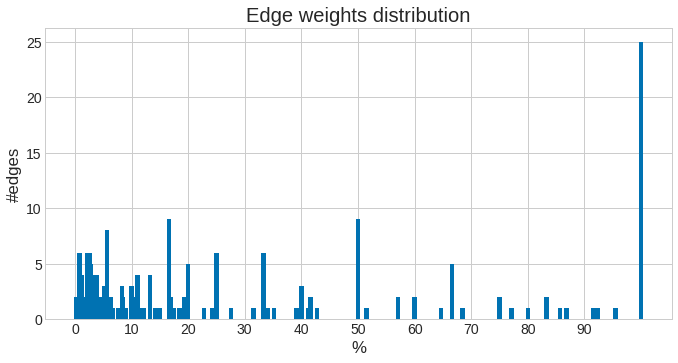

In [274]:
x = collections.Counter([int(e*1000)/10 for e in edge_size])
plt.figure(figsize=(10, 5))
plt.bar(x.keys(), x.values())
plt.title("Edge weights distribution")
plt.xlabel("%")
plt.ylabel("#edges")
plt.xticks([i for i in range(0, 100, 10)])
plt.show()

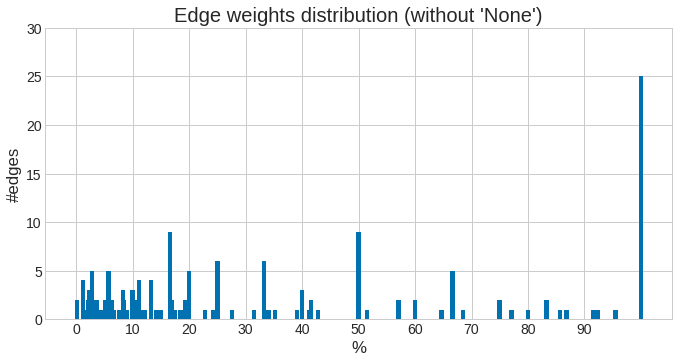

In [326]:
x = collections.Counter([int(e*1000)/10 for e in edge_size])

# remove -100% data
x = sorted(x.items(), key=lambda x:x[0])
x[0] = (0., 0)

plt.figure(figsize=(10, 5))
plt.bar([i[0] for i in x], [i[1] for i in x])
plt.title("Edge weights distribution (without 'None')")
plt.xlabel("%")
plt.ylabel("#edges")
plt.xticks([i for i in range(0, 100, 10)])
plt.ylim(0, 30)
plt.show()

In [296]:
print('All edges:', len(G.edges()))

print('Without None:', len([(k,v) for k,v in G.edges.items() if 'None' not in k[0]]))

All edges: 209
Without None: 176


In [275]:
# エッジ1本のみ
for i in np.where(np.array(edge_size)==1)[0]:
    print(list(G.edges())[i], "\t", edge_size[i])
    
print()
for i in np.where(np.array(edge_size)>0.55)[0]:
    print(list(G.edges())[i], "\n\t", edge_size[i], len(lt_per_cat[list(G.edges())[i][0]]))

('system(cron)', 38) 	 1.0
('network(lacp)', 25) 	 1.0
('network(storm)', 22) 	 1.0
('mgmt(pam)', 6) 	 1.0
('mgmt(su)', 37) 	 1.0
('network(mld)', 29) 	 1.0
('interface(if_event)', 31) 	 1.0
('vpn(mpls)', 7) 	 1.0
('igp(ospf)', 11) 	 1.0
('network(rsvp)', 11) 	 1.0
('network(tcp)', 33) 	 1.0
('system(fan)', 21) 	 1.0
('network(sfp)', 4) 	 1.0
('system(system_conf)', 26) 	 1.0
('network(pim)', 11) 	 1.0
('egp(msdp)', 11) 	 1.0
('system(config_apply)', 23) 	 1.0
('mgmt(config_process)', 29) 	 1.0
('network(routing)', 11) 	 1.0
('monitor(bfd)', 28) 	 1.0
('network(icmp)', 20) 	 1.0
('system(boot)', 13) 	 1.0
('interface(inet6)', 16) 	 1.0
('network(lldp)', 23) 	 1.0
('network(mcsnoop)', 23) 	 1.0

('system(cron)', 38) 
	 1.0 8
('network(lacp)', 25) 
	 1.0 6
('service(ntp)', 2) 
	 0.7714285714285715 35
('network(mtu)', 31) 
	 0.9230769230769231 26
('mgmt(login)', 6) 
	 0.868421052631579 38
('mgmt(command)', 38) 
	 0.9166666666666666 24
('mgmt(ssh)', 32) 
	 0.6666666666666666 18
('system(un

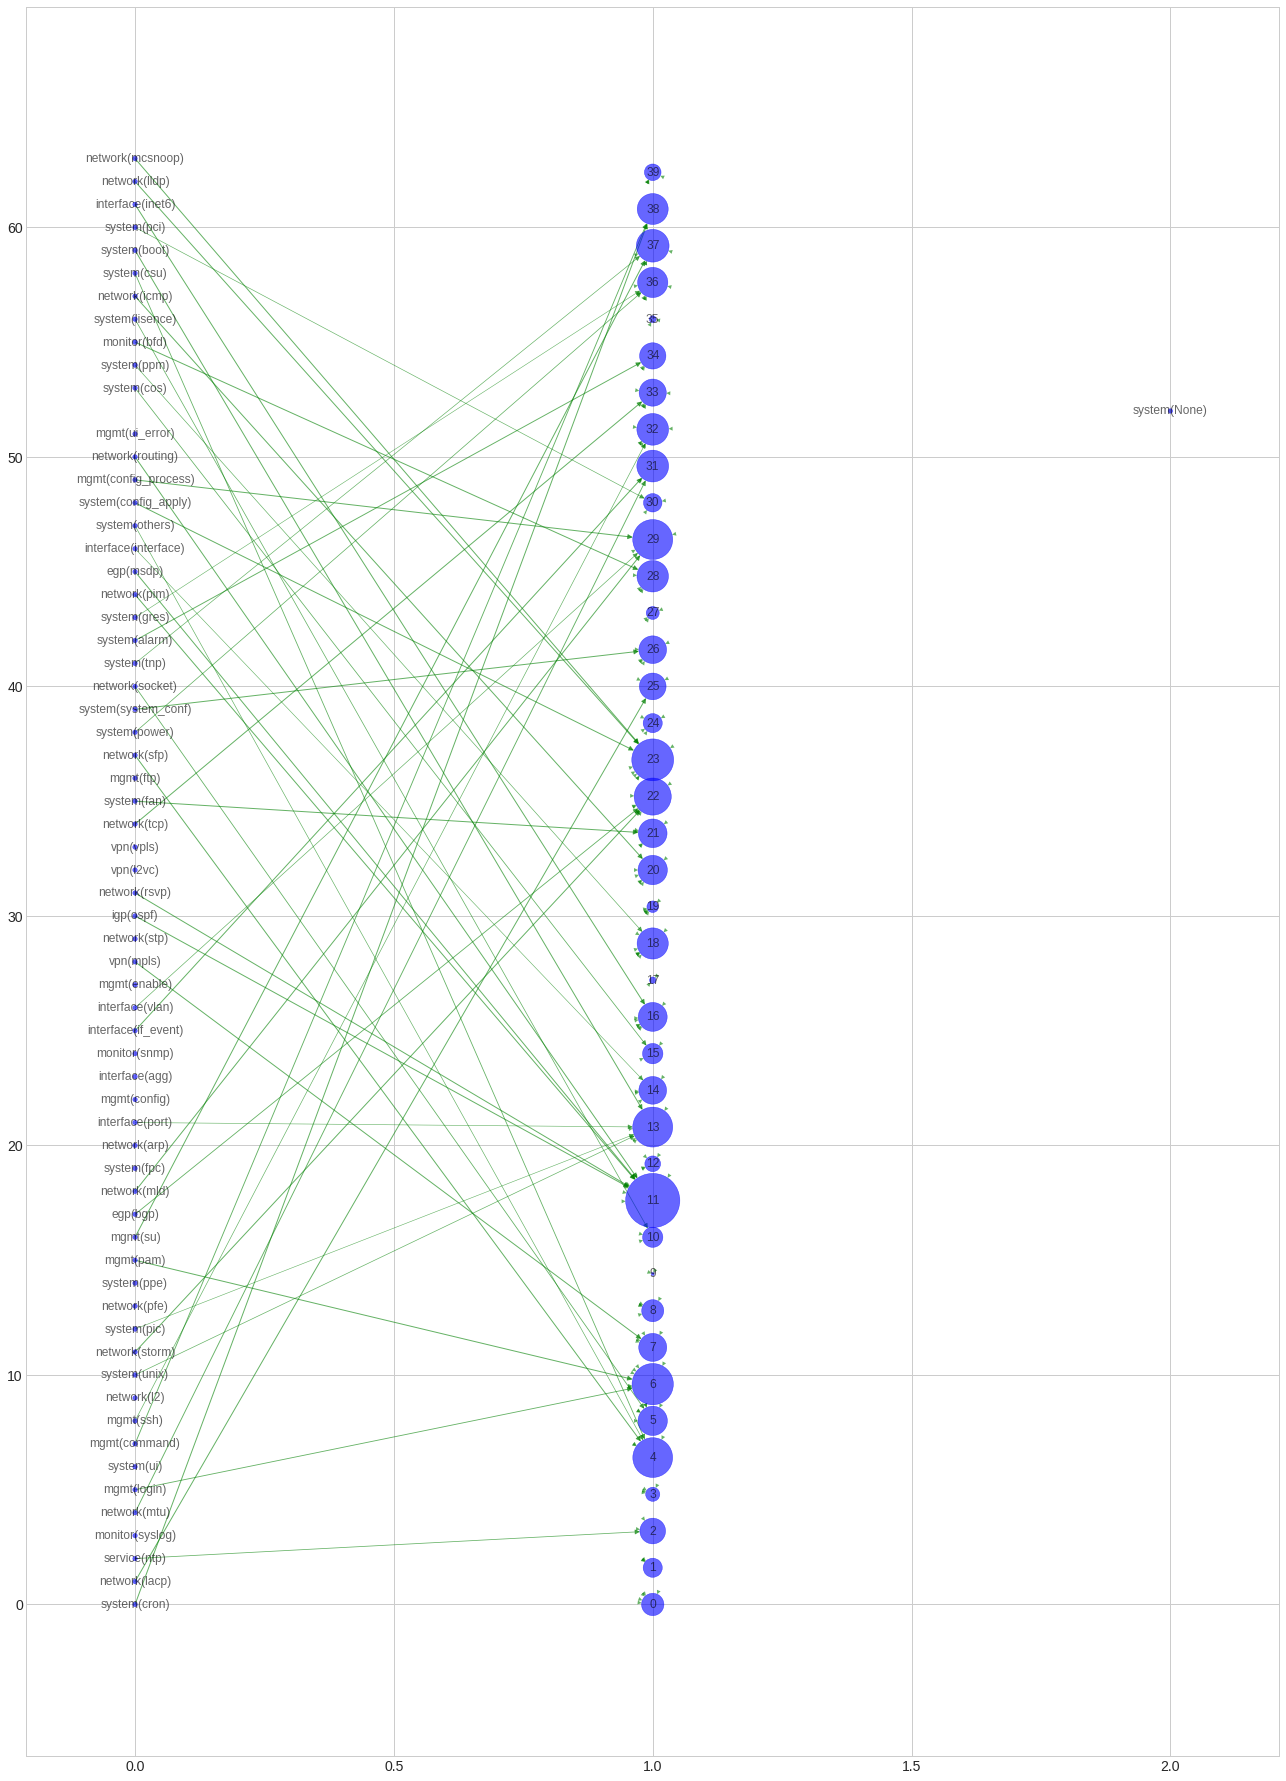

In [277]:
plt.figure(figsize=(20, 30))
node_size = [20 if type(g) == str else inf_node_edge_weight[g]*500 for g in G.nodes]
nx.draw_networkx(G, pos, node_color='b', alpha=0.6, node_size=node_size, width=edge_size, edge_color='g')

plt.show()

# nx.draw_networkx_labels(G, pos, fontsize=14, font_family="Yu Gothic", font_weight="bold")

# edge_width = [ d['weight']*0.2 for (u,v,d) in G.edges(data=True)]
# nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='C', width=edge_width)

# plt.axis('off')
# plt.savefig("g2.png")
# plt.show()

### 集計結果

- gtのカテゴリごとに，どのトピックが振られたかを確認
    - カテゴリとトピックのそれらしい対応をつけて見た
    - 複数マージされるものと，対応づけられなかったものが存在
- 訓練じはUIの単語を含むものは除外したが，評価じは全て含めた
- gt通りにうまくいったものは存在

## VyOS

In [16]:
with open("./vyos_logs/tpl_all_uniq", "r") as f:
    raw_vyos = f.readlines()

In [17]:
corpus = []
for lt in raw_vyos:
    words = [remove_symbols(t) for t in lt.split()]
    split_words = []
    for w in words:
        if len(w.split()) > 1: # さらに分割できる場合
            split_words.extend(w.split())
        else:
            split_words.append(w)
    split_words = [t.lower() for t in split_words if t != '']
    corpus.append(split_words)

In [18]:
all_words = list(set([word for words in corpus for word in words]))
word_dict = {w:i for i, w in enumerate(all_words)}
inv_word_dict = {v:k for k,v in word_dict.items()}

corpus = []
for lt in raw_vyos:
    words = [remove_symbols(t) for t in lt.split()]
    split_words = []
    for w in words:
        if len(w.split()) > 1: # さらに分割できる場合
            split_words.extend(w.split())
        else:
            split_words.append(w)
    split_words = [t.lower() for t in split_words if t != '']
    
    split_words = [w for w in split_words]

    split_words = split_words[:7] # 前方のみ残す

    lt_word_id_cnt = collections.Counter([word_dict[w] for w in split_words])

    corpus.append([(tid, cnt) for tid, cnt in lt_word_id_cnt.items()])

In [19]:
# 単語のカウント
word_cnt = {}
for wid, cnt in sorted(collections.Counter([c[0] for s in corpus for c in s]).items(), key= lambda x: x[1])[::-1]:
    print(inv_word_dict[wid], cnt)
    word_cnt[inv_word_dict[wid]] = cnt

cant 8849
failed 8426
socket 5323
not 4428
to 4087
fd 3261
error 3111
set 2601
no 2483
on 2464
file 2386
setsockopt 2306
ip 2186
ospf 2121
open 1984
for 1835
could 1661
ipv6 1652
cannot 1652
too 1651
fail 1621
address 1569
is 1446
read 1383
network 1383
bind 1355
packet 1160
invalid 1155
operation 1109
write 1098
accept 1086
send 1068
device 1046
stream 1019
a 1007
protocol 984
type 968
create 964
daemon 947
many 865
apiserver 857
in 837
privs 822
make 822
option 820
vty 813
by 784
message 753
bad 722
connection 713
out 711
isis 709
multicast 703
ifindex 699
get 699
pid 697
connect 688
route 683
sockopt 681
recv 681
addr 681
sock 680
membership 676
sendmsg 675
level 657
of 637
key 629
add 613
available 583
link 576
ripng 575
such 573
remote 566
has 556
join 553
register 551
lower 550
raise 549
ioctl 546
so 545
listen 541
sysctl 540
xmalloc 540
unix 540
opaque 458
smux 445
argument 442
name 441
bgp 433
family 431
resource 429
buffer 429
interface 428
or 427
size 424
reset 418
if 418
bpf

In [20]:
# LTレベルの共起
cor_df = pd.DataFrame(index=np.arange(len(word_dict)), columns=np.arange(len(word_dict)), dtype=int)
cor_df = cor_df.fillna(0)

for s in tqdm.tqdm(corpus):
    for a,b in itertools.combinations(s, 2):
        ida = int(a[0])
        idb = int(b[0])
        cor_df[ida][idb] += 1
        cor_df[idb][ida] += 1

cor_list = []
for a,b in tqdm.tqdm(itertools.combinations(np.arange(len(word_dict)), 2)):
    if cor_df[a][b] != 0 :
        cor_list.append([(a, b) , cor_df[a][b]])
        
# for i in tqdm.tqdm(sorted(cor_list, key=lambda x:x[1], reverse=True)):
#     a,b = i[0]
#     print(inv_word_dict[a], inv_word_dict[b], i[1])
#     print("\t simpson:", i[1]/min(word_cnt[inv_word_dict[a]], word_cnt[inv_word_dict[b]]))
#     print("\t jaccard:", i[1]/(word_cnt[inv_word_dict[a]] + word_cnt[inv_word_dict[b]] - i[1]))
#     print()

100%|██████████| 29266/29266 [01:24<00:00, 347.47it/s]
2550411it [00:37, 68379.60it/s]


In [21]:
word_dict['failed']

386

In [24]:
cor_list[:100]

[[(0, 78), 13],
 [(0, 119), 2],
 [(0, 139), 1],
 [(0, 197), 2],
 [(0, 332), 1],
 [(0, 499), 9],
 [(0, 549), 13],
 [(0, 635), 1],
 [(0, 697), 2],
 [(0, 791), 13],
 [(0, 823), 1],
 [(0, 1007), 1],
 [(0, 1024), 1],
 [(0, 1252), 2],
 [(0, 1333), 1],
 [(0, 1365), 1],
 [(0, 1463), 1],
 [(0, 1747), 1],
 [(0, 1762), 8],
 [(0, 2080), 2],
 [(0, 2255), 1],
 [(2, 78), 3],
 [(2, 129), 1],
 [(2, 286), 2],
 [(2, 386), 1],
 [(2, 488), 2],
 [(2, 757), 1],
 [(2, 829), 2],
 [(2, 921), 2],
 [(2, 1111), 1],
 [(2, 1210), 1],
 [(2, 1508), 2],
 [(2, 1897), 2],
 [(2, 2008), 2],
 [(2, 2174), 2],
 [(3, 89), 1],
 [(3, 108), 1],
 [(3, 1276), 1],
 [(3, 1679), 1],
 [(3, 1722), 1],
 [(3, 1991), 1],
 [(4, 14), 4],
 [(4, 15), 138],
 [(4, 29), 2],
 [(4, 44), 2],
 [(4, 58), 1],
 [(4, 78), 136],
 [(4, 95), 2],
 [(4, 99), 411],
 [(4, 100), 4],
 [(4, 102), 2],
 [(4, 112), 2],
 [(4, 116), 4],
 [(4, 119), 18],
 [(4, 122), 2],
 [(4, 129), 30],
 [(4, 135), 3],
 [(4, 137), 4],
 [(4, 143), 2],
 [(4, 154), 1],
 [(4, 157), 2],
 [(4

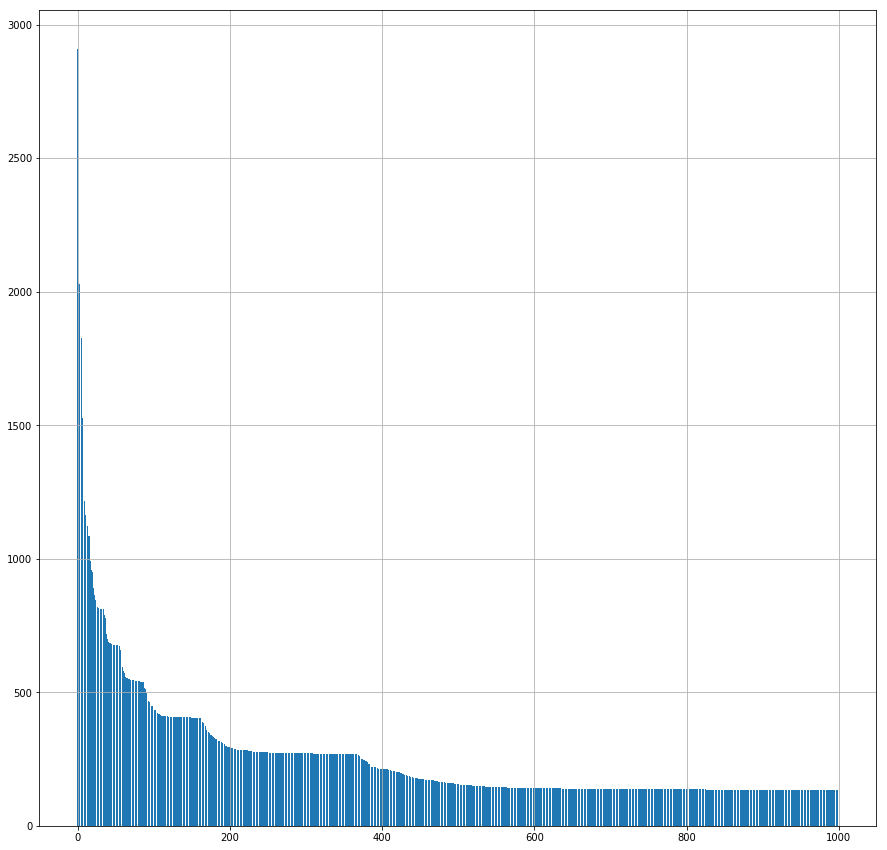

In [25]:
plot_data = [i[1] for i in sorted(cor_list, key=lambda x:x[1], reverse=True)][:1000]
plt.figure(figsize=(15, 15))
plt.bar(np.arange(len(plot_data)), plot_data)
plt.grid()
plt.show()

In [45]:
stop_words = ["failed", "cant", "not", "to", "could", "cannot", "is", "a", "for", "fail"]

In [48]:
G = nx.DiGraph()
nx.set_node_attributes

for i in sorted(cor_list, key=lambda x:x[1], reverse=True):
    if i[1] > 50: # 共起がn回以上
        a,b = i[0]
        
        if inv_word_dict[a] in stop_words or inv_word_dict[b] in stop_words:
            continue
            
        simpson = i[1]/min(word_cnt[inv_word_dict[a]], word_cnt[inv_word_dict[b]])
        jaccard = i[1]/(word_cnt[inv_word_dict[a]] + word_cnt[inv_word_dict[b]] - i[1])
        
        print(simpson)
        if simpson > 0.98:
            if a not in G.nodes:
                G.add_node(inv_word_dict[a])

            if b not in G.nodes:
                G.add_node(inv_word_dict[b])

            src = inv_word_dict[a] if np.argmin([word_cnt[inv_word_dict[a]], word_cnt[inv_word_dict[b]]]) == 0 else inv_word_dict[b]
            dst = inv_word_dict[a] if src == inv_word_dict[b] else inv_word_dict[b]
            G.add_edge(src, dst, weight=jaccard)

0.6180237877401646
0.5567246111619396
0.46877710320901994
0.7018450184501845
1.0
0.9859976662777129
0.803729146221786
0.9914841849148418
0.9890243902439024
0.3709972552607502
0.7043568464730291
0.6233885819521179
0.7899649941656943
0.824390243902439
1.0
1.0
0.25990003844675125
0.9911894273127754
0.9911894273127754
1.0
0.21491733948481354
0.793400286944046
0.5064456721915286
0.22321428571428573
0.2224025974025974
0.3311138014527845
0.8002936857562408
0.7738264580369844
0.7973568281938326
0.3926247288503254
0.7970588235294118
0.6597560975609756
1.0
0.7929515418502202
0.7988165680473372
0.7988165680473372
0.2368951612903226
0.18727345952476843
0.18262987012987014
0.22631048387096775
0.673469387755102
0.5965665236051502
0.6090775988286969
0.2993492407809111
0.5908440629470673
0.1324333011893282
0.8995633187772926
0.7472727272727273
0.7486338797814208
0.9927184466019418
0.2957339117859725
0.6998284734133791
0.9927007299270073
0.9927007299270073
0.9927007299270073
0.7555555555555555
0.990291

In [50]:
print("test")

test


In [49]:
json_data = nx.node_link_data(G)
f = open("./d3/vyos_nx.json", "w")
json.dump(json_data, f, ensure_ascii=False, indent=4, sort_keys=True, separators=(',', ': '))
f.close()

In [51]:
# with open("./d3/vyos_nx.json", "w") as f :
ag = nx.nx_agraph.to_agraph(G)
ag.draw("test.pdf", prog = 'circo')

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

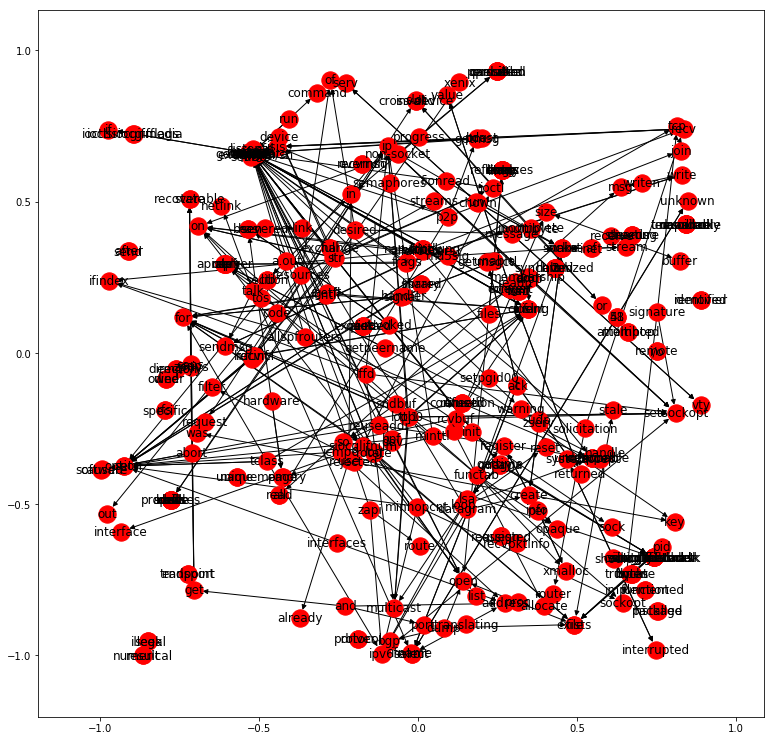

In [35]:
pos = nx.spring_layout(G, k=0.001)

plt.figure(figsize=(13, 13))
nx.draw_networkx(G, pos=pos)
plt.show()

## LDA

### full length

In [16]:
for cat, lts in lt_per_cat.items():
    print(cat)

system(cron)
network(lacp)
service(ntp)
monitor(syslog)
network(mtu)
mgmt(login)
system(ui)
mgmt(command)
mgmt(ssh)
network(l2)
system(unix)
network(storm)
system(pic)
network(pfe)
system(ppe)
mgmt(pam)
mgmt(su)
egp(bgp)
network(mld)
system(fpc)
network(arp)
interface(port)
mgmt(config)
interface(agg)
monitor(snmp)
interface(if_event)
interface(vlan)
mgmt(enable)
vpn(mpls)
network(stp)
igp(ospf)
network(rsvp)
vpn(l2vc)
vpn(vpls)
network(tcp)
system(fan)
mgmt(ftp)
network(sfp)
system(power)
system(system_conf)
network(socket)
system(tnp)
system(alarm)
system(gres)
network(pim)
egp(msdp)
interface(interface)
system(others)
system(config_apply)
mgmt(config_process)
network(routing)
mgmt(ui_error)
system(None)
system(cos)
system(ppm)
monitor(bfd)
system(lisence)
network(icmp)
system(csu)
system(boot)
system(pci)
interface(inet6)
network(lldp)
network(mcsnoop)


In [22]:
tmp = []
eval_corpus = []
eval_corpus_ltids = []
for ltid, i in enumerate(corpus):
    if word_dict['ui'] not in [j[0] for j in i]: # uiを弾く(550番)
        tmp.append(tuple(sorted(i)))
        eval_corpus.append(i)
        eval_corpus_ltids.append(ltid)
    
print(len(tmp))
set_corpus = list(set(tmp))

1246


In [23]:
corpus

[[(985, 1), (631, 1), (443, 1), (357, 1)],
 [(985, 1), (443, 1), (1412, 1), (1055, 1)],
 [(985, 1), (443, 1), (1300, 1), (959, 1)],
 [(985, 1), (443, 1), (357, 1)],
 [(985, 1), (443, 1), (1412, 1), (1055, 1)],
 [(985, 1), (443, 1), (1300, 1), (959, 1)],
 [(985, 1), (631, 1), (443, 1), (1107, 1)],
 [(985, 1), (1524, 1), (809, 1), (827, 1)],
 [(1074, 1), (1600, 1), (1209, 1), (231, 1), (991, 1), (1437, 1), (308, 1)],
 [(1074, 1), (848, 1), (1600, 1), (1209, 1), (231, 1), (991, 1), (1437, 1)],
 [(1451, 1), (1600, 1), (1209, 1), (231, 1), (991, 1), (1437, 1), (308, 1)],
 [(1451, 1), (848, 1), (1600, 1), (1209, 1), (231, 1), (991, 1), (1437, 1)],
 [(1154, 1), (1253, 1), (1600, 2), (440, 1), (561, 1), (1481, 1)],
 [(520, 2), (492, 1), (1600, 1), (853, 1), (507, 1), (17, 1)],
 [(1142, 1), (342, 1), (566, 1), (391, 1)],
 [(1142, 1), (1314, 1), (608, 1), (340, 1), (630, 1)],
 [(1142, 1), (1330, 1), (1617, 1), (144, 1)],
 [(1142, 1), (7, 1), (314, 1), (1210, 1), (1238, 1)],
 [(1142, 1), (7, 1)],

In [25]:
lda = gensim.models.ldamodel.LdaModel(
                                      #corpus=corpus, 
                                      corpus=set_corpus,
                                      chunksize=10,
                                      num_topics=40, 
                                      id2word=inv_word_dict, 
                                      minimum_probability=1e-8, 
                                      #gamma_threshold=1e-5,
                                      #eval_every=10,
                                      iterations=100,
#                                       alpha='auto', 
#                                       eta='auto', 
                                      decay=1.0,
                                      passes=1,
                                      per_word_topics=True)

In [30]:
results =  [np.argmax(l) for l in lda.inference(eval_corpus)[0]]

inference_results = {}
for a,b in zip(eval_corpus, results):
    if b in inference_results:
        inference_results[b].append([inv_word_dict[c[0]] for c in a])
    else:
        inference_results[b] = [[inv_word_dict[c[0]] for c in a]]

In [31]:
for topic in range(lda.num_topics):
    print(topic, [inv_word_dict[i[0]] for i in lda.get_topic_terms(topic)])
# print('1', [inv_word_dict[i[0]] for i in lda.get_topic_terms(1)])

0 ['ns', 'libjsnmp', 'sa', 'mib2d', 'ipc', 'log', 'reg', 'rows', 'partial', 'idpd']
1 ['lacp', 'timeout', 'found', '+', 'proto', 'current', 'lacpd', 'timer', 'while', 'hold']
2 ['msdp', 'limit', 'if', 'l2ald', 'reset', 'this', 'src', 'ifbd', 'thresh', 'under']
3 ['status', 'mqchip', 'exit', 'inetd', 'exited', 'pcie', 'sfid', 'built', 'li', '/usr/sbin/sshd']
4 ['snmpd', 'failure', 'send', 'software', 'adding', 'vccp', 'source', 'udp', 'jnx', 'netsnmp']
5 ['address', 'vlan', 'exceeded', 'table', 'base', 'entries', 'was', 'equipment', 'hardware', 'referred']
6 ['turning', 'pfealiveness', 'destination', 'fpc1', 'fpc11', 'unsupported', 'off', 'sample', 'ignoring', 'run-length']
7 ['not', 'rsp', 'system', 'access', 'sending', 'interface', 'input', 'ready', 'csu', 'other']
8 ['/usr/sbin/cron', 'cmd', '-x', 'tnp.bootpd', 'boot', '/usr/libexec/ui/package', 'mgd', 'bootpd', 'newsyslog', 'bootstring']
9 ['master', 'err', 'stp', 'op', 'handler', 'tc-generation', 'initialized', 'established', 'iff'

In [27]:
inf_ltids = {}
for ltid, inf_cat in results.items():
    if inf_cat in inf_ltids:
        inf_ltids[inf_cat].append(ltid)
    else:
        inf_ltids[inf_cat] = [ltid]

In [28]:
for inf_cat, ltids in inf_ltids.items():
    print("topic:", inf_cat)
    for i in ltids:
        print(raw_lt[str(i)]['lt'])
    print()

topic: 8
/usr/sbin/cron[**]: (root) CMD (newsyslog)
mib2d[**]: lacp info not found for ifl:**
mib2d[**]: cleared lacp info not found for ifl:**
/usr/sbin/cron[**]: (**) CMD (adjkerntz -a)
xntpd[**]: NTP Server Unreachable
last message repeated ** times
/kernel: MTU for ** reduced to **
login: LOGIN_INFORMATION: User ** logged in from host ** on device **
mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [class-of-service interfaces ** unit ** rewrite-rules **] <unconfigured> -> "**"
rpd[**]: bgp_read_v4_message:**: NOTIFICATION received from ** (** AS **): code ** (Hold Timer Expired Error), socket buffer sndcc: ** rcvcc: ** TCP state: **, snd_una: ** snd_nxt: ** snd_wnd: ** rcv_nxt: ** rcv_adv: **, hold timer **
mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [protocols bgp group ** neighbor **] "**
mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [protocols bgp group ** neighbor **] <**> -> "**"
LU ** ** Errors lmem addr error
PPE PPE HW Fault Trap: Count **, PC **, 0x0056: ipv4_input_set_proto_and_

### eval

- 外れたやつについて，調査

In [34]:
compared_results = {}
for inf_cat, ltids in inf_ltids.items():
    for ltid in ltids:
        true_cat = raw_lt[str(ltid)]['cat']
        if true_cat in compared_results:
            compared_results[true_cat].append((ltid, inf_cat))
        else:
            compared_results[true_cat] = [(ltid, inf_cat)]

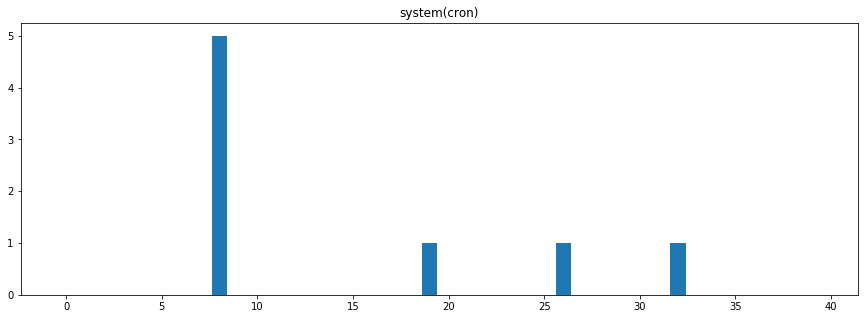

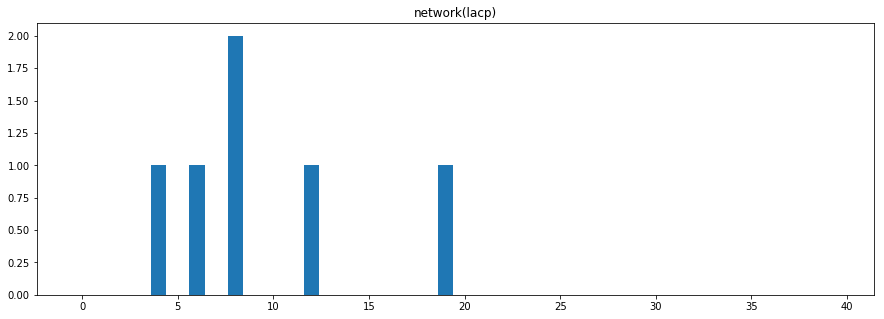

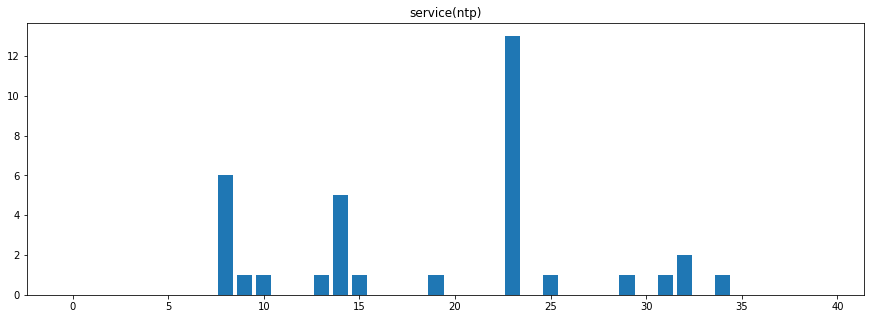

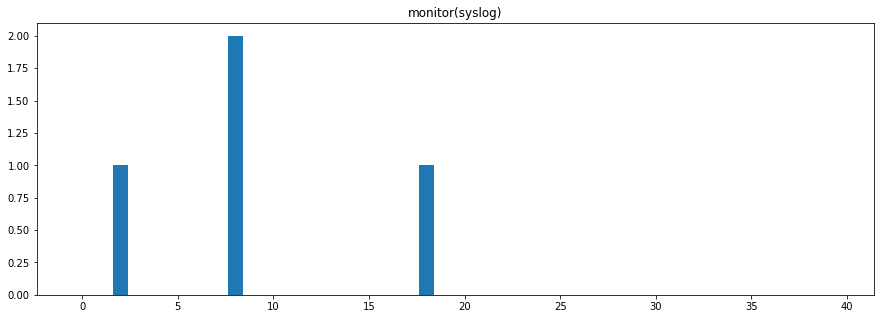

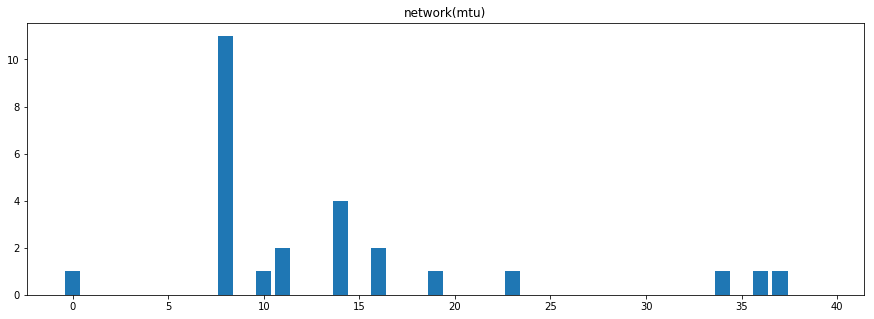

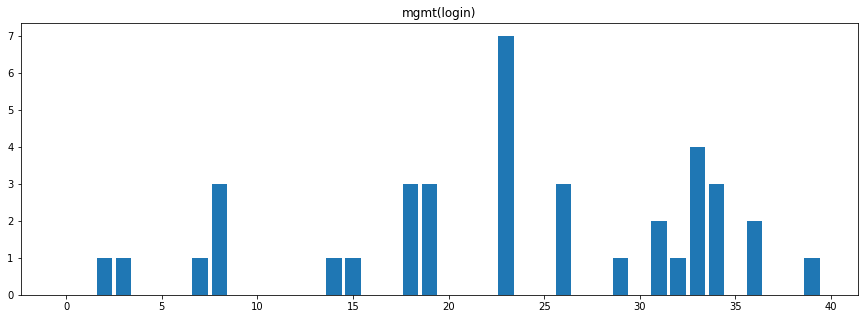

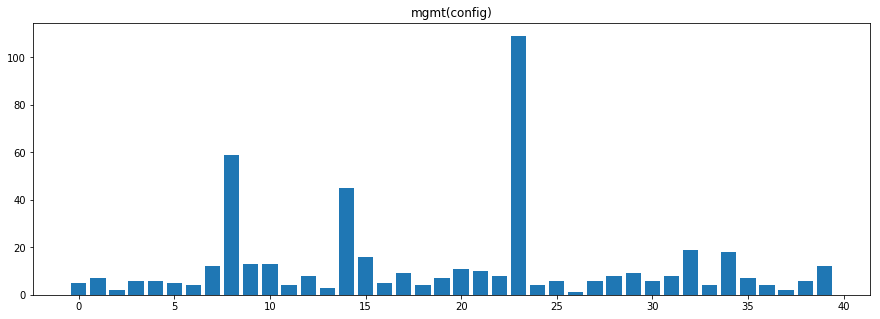

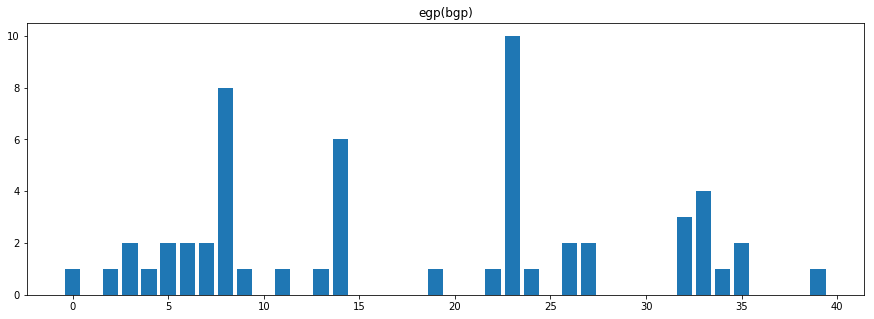

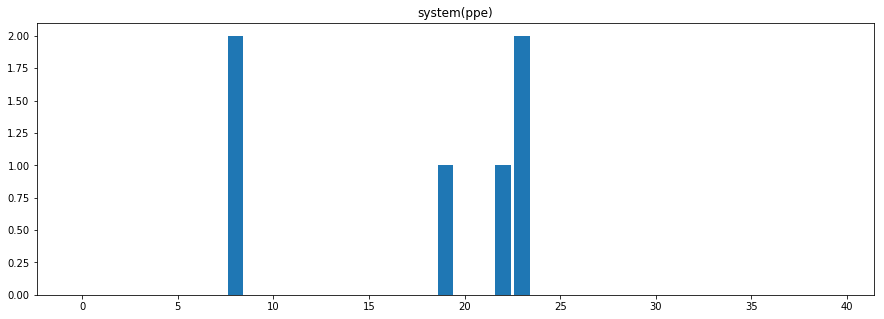

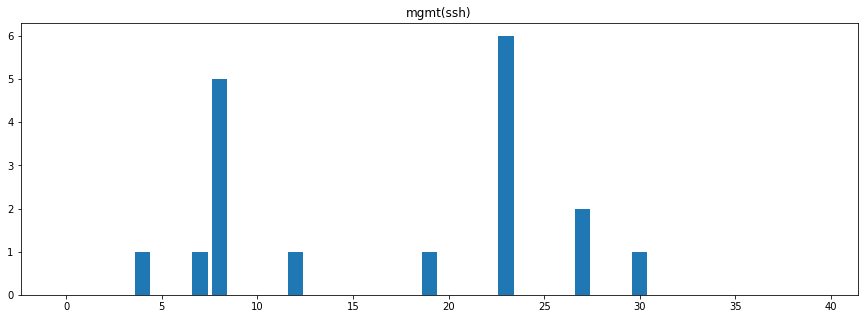

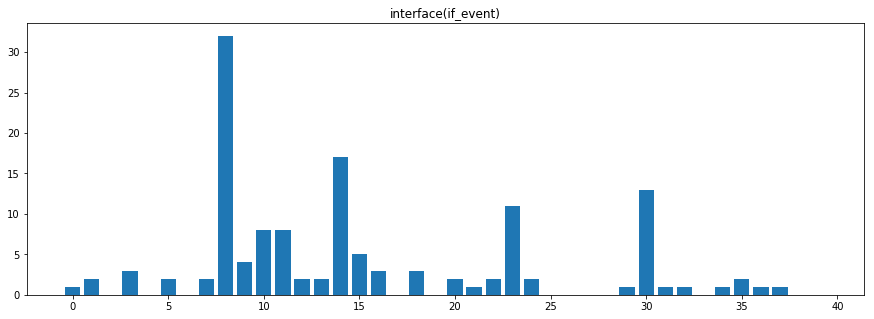

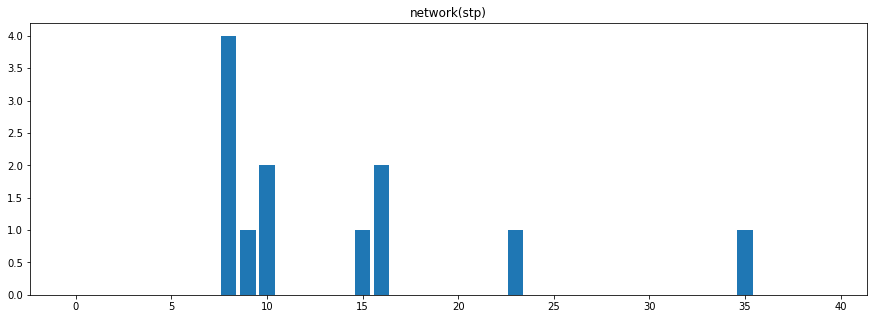

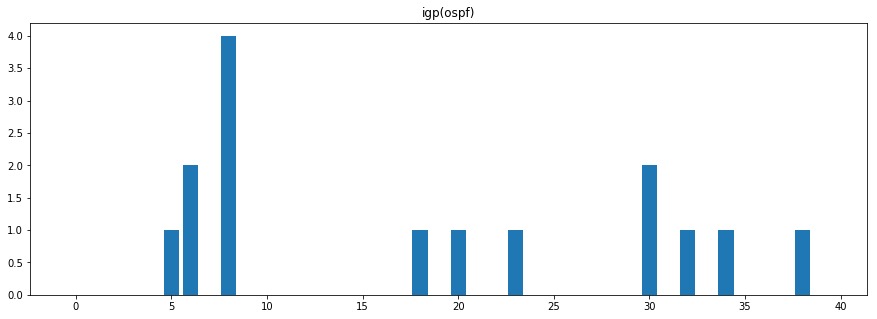

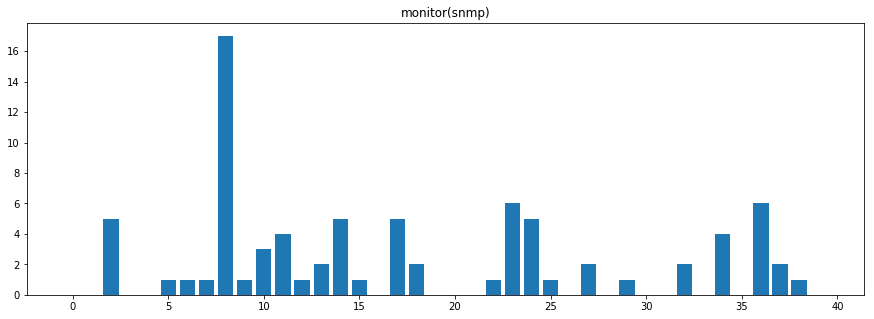

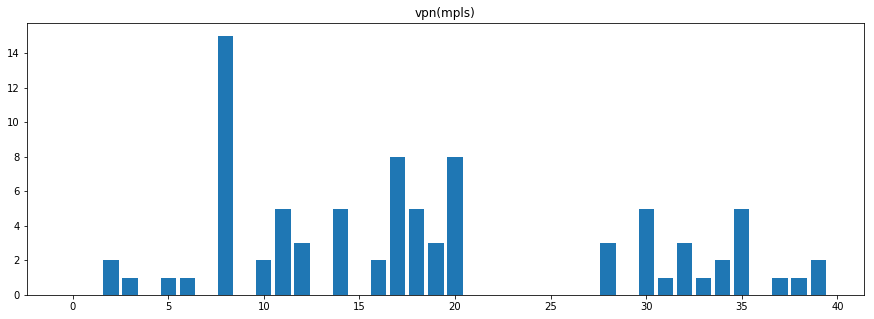

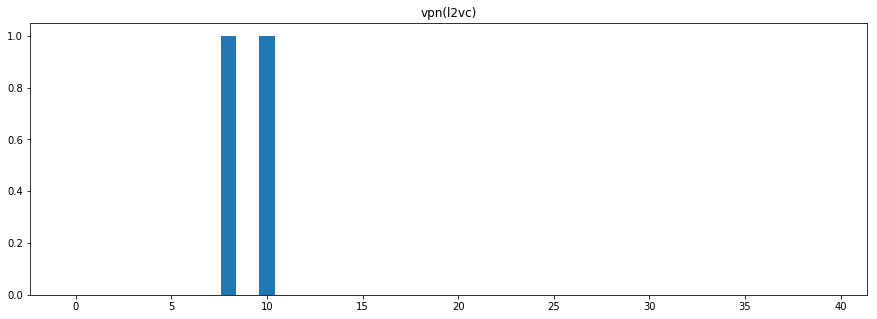

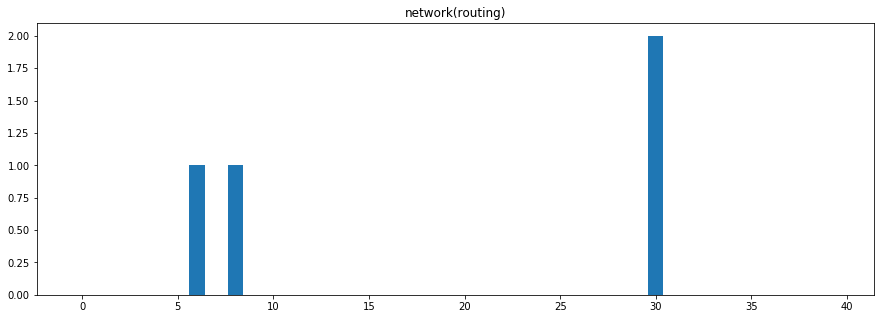

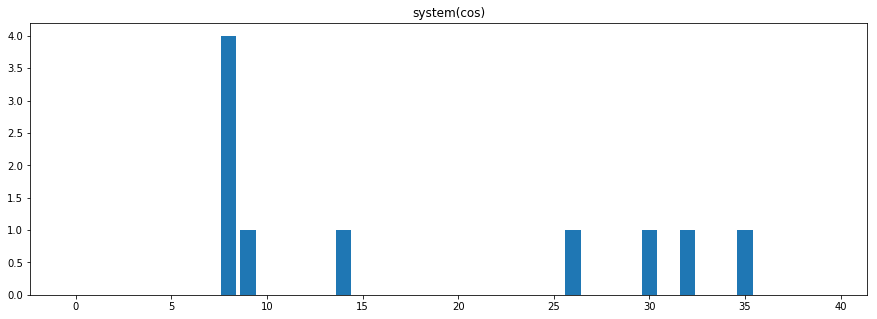

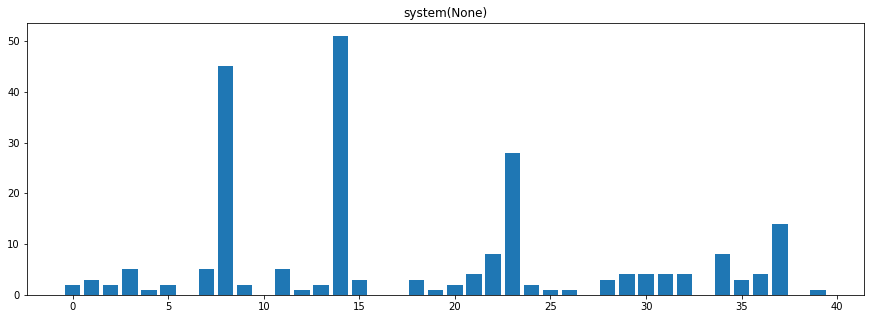

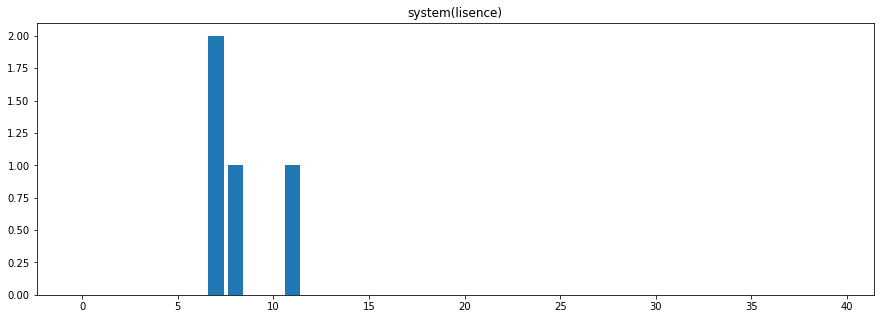

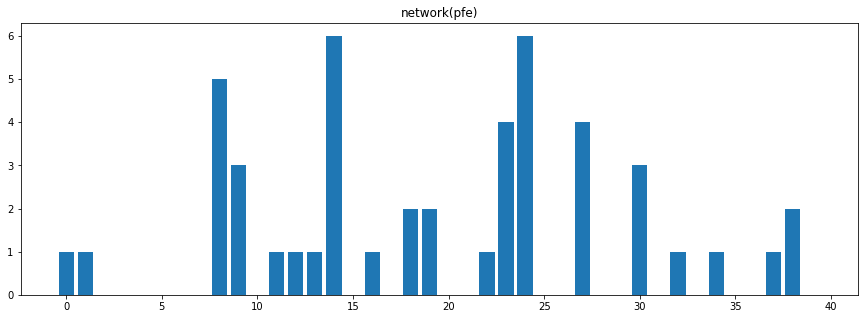

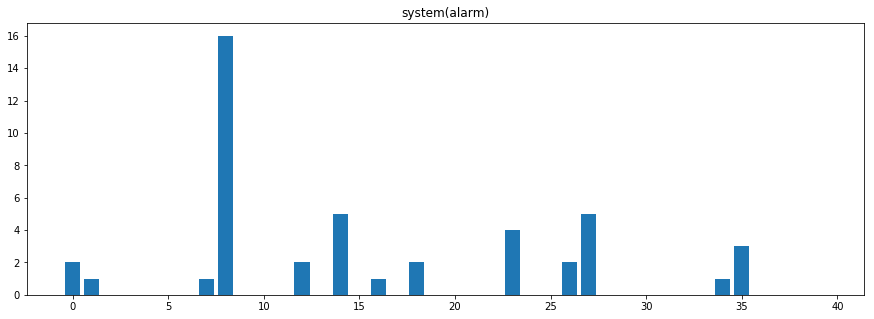

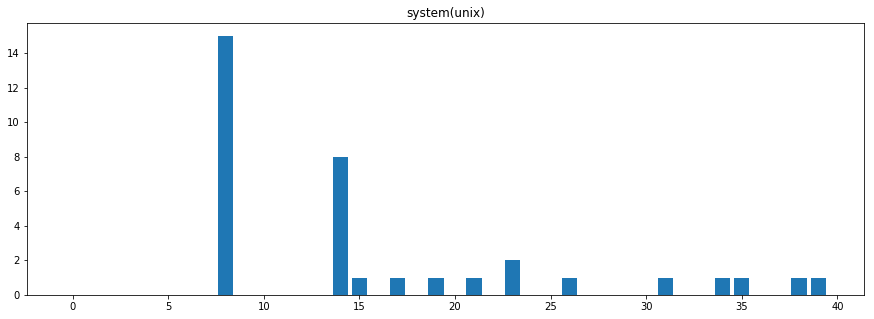

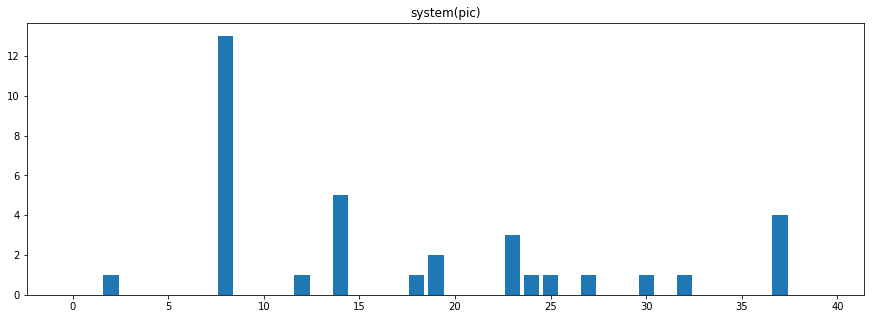

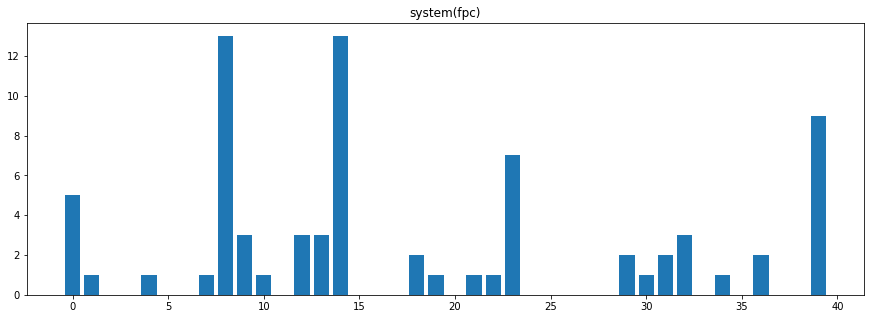

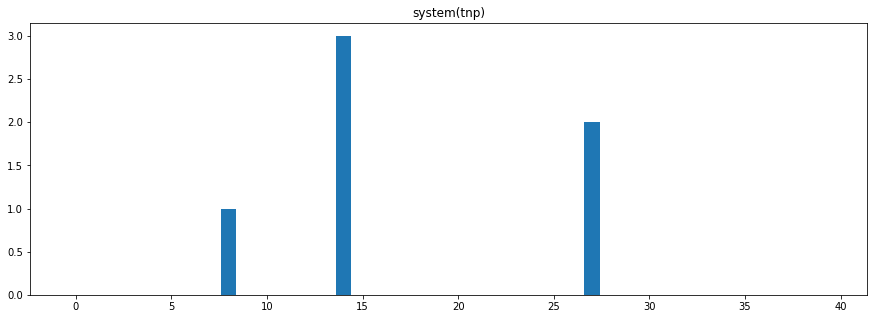

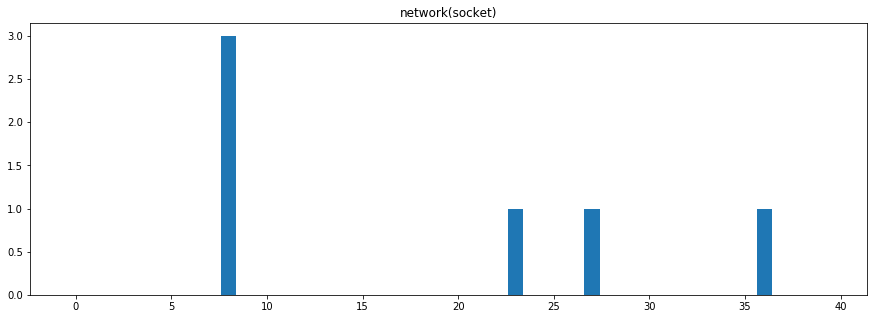

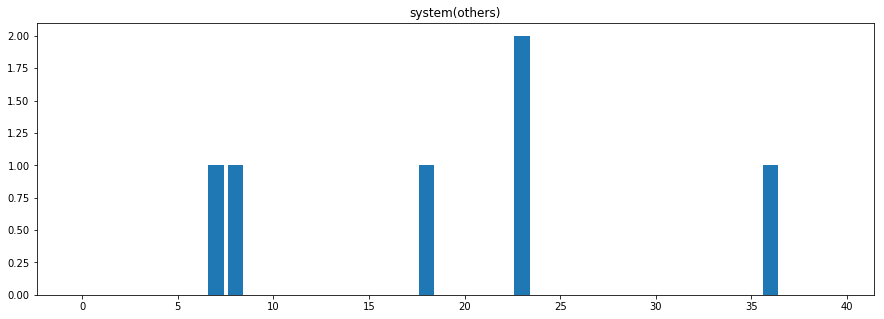

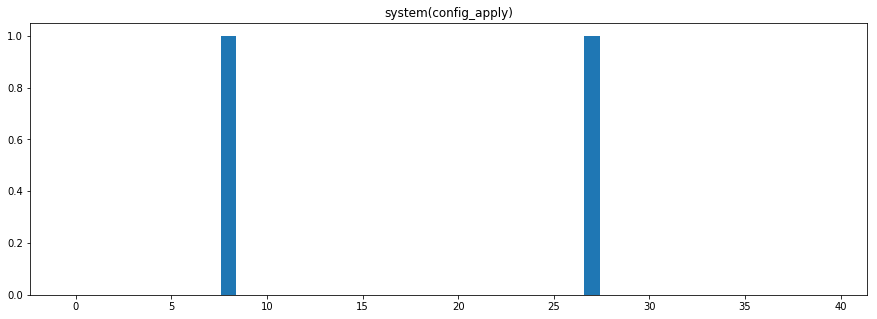

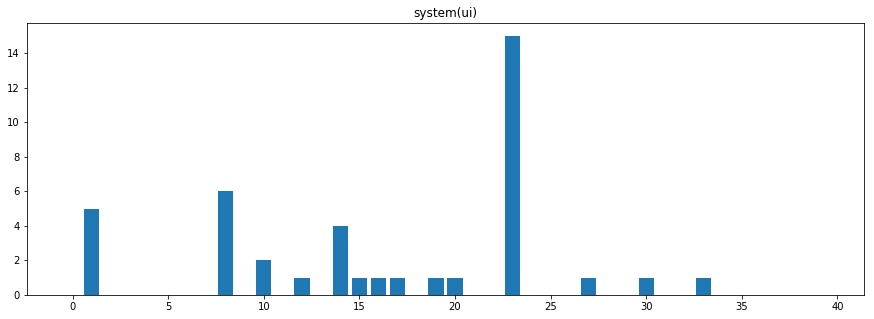

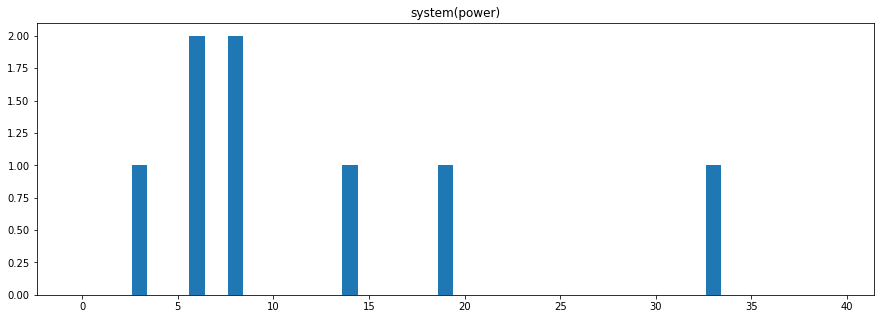

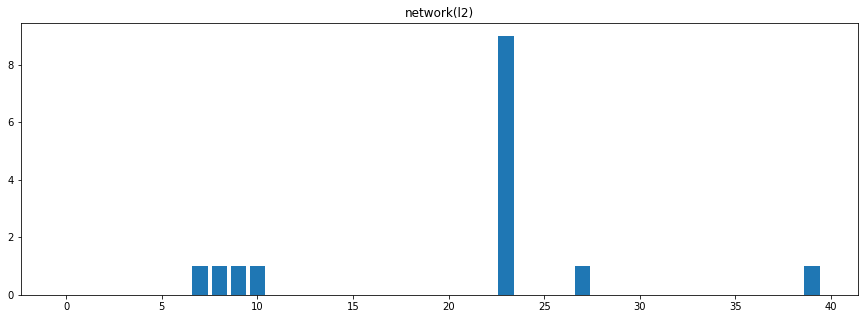

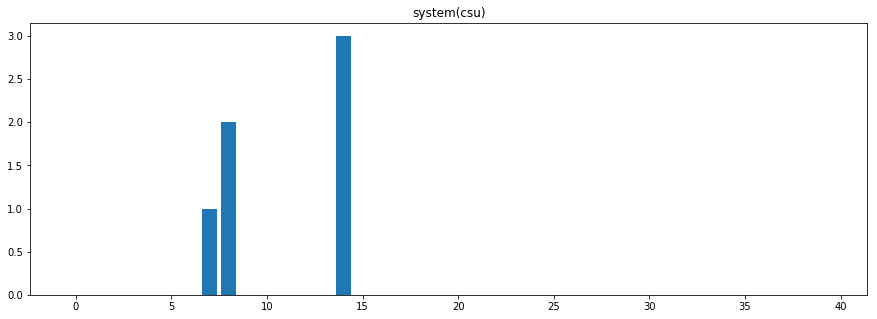

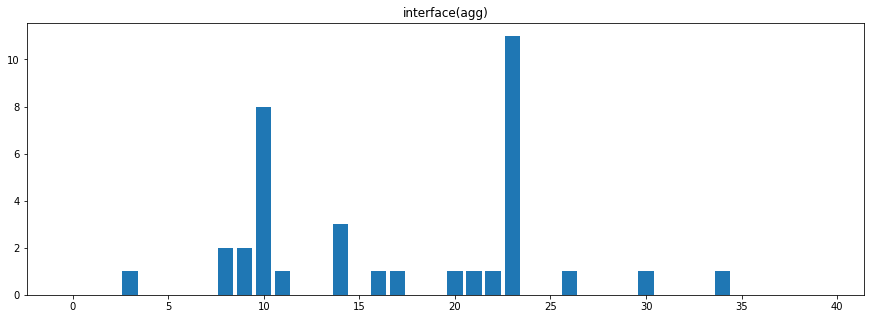

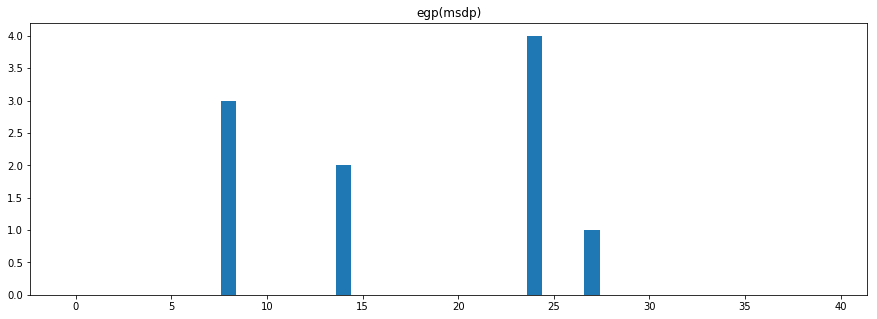

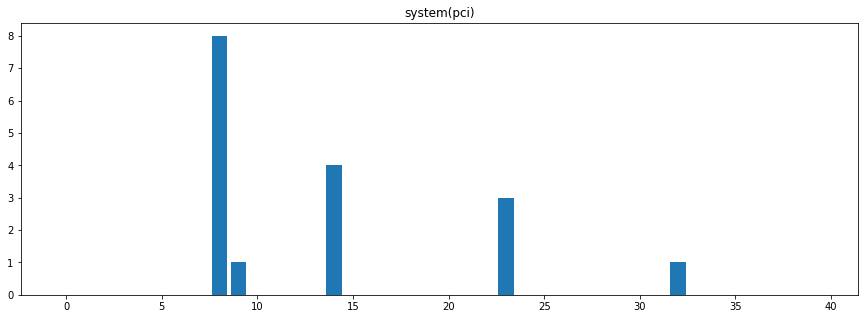

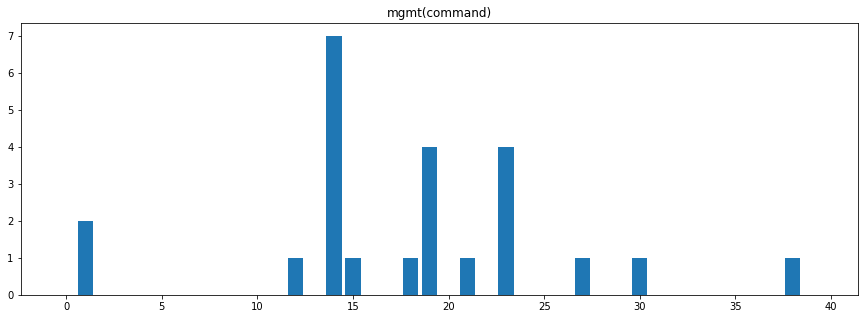

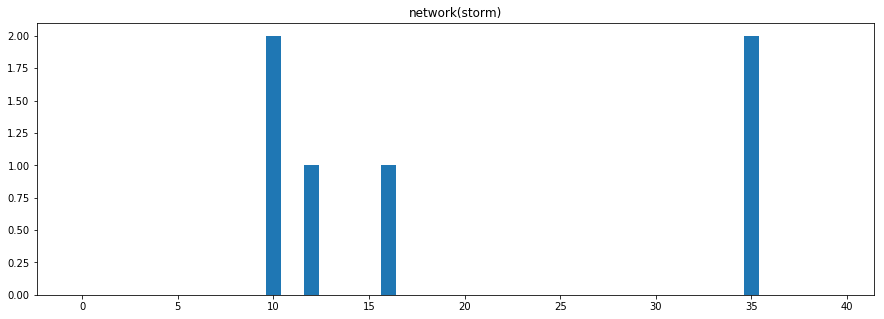

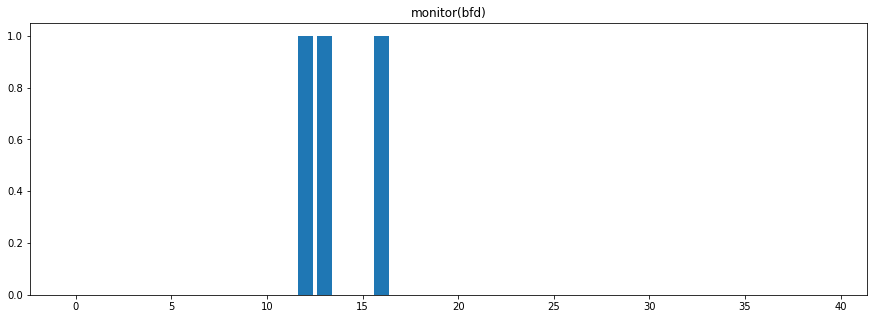

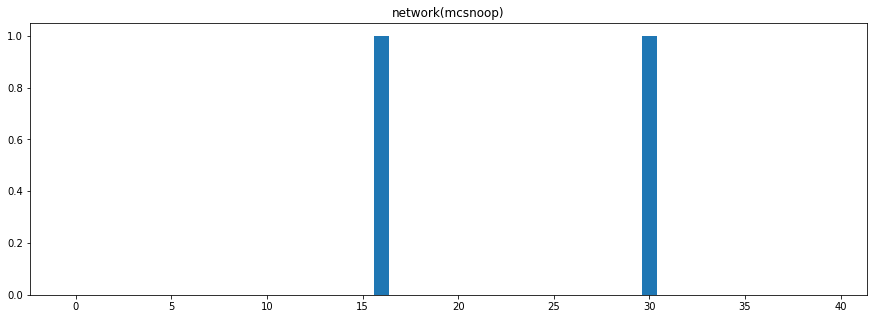

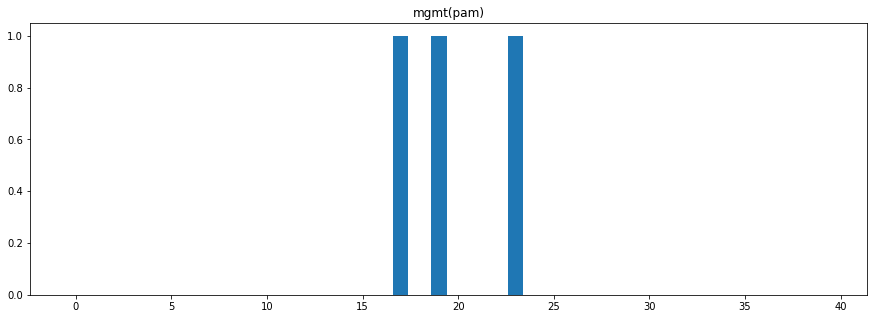

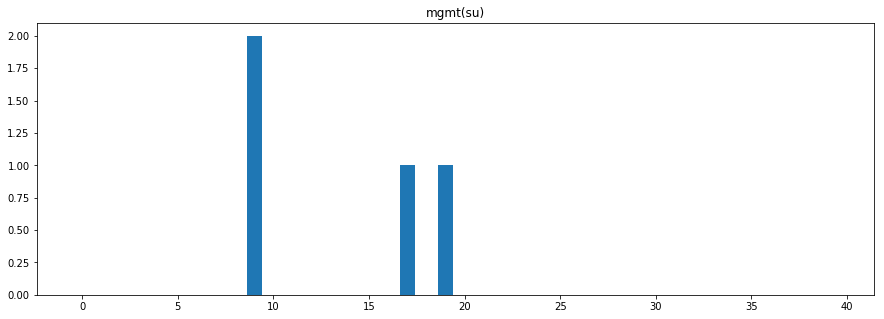

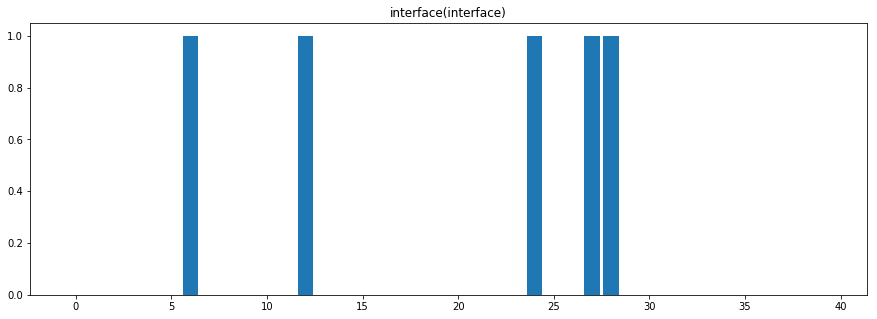

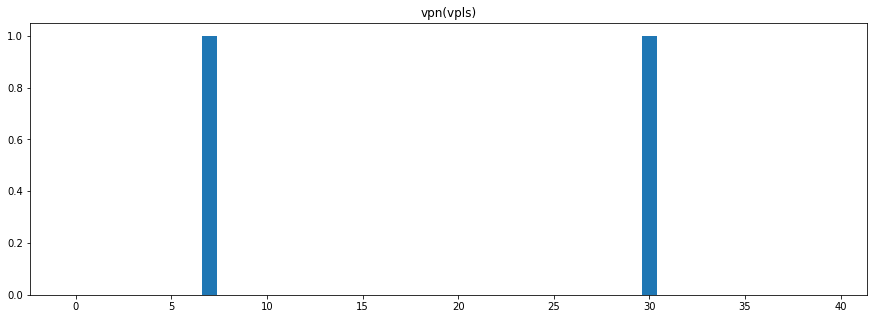

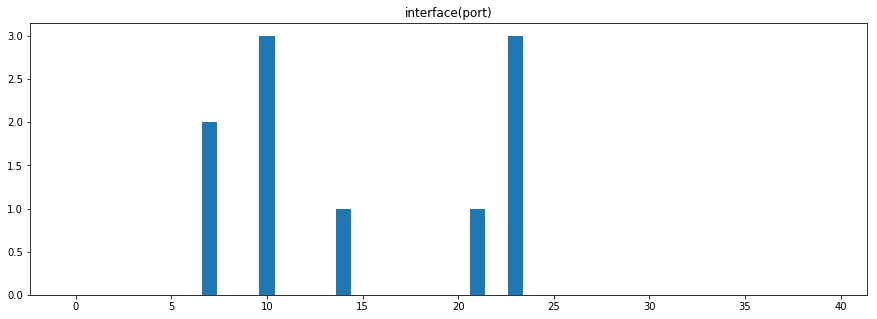

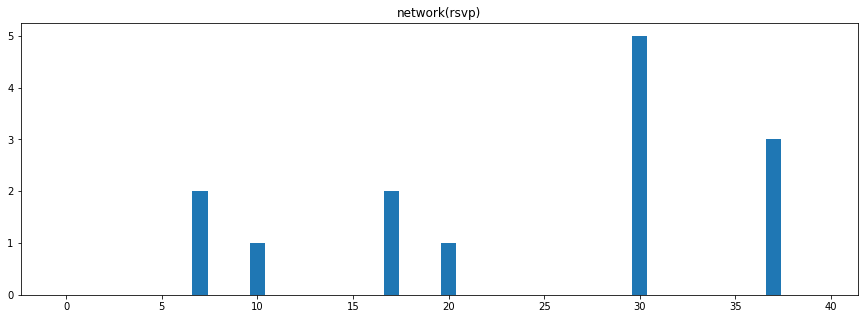

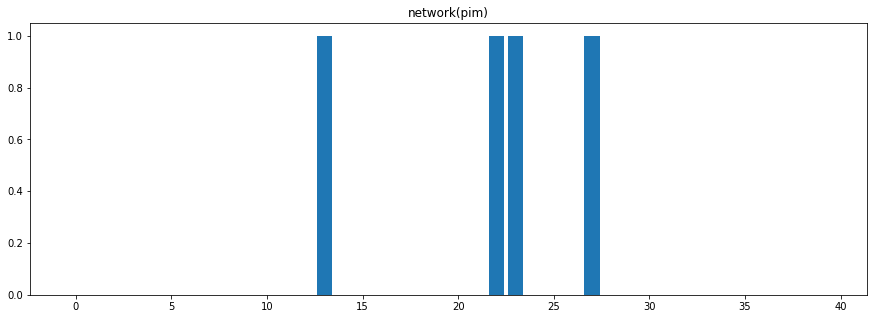

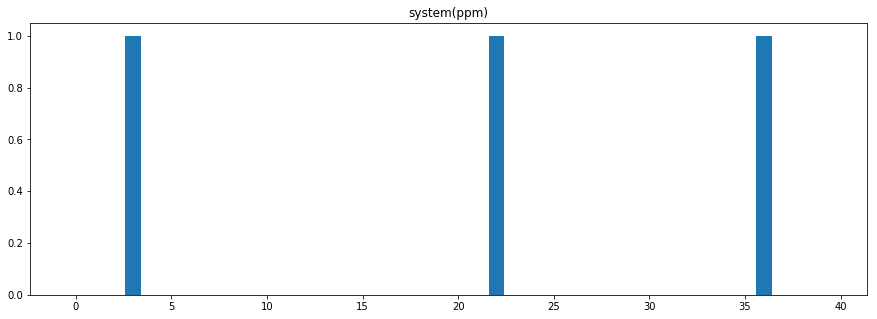

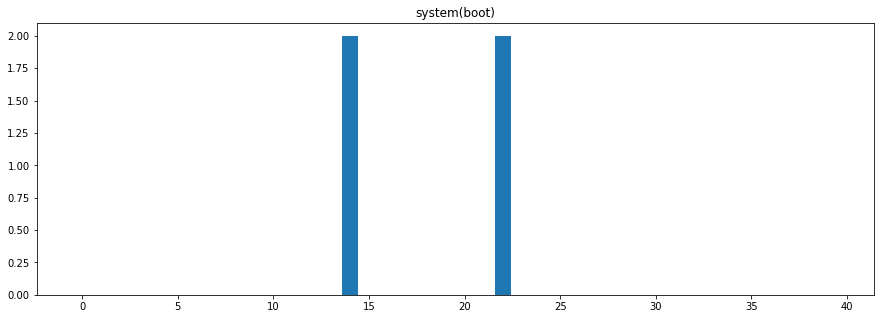

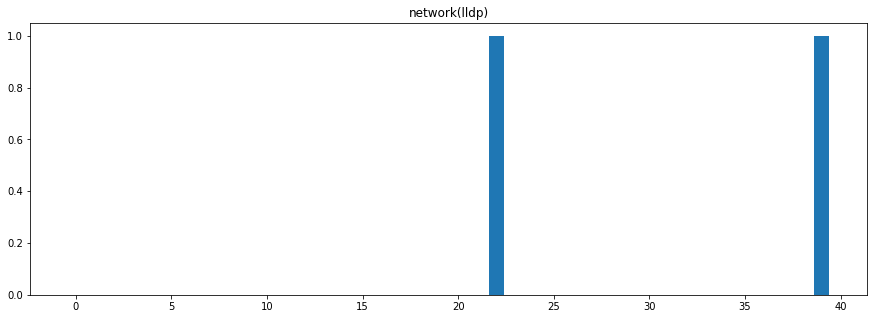

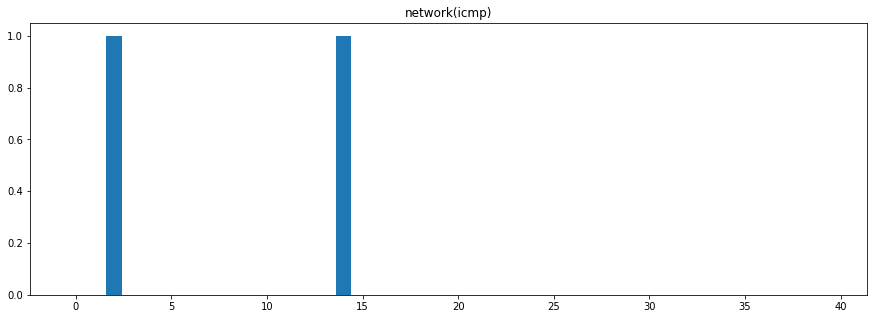

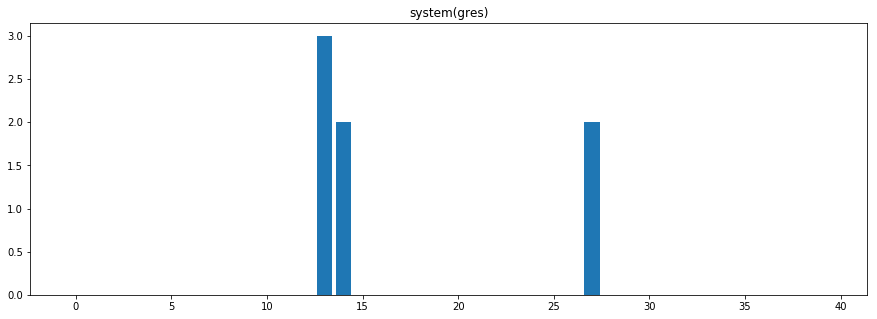

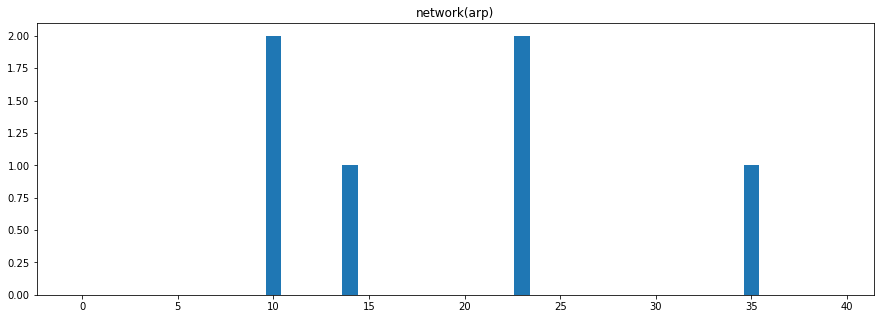

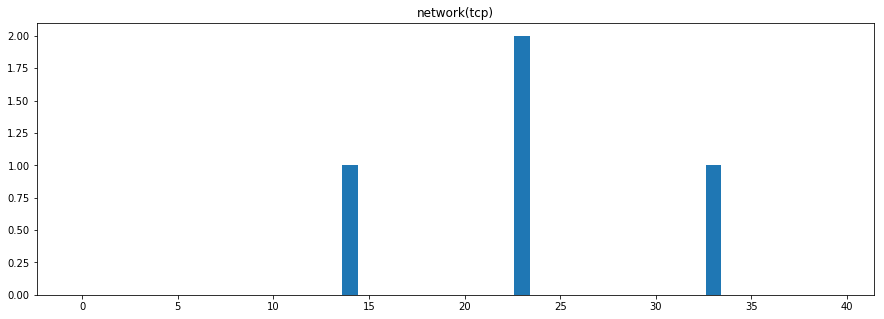

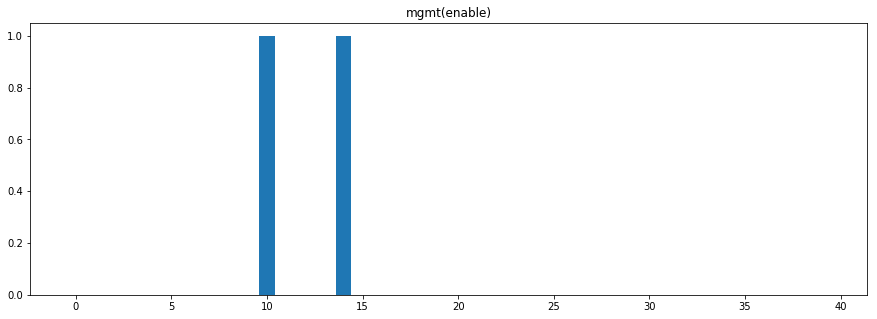

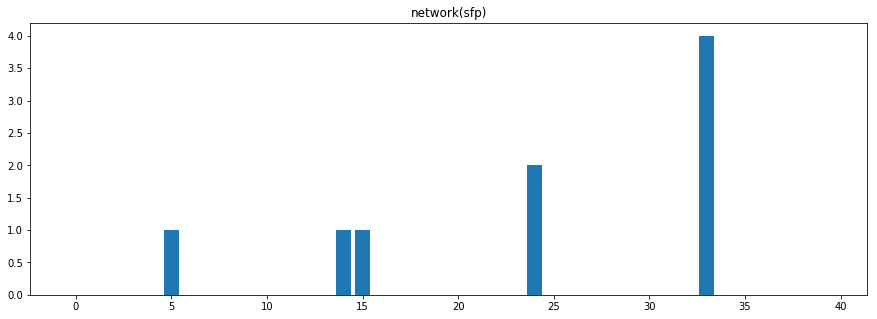

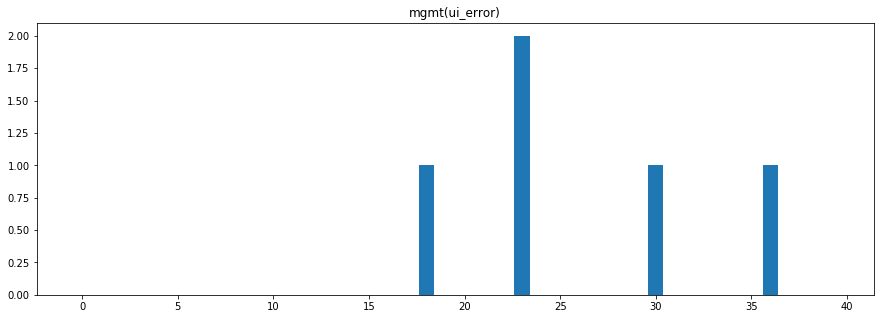

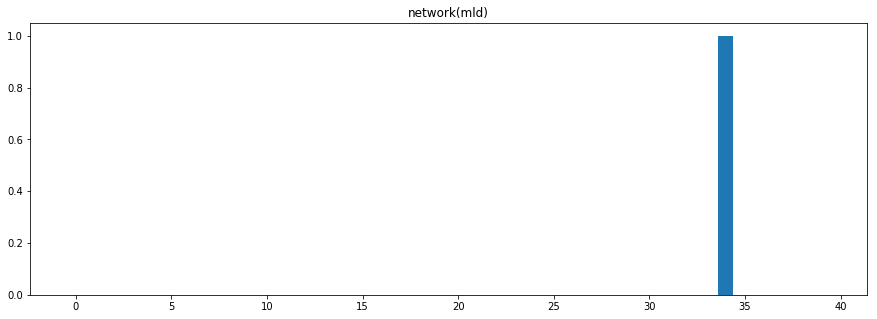

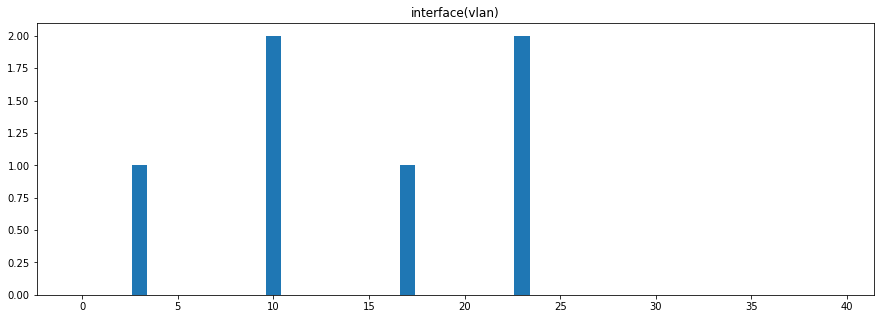

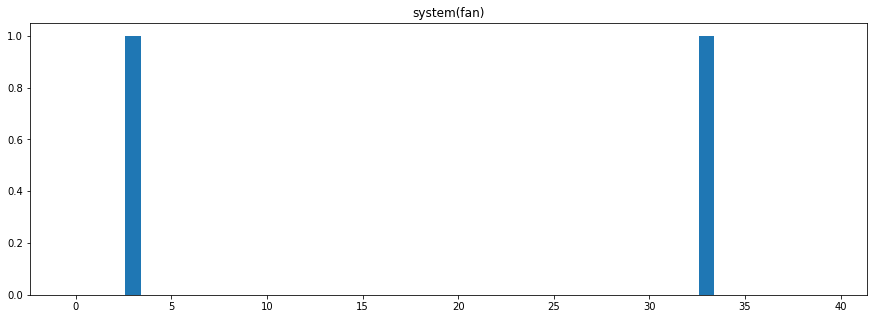

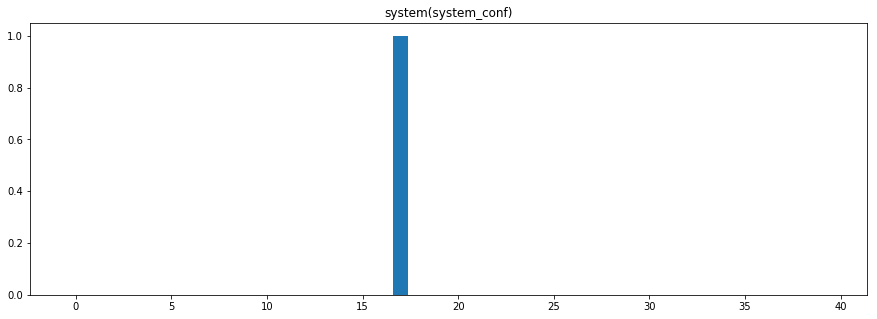

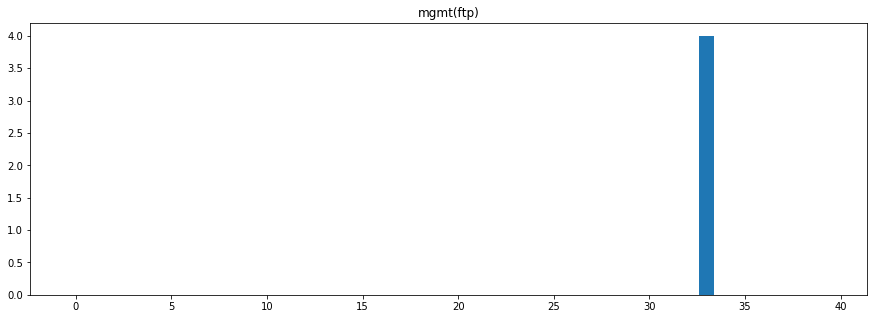

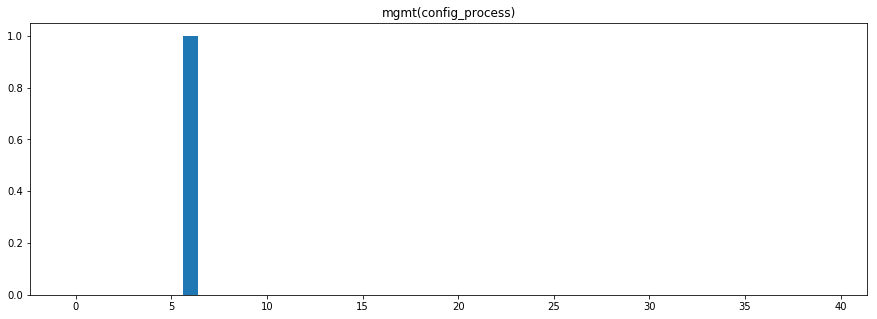

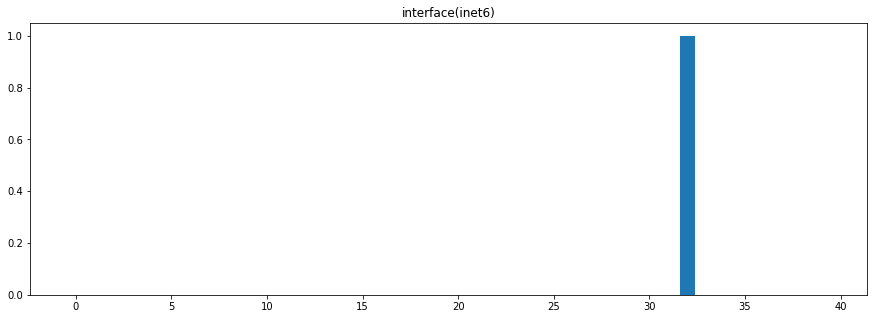

In [39]:
for cat, res in compared_results.items():
    plt.figure(figsize=(15, 5))
    plt.title(cat)
    y = collections.Counter([r[1] for r in res])
    y = [y[i] if i in y else 0 for i in range(40)]
#     print(collections.Counter([r[1] for r in res]), y)
    plt.bar(np.arange(40), y)
    plt.show()